# Introduction 

This notebook may encounter some problems if run in colab, to reproduce the results, it may be better to use jupyter lab

# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.optimize as sco
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde


# Exercises

## Exercise 1

### Variables Exercise 1 

#### market value 2007-2021 (mv_ex_2)

In [2]:
#Reading and filtering by period the market value data
mv_ex_2 = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
mv_ex_2 = mv_ex_2[(mv_ex_2['Date'] >= '2007-12-01') & (mv_ex_2['Date'] <= '2022-12-31')]
mv_ex_2['Date'] = pd.to_datetime(mv_ex_2['Date'])
print(mv_ex_2.shape)
mv_ex_2.head(1)

(181, 191)


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
95 2007-12-31      117637.4       10571.3        1171.1       3265.83   

    AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  ...  \
95       6803.47       4592.15       4177.58       8427.19       3100.59  ...   

    US8425871071  US8454671095  US88642R1095  US9026531049  US9026811052  \
95       29429.8       9496.63       3009.89       2663.35       2907.14   

    US91913Y1001  US92939U1060  US9694571004  US98389B1008  ZAE000006896  
95      38547.03       5696.29      21236.39       9477.81      31281.12  

[1 rows x 191 columns]

#### market value 2022 (mv_2022)

In [3]:
mv_2022 = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
#mv_2022 = mv_2022['Date'] = pd.to_datetime(mv_2022['Date'])
mv_2022 = mv_ex_2[(mv_2022['Date'] >= '2021-12-31') & (mv_2022['Date'] <= '2022-12-31')]
print(mv_2022.shape)
mv_2022.head(1)

(13, 191)


C:\Users\castr\AppData\Local\Temp\ipykernel_16828\2517455582.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mv_2022 = mv_ex_2[(mv_2022['Date'] >= '2021-12-31') & (mv_2022['Date'] <= '2022-12-31')]


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
263 2021-12-31      42031.31      19145.95       2089.88        912.49   

     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  \
263       6709.72       5138.79        699.79      16045.89        8118.7   

     ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
263  ...      72681.31        4729.8         442.1      19085.79   

     US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
263       9605.38      30707.64      30619.23      31639.39      36468.33   

     ZAE000006896  
263      10209.11  

[1 rows x 191 columns]

#### Market value 2008-2021 (mv_annual)

In [4]:
#Reading and filtering by period the market value data
mv_test = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
mv_test['Date'] = pd.to_datetime(mv_test['Date'])
mv_test.set_index('Date', inplace=True)
mv = mv_test.loc['2008':'2021']
mv.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31      90307.38       9860.39       1098.98       3205.13   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31       6813.04       3804.57       3765.02       8529.46   

            BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
Date                                    ...                               
2008-01-31       2262.04       7683.03  ...      27808.74       9561.39   

            US88642R1095  US9026531049  US9026811052  US91913Y1001  \
Date                                                                 
2008-01-31       2784.95       3063.19       2841.87      31576.54   

            US92939U1060  US9694571004  US98389B1008  ZAE000006896  
Date                                                                
2008-01-31        5324.0      18975.04       8713.54      29856.54  

[1 rows x 190 columns]

In [5]:
# Sort the columns of the DataFrame to make sure we have the same firms order for future dataframe merging
mv_sorted = mv[mv.columns.sort_values()]
mv_sorted = mv[mv.columns.sort_values()]

# Extract the sorted column names into a list for future check
sorted_column_mv = mv_sorted.columns.tolist()

In [6]:
# Resample the DataFrame to get annual averages
mv_annual = mv_sorted.resample('Y').mean()
mv_annual.index = mv_annual.index.strftime('%Y') #Formating the Date column to show only the year
# Display the result
mv_annual.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
Date                                                                         
2008  97380.419167    10259.0075    991.646667   3216.464167    10365.4925   

      AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  \
Date                                                                         
2008   2828.138333   3026.095833   9213.655833   2048.476667   8422.081667   

      ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
Date  ...                                                           
2008  ...      27768.76  12352.605833     2862.8175       2899.33   

      US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
Date                                                                         
2008     2778.6425    20495.0775   5257.583333      17139.61   8605.990833   

      ZAE000006896  
Date                
2008  30525.718333  

[1 rows x 190 columns]

#### Market Value change (mvc and mvc_annual_mean)

In [7]:
#Calculating market value change with monthly data
mvc = mv_test.pct_change()
mvc = mvc.loc['2008':'2021'] #Filtering over sample period
mvc.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31     -0.232324     -0.067249     -0.061583     -0.018586   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31      0.001407     -0.171506     -0.098756      0.012136   

            BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
Date                                    ...                               
2008-01-31     -0.270449     -0.009127  ...     -0.055082      0.006819   

            US88642R1095  US9026531049  US9026811052  US91913Y1001  \
Date                                                                 
2008-01-31     -0.074734      0.150127     -0.022452     -0.180831   

            US92939U1060  US9694571004  US98389B1008  ZAE000006896  
Date                                                                
2008-01-31     -0.065357     -0.106485     -0.080638     -0.045541  

[1 rows x 190 columns]

In [8]:
# Resample the DataFrame to get annual market value change
mvc_annual_mean = pd.DataFrame(mvc.mean()*12, columns=['MV_average']).round(2)
# Display the result
mvc_annual_mean.head(1)

MV_average
AN8068571086         0.0

#### Returns (returns)

In [9]:
#Just using a simpler name for this dataset:
RI = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/DS_RI_T_USD_M.csv')
sectors = pd.read_csv('https://raw.githubusercontent.com/Timiboylebg/finance/4dca1b79136eed4def2118dd5fd4715d50bd739c/Static_Carbon.csv', sep=';')
RI = pd.merge(RI, sectors, on='ISIN')
RI.head(1)

ISIN          NAME  2000-01-31 00:00:00  2000-02-29 00:00:00  \
0  AN8068571086  SCHLUMBERGER              1858.26              2254.15   

   2000-03-31 00:00:00  2000-04-30 00:00:00  2000-05-31 00:00:00  \
0              2334.75              2336.65              2245.09   

   2000-06-30 00:00:00  2000-07-31 00:00:00  2000-08-31 00:00:00  ...  \
0               2283.7              2262.67              2610.77  ...   

   2022-07-31 00:00:00  2022-08-31 00:00:00  2022-09-30 00:00:00  \
0              3433.33              3537.17              3344.15   

   2022-10-31 00:00:00  2022-11-30 00:00:00  2022-12-31 00:00:00  \
0              4846.68              4801.97              4997.02   

                Company  GICSSectorName        Country  Region  
0  Schlumberger Limited          Energy  UNITED STATES    AMER  

[1 rows x 282 columns]

In [10]:
# Take only Energy and Utilities Sector
RI = RI[RI['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (RI == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(RI.dtypes)

# We will keep ISIN and transpose the dataframe
RI = RI.rename(columns={'ISIN': ''})
RI.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
RI = RI.transpose()
RI.columns = RI.iloc[0]
RI = RI.drop(RI.index[0])
print(RI.shape)
RI.head(1)

Number of zero values in the DataFrame: 0
ISIN                    object
NAME                    object
2000-01-31 00:00:00    float64
2000-02-29 00:00:00    float64
2000-03-31 00:00:00    float64
                        ...   
2022-12-31 00:00:00    float64
Company                 object
GICSSectorName          object
Country                 object
Region                  object
Length: 282, dtype: object
(276, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9  \
2000-01-31 00:00:00      1858.26        524.6         14.4         15.4   

                    AU000000ORG5 AU0000088338 BMG2108M2182 BMG2178K1009  \
2000-01-31 00:00:00      1354.72       243.08        15.94        14.74   

                    BMG5320C1082 BMG6359F1370  ... US8425871071 US8454671095  \
2000-01-31 00:00:00         66.1      1526.85  ...       2678.1      1784.97   

                    US88642R1095 US9026531049 US9026811052 US91913Y1001  \
2000-01-31 00:00:00       432.56      1240.52      1873.77       592.12   

                    US92939U1060 US9694571004 US98389B1008 ZAE000006896  
2000-01-31 00:00:00      2303.25      2379.91       1760.3        576.3  

[1 rows x 190 columns]

In [11]:
#We need to have the returns for each period, we will use .pct_change()
returns = RI.pct_change()
returns = returns.dropna(axis=0, how ='all') #Remove the first line that has missing values by construction
returns = returns.dropna(axis=1) # Remove the columns that have a missing value
print(returns.shape)
returns

(275, 190)


AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
2000-02-29 00:00:00      0.213043      0.076230     -0.146528     -0.068831   
2000-03-31 00:00:00      0.035756     -0.081528      0.168430     -0.045328   
2000-04-30 00:00:00      0.000814     -0.106429     -0.230501     -0.108108   
2000-05-31 00:00:00     -0.039184      0.074843     -0.193665     -0.039312   
2000-06-30 00:00:00      0.017198      0.000964     -0.139169      0.363171   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.030245     -0.125302     -0.073466      0.042934   
2022-09-30 00:00:00     -0.054569     -0.106440     -0.184632     -0.260720   
2022-10-31 00:00:00      0.449301     -0.085763      0.065999     -0.004640   
2022-11-30 00:00:00     -0.009225      0.131216      0.173619      0.097902   
2022-12-31 00:00:00      0.040619     -0.052602     -0.091739      0.023355   

                     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
2000-02-29 00:00:00     -0.350397     -0.130739     -0.131744     -0.231343   
2000-03-31 00:00:00      0.143188      0.043445      0.000000      0.342454   
2000-04-30 00:00:00     -0.132082     -0.022678     -0.166908     -0.140039   
2000-05-31 00:00:00      0.064650      0.042324     -0.354727      0.084862   
2000-06-30 00:00:00      0.237971      0.267231      0.280914     -0.041579   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.047230      0.017171      0.069614     -0.028321   
2022-09-30 00:00:00     -0.228253     -0.216813     -0.108387     -0.149375   
2022-10-31 00:00:00      0.076060     -0.053864     -0.310621     -0.068626   
2022-11-30 00:00:00      0.483098      0.104944      0.593452      0.059574   
2022-12-31 00:00:00     -0.002207      0.006531      0.120091      0.039554   

                     BMG5320C1082  BMG6359F1370  ...  US8425871071  \
2000-02-29 00:00:00     -0.034342      0.210970  ...     -0.124618   
2000-03-31 00:00:00     -0.165126      0.081883  ...     -0.019720   
2000-04-30 00:00:00     -0.070745      0.016102  ...      0.161322   
2000-05-31 00:00:00     -0.076131      0.090333  ...      0.040103   
2000-06-30 00:00:00      0.081530     -0.033431  ...     -0.101207   
...                           ...           ...  ...           ...   
2022-08-31 00:00:00      0.185281     -0.070060  ...      0.011066   
2022-09-30 00:00:00     -0.172372     -0.234397  ...     -0.117685   
2022-10-31 00:00:00     -0.172840      0.715424  ...     -0.037059   
2022-11-30 00:00:00      0.286589     -0.090213  ...      0.043700   
2022-12-31 00:00:00     -0.071599     -0.021842  ...      0.055736   

                     US8454671095  US88642R1095  US9026531049  US9026811052  \
2000-02-29 00:00:00      0.230771     -0.004392      0.038959     -0.100172   
2000-03-31 00:00:00     -0.053571      0.123624      0.006246      0.153333   
2000-04-30 00:00:00      0.292714     -0.064827      0.020379     -0.054916   
2000-05-31 00:00:00      0.088235      0.306720      0.075000      0.101637   
2000-06-30 00:00:00     -0.324325     -0.070282      0.023254     -0.073447   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.060906      0.006057     -0.072934     -0.084801   
2022-09-30 00:00:00     -0.182910     -0.020736     -0.070426     -0.173858   
2022-10-31 00:00:00      0.132353      0.562158     -0.037229      0.092793   
2022-11-30 00:00:00     -0.001443     -0.103192      0.043008      0.093971   
2022-12-31 00:00:00     -0.154624      0.212092     -0.066072     -0.031989   

                     US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2000-02-29 00:00:00      0.124856     -0.086348      0.072112     -0.087661   
2000-03-31 00:00:00      0.203423      0.127211      0.054242      0.131676   
2000-04-30 00:00:00     -0.054994      0.072097     -0.146517      0.116712   
2000-05-31 00:00:

In [12]:
returns.reset_index(inplace=True)
returns.rename(columns={'index': 'Date'}, inplace=True)
returns['Date'] = pd.to_datetime(returns['Date'])
print(returns.shape)
returns.head(1)

(275, 191)


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
0 2000-02-29      0.213043       0.07623     -0.146528     -0.068831   

   AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  ...  \
0     -0.350397     -0.130739     -0.131744     -0.231343     -0.034342  ...   

   US8425871071  US8454671095  US88642R1095  US9026531049  US9026811052  \
0     -0.124618      0.230771     -0.004392      0.038959     -0.100172   

   US91913Y1001  US92939U1060  US9694571004  US98389B1008  ZAE000006896  
0      0.124856     -0.086348      0.072112     -0.087661     -0.189138  

[1 rows x 191 columns]

#### return 2008-2021 (returns_1)

In [13]:
returns_1 = returns[(returns['Date'] >= '2008-01-31') & (returns['Date'] <= '2021-12-31')]
returns_1.set_index('Date', inplace =True)
returns_1.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31     -0.233506      -0.06725     -0.060014     -0.017656   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31      0.003576     -0.167531     -0.098749      0.012178   

            BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
Date                                    ...                               
2008-01-31     -0.270438     -0.009128  ...     -0.051161       0.00682   

            US88642R1095  US9026531049  US9026811052  US91913Y1001  \
Date                                                                 
2008-01-31     -0.034631      0.169853     -0.023119     -0.156648   

            US92939U1060  US9694571004  US98389B1008  ZAE000006896  
Date                                                                
2008-01-31     -0.065285     -0.106484     -0.080637     -0.045586  

[1 rows x 190 columns]

#### Risk Free asset (rf and rf_1)

In [14]:
rf = pd.read_excel('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Risk_Free_Rate.xlsx')
rf.head(1)

Unnamed: 0    RF
0      200001  0.41

In [15]:
# Name the Column Date
rf.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' to datetime with the last day of each month
rf['Date'] = pd.to_datetime(rf['Date'], format='%Y%m') + pd.offsets.MonthEnd(1)

# Correct RF because 0.41 is in reality 0.41%
rf['RF'] = rf['RF'] / 100
# Display the first few rows to verify the changes
rf.head()

Date      RF
0 2000-01-31  0.0041
1 2000-02-29  0.0043
2 2000-03-31  0.0047
3 2000-04-30  0.0046
4 2000-05-31  0.0050

In [16]:
rf_1 = rf[(rf['Date'] >= '2008-01-31') & (rf['Date'] <= '2021-12-31')].copy()
rf_1.set_index('Date', inplace =True)
rf_1.head(1)

RF
Date              
2008-01-31  0.0021

#### Carbon emission (carbon_Scope3_intensity)

In [17]:
carbon_Scope3_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope3Intensity.csv')

carbon_Scope3_intensity = pd.merge(carbon_Scope3_intensity, sectors, on='ISIN')
carbon_Scope3_intensity.head(1)

ISIN                  NAME  1999  2000  2001  2002  2003  2004  \
0  AN8068571086  Schlumberger Limited   NaN   NaN   NaN   NaN   NaN   NaN   

         2005        2006  ...     2016        2017        2018     2019  \
0  291.288061  261.553292  ...  248.277  284.127401  265.636878  246.607   

      2020     2021               Company  GICSSectorName        Country  \
0  285.545  298.385  Schlumberger Limited          Energy  UNITED STATES   

   Region  
0    AMER  

[1 rows x 29 columns]

In [18]:
# Take only Energy and Utilities Sector
carbon_Scope3_intensity = carbon_Scope3_intensity[carbon_Scope3_intensity['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (carbon_Scope3_intensity == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(carbon_Scope3_intensity.dtypes)

# We will keep ISIN and transpose the dataframe
carbon_Scope3_intensity = carbon_Scope3_intensity.rename(columns={'ISIN': ''})
carbon_Scope3_intensity.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
carbon_Scope3_intensity = carbon_Scope3_intensity.transpose()
carbon_Scope3_intensity.columns = carbon_Scope3_intensity.iloc[0]
carbon_Scope3_intensity = carbon_Scope3_intensity.drop(carbon_Scope3_intensity.index[0])
print(carbon_Scope3_intensity.shape)
carbon_Scope3_intensity.head(1)

Number of zero values in the DataFrame: 0
ISIN               object
NAME               object
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Company            object
GICSSectorName     object
Country            object
Region             object
dtype: object
(23, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
1999          NaN          NaN          NaN          NaN          NaN   

     AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  ...  \
1999          NaN          NaN          NaN          NaN          NaN  ...   

     US8425871071 US8454671095 US88642R1095 US9026531049 US9026811052  \
1999          NaN          NaN          NaN          NaN          NaN   

     US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  
1999          NaN          NaN          NaN          NaN          NaN  

[1 rows x 190 columns]

In [19]:
carbon_Scope3_intensity.reset_index(inplace=True)
carbon_Scope3_intensity.rename(columns={'index': 'Date'}, inplace=True)
carbon_Scope3_intensity['Date'] = pd.to_datetime(carbon_Scope3_intensity['Date'])
print(carbon_Scope3_intensity.shape)
carbon_Scope3_intensity.head(1)

(23, 191)


Date AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
0 1999-01-01          NaN          NaN          NaN          NaN          NaN   

  AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082  ... US8425871071  \
0          NaN          NaN          NaN          NaN  ...          NaN   

  US8454671095 US88642R1095 US9026531049 US9026811052 US91913Y1001  \
0          NaN          NaN          NaN          NaN          NaN   

  US92939U1060 US9694571004 US98389B1008 ZAE000006896  
0          NaN          NaN          NaN          NaN  

[1 rows x 191 columns]

#### carbon 2007-2021 (Carbon_2007)

In [20]:
Carbon_2007 = carbon_Scope3_intensity[(carbon_Scope3_intensity['Date'] >= '2008-01-01') & (carbon_Scope3_intensity['Date'] <= '2021-12-31')]
Carbon_2007.set_index('Date', inplace =True)
Carbon_2007.head(1)

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2008-01-01   223.125807    76.879593    99.724154   122.918072   107.076459   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2008-01-01   349.177627    74.677363   325.702743    99.724154   356.100324   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
Date        ...                                                       
2008-01-01  ...   429.390585   150.804481   122.283396     30.07994   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
Date                                                                          
2008-01-01    225.01338   324.386735   312.194251   150.751566   244.510169   

           ZAE000006896  
Date                     
2008-01-01   354.433308  

[1 rows x 190 columns]

#### Carbon intensity for each scope

In [21]:
Carbon_2007_Scope3 = Carbon_2007

In [22]:
# Continued the work
# Just repeated the previous steps for each scope

carbon_Scope1_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope1Intensity.csv')

carbon_Scope1_intensity = pd.merge(carbon_Scope1_intensity, sectors, on='ISIN')
carbon_Scope1_intensity.head(1)

# -----------------

# Take only Energy and Utilities Sector
carbon_Scope1_intensity = carbon_Scope1_intensity[carbon_Scope1_intensity['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (carbon_Scope1_intensity == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

# We will keep ISIN and transpose the dataframe
carbon_Scope1_intensity = carbon_Scope1_intensity.rename(columns={'ISIN': ''})
carbon_Scope1_intensity.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
carbon_Scope1_intensity = carbon_Scope1_intensity.transpose()
carbon_Scope1_intensity.columns = carbon_Scope1_intensity.iloc[0]
carbon_Scope1_intensity = carbon_Scope1_intensity.drop(carbon_Scope1_intensity.index[0])

# -----------------

carbon_Scope1_intensity.reset_index(inplace=True)
carbon_Scope1_intensity.rename(columns={'index': 'Date'}, inplace=True)
carbon_Scope1_intensity['Date'] = pd.to_datetime(carbon_Scope1_intensity['Date'])

# -----------------

Carbon_2007_Scope1 = carbon_Scope1_intensity[(carbon_Scope1_intensity['Date'] >= '2008-01-01') & (carbon_Scope1_intensity['Date'] <= '2021-12-31')]
Carbon_2007_Scope1.set_index('Date', inplace =True)
Carbon_2007_Scope1.head(1)

Number of zero values in the DataFrame: 0


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2008-01-01    46.092715   589.089467    220.68736   446.827208   417.246873   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2008-01-01   100.792915    17.682193  2942.141258    220.68736   101.264671   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
Date        ...                                                       
2008-01-01  ...  9050.033386   203.876466  1469.206768     14.49985   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
Date                                                                          
2008-01-01   505.945003   208.979346  4893.695859  1277.451018  5444.833294   

           ZAE000006896  
Date                     
2008-01-01  3787.781111  

[1 rows x 190 columns]

In [23]:
carbon_Scope2_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope2Intensity.csv')

carbon_Scope2_intensity = pd.merge(carbon_Scope2_intensity, sectors, on='ISIN')
carbon_Scope2_intensity.head(1)

# -----------------

# Take only Energy and Utilities Sector
carbon_Scope2_intensity = carbon_Scope2_intensity[carbon_Scope2_intensity['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (carbon_Scope2_intensity == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

# We will keep ISIN and transpose the dataframe
carbon_Scope2_intensity = carbon_Scope2_intensity.rename(columns={'ISIN': ''})
carbon_Scope2_intensity.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
carbon_Scope2_intensity = carbon_Scope2_intensity.transpose()
carbon_Scope2_intensity.columns = carbon_Scope2_intensity.iloc[0]
carbon_Scope2_intensity = carbon_Scope2_intensity.drop(carbon_Scope2_intensity.index[0])

# -----------------

carbon_Scope2_intensity.reset_index(inplace=True)
carbon_Scope2_intensity.rename(columns={'index': 'Date'}, inplace=True)
carbon_Scope2_intensity['Date'] = pd.to_datetime(carbon_Scope2_intensity['Date'])

# -----------------

Carbon_2007_Scope2 = carbon_Scope2_intensity[(carbon_Scope2_intensity['Date'] >= '2008-01-01') & (carbon_Scope2_intensity['Date'] <= '2021-12-31')]
Carbon_2007_Scope2.set_index('Date', inplace =True)
Carbon_2007_Scope2.head(1)

Number of zero values in the DataFrame: 18


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2008-01-01    70.743885     0.432081    50.645169   277.621965     3.583918   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2008-01-01      18.2454    44.837709    77.073132    50.645169      15.1699   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
Date        ...                                                       
2008-01-01  ...     0.483617    32.801708     17.82075    57.953717   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
Date                                                                          
2008-01-01     3.648721    33.384856     1.848139    74.889734     1.235494   

           ZAE000006896  
Date                     
2008-01-01   589.605042  

[1 rows x 190 columns]

### Exercise

#### Distribution Histograms (xy scale)

In [24]:
mean_carbon1 = Carbon_2007_Scope1.mean(axis=0)
mean_carbon1.describe()

count      190.000000
mean      1730.077410
std       3004.365441
min          3.871663
25%        219.599019
50%        497.640742
75%       2119.203289
max      18820.405010
dtype: float64

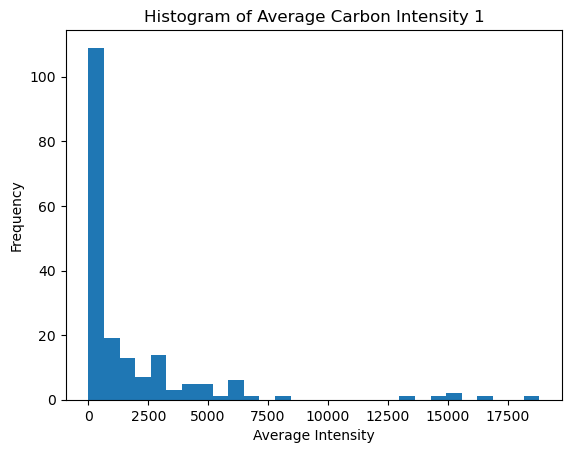

In [25]:
# Histogram
# Plotting the average returns in a histogram
plt.hist(mean_carbon1, bins='auto')
plt.title('Histogram of Average Carbon Intensity 1')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.show()

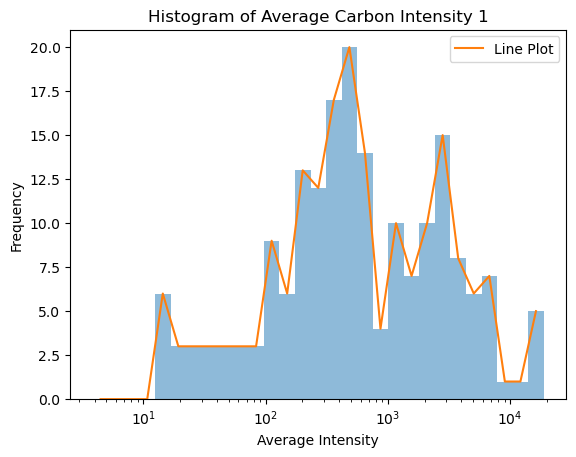

In [26]:
# Compute the histogram with logarithmic bins
hist, bins = np.histogram(mean_carbon1, bins=np.logspace(np.log10(min(mean_carbon1)), np.log10(max(mean_carbon1)), 30))

# Plot the histogram as a background
plt.hist(mean_carbon1, bins=np.logspace(np.log10(min(mean_carbon1)), np.log10(max(mean_carbon1)), 30), density=False, alpha=0.5)

# Get the x values (centers of the bins)
bin_centers = np.sqrt(bins[:-1] * bins[1:])

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-', label='Line Plot')

# Add labels and title
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Average Carbon Intensity 1')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Show legend
plt.legend()

# Show plot
plt.show()

In [27]:
# Let's calculate skewness and numbers and values for specific companies

skewness_scope1 = mean_carbon1.skew()
print("Skewness (scope 1):", skewness_scope1)

# Just in case
mean_carbon1 = pd.to_numeric(mean_carbon1, errors='coerce')

# Now, find the max value and its index
max_emission_value = mean_carbon1.max()
max_emission_company = mean_carbon1.idxmax()

print("\nCompany with the highest total emissions over the 13 years:")
print(f"Company Code: {max_emission_company}, Total Emissions: {max_emission_value}")

top_companies = mean_carbon1.sort_values(ascending=False).head(6)
print("\nTop 6 companies with the highest total emissions:")
print(top_companies)

Skewness (scope 1): 3.403841244137081

Company with the highest total emissions over the 13 years:
Company Code: CNE1000002Z3, Total Emissions: 18820.40501015742

Top 6 companies with the highest total emissions:

CNE1000002Z3    18820.405010
CNE1000003D8    16354.865435
TH0465010005    15110.763602
CNE000000HW5    15106.551030
CNE1000006Z4    14459.332150
CA89346D1078    13111.197192
dtype: float64


In [28]:
mean_carbon2 = Carbon_2007_Scope2.mean(axis=0)
mean_carbon2.describe()

count    190.000000
mean      61.686722
std       86.839584
min        0.235829
25%       12.406602
50%       30.563684
75%       70.799715
max      536.204501
dtype: float64

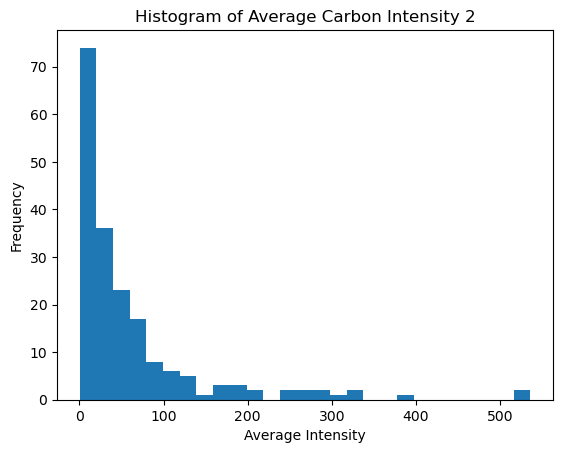

In [29]:
# Histogram
# Plotting the average returns in a histogram
plt.hist(mean_carbon2, bins='auto')
plt.title('Histogram of Average Carbon Intensity 2')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.show()

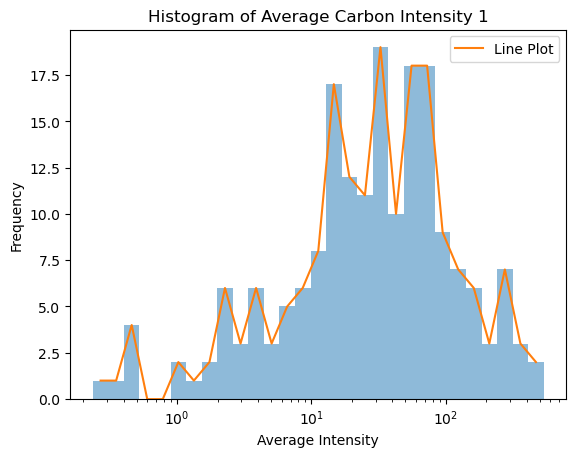

In [30]:
# Compute the histogram with logarithmic bins
hist, bins = np.histogram(mean_carbon2, bins=np.logspace(np.log10(min(mean_carbon2)), np.log10(max(mean_carbon2)), 30))

# Plot the histogram as a background
plt.hist(mean_carbon2, bins=np.logspace(np.log10(min(mean_carbon2)), np.log10(max(mean_carbon2)), 30), density=False, alpha=0.5)

# Get the x values (centers of the bins)
bin_centers = np.sqrt(bins[:-1] * bins[1:])

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-', label='Line Plot')

# Add labels and title
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Average Carbon Intensity 1')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Show legend
plt.legend()

# Show plot
plt.show()

In [31]:
skewness_scope2 = mean_carbon2.skew()
print("Skewness (scope 2):", skewness_scope2)

# Just in case
mean_carbon2 = pd.to_numeric(mean_carbon2, errors='coerce')

# Now, find the max value and its index
max_emission_value2 = mean_carbon2.max()
max_emission_company2 = mean_carbon2.idxmax()

print("\nCompany with the highest total emissions over the 13 years:")
print(f"Company Code: {max_emission_company2}, Total Emissions: {max_emission_value2}")

top_companies2 = mean_carbon2.sort_values(ascending=False).head(3)
print("\nTop 3 companies with the highest total emissions:")
print(top_companies2)

Skewness (scope 2): 2.890764142777371

Company with the highest total emissions over the 13 years:
Company Code: US12653C1080, Total Emissions: 536.2045009147739

Top 3 companies with the highest total emissions:

US12653C1080    536.204501
ZAE000006896    529.644171
ES0173093024    388.600675
dtype: float64


In [32]:
mean_carbon3 = Carbon_2007_Scope3.mean(axis=0)
mean_carbon3.describe()

count    190.000000
mean     255.528050
std      156.179461
min       25.545132
25%      126.926172
50%      239.282006
75%      355.825730
max      859.539412
dtype: float64

In [33]:
mean_carbon3 = Carbon_2007_Scope3.mean(axis=0)
mean_carbon3.describe()

count    190.000000
mean     255.528050
std      156.179461
min       25.545132
25%      126.926172
50%      239.282006
75%      355.825730
max      859.539412
dtype: float64

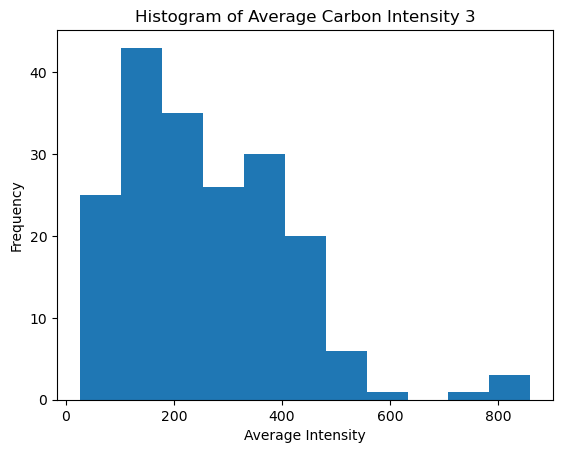

In [34]:
# Histogram
# Plotting the average returns in a histogram
plt.hist(mean_carbon3, bins='auto')
plt.title('Histogram of Average Carbon Intensity 3')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.show()

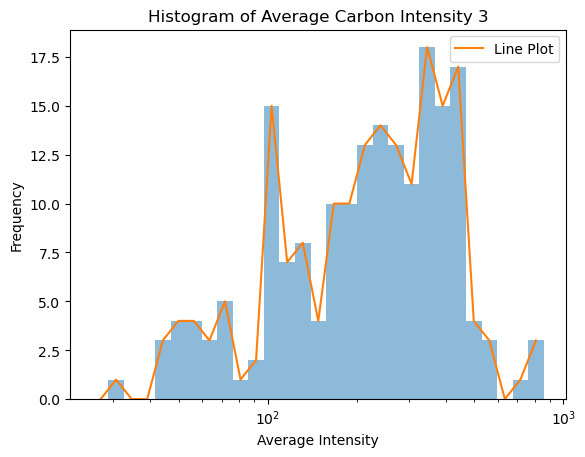

In [35]:
# Compute the histogram with logarithmic bins
hist, bins = np.histogram(mean_carbon3, bins=np.logspace(np.log10(min(mean_carbon3)), np.log10(max(mean_carbon3)), 30))

# Plot the histogram as a background
plt.hist(mean_carbon3, bins=np.logspace(np.log10(min(mean_carbon3)), np.log10(max(mean_carbon3)), 30), density=False, alpha=0.5)

# Get the x values (centers of the bins)
bin_centers = np.sqrt(bins[:-1] * bins[1:])

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-', label='Line Plot')

# Add labels and title
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Average Carbon Intensity 3')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Show legend
plt.legend()

# Show plot
plt.show()

In [36]:
skewness_scope3 = mean_carbon3.skew()
print("Skewness (scope 3):", skewness_scope3)

# Just in case
mean_carbon3 = pd.to_numeric(mean_carbon3, errors='coerce')

# Now, find the max value and its index
max_emission_value3 = mean_carbon3.max()
max_emission_company3 = mean_carbon3.idxmax()

print("\nCompany with the highest total emissions over the 13 years:")
print(f"Company Code: {max_emission_company3}, Total Emissions: {max_emission_value3}")

top_companies3 = mean_carbon3.sort_values(ascending=False).head(4)
print("\nTop 4 companies with the highest total emissions:")
print(top_companies3)

Skewness (scope 3): 1.0738163542758299

Company with the highest total emissions over the 13 years:
Company Code: CNE1000006Z4, Total Emissions: 859.5394119160968

Top 4 companies with the highest total emissions:

CNE1000006Z4    859.539412
CNE000000HW5    855.795949
CNE1000003D8    822.985592
CNE1000002Z3    752.037429
dtype: float64


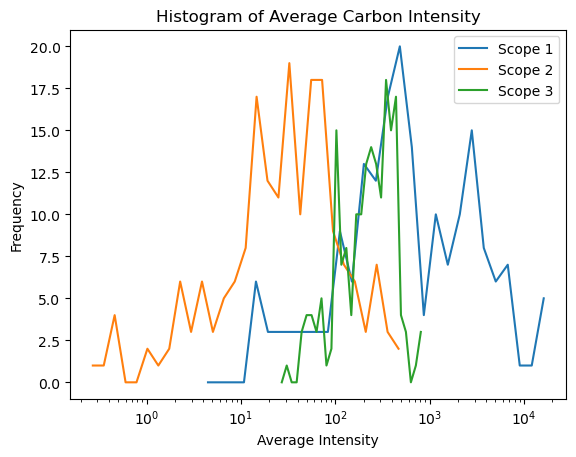

In [37]:
# Compute the histogram with logarithmic bins for each dataset
hist1, bins1 = np.histogram(mean_carbon1, bins=np.logspace(np.log10(min(mean_carbon1)), np.log10(max(mean_carbon1)), 30))
hist2, bins2 = np.histogram(mean_carbon2, bins=np.logspace(np.log10(min(mean_carbon2)), np.log10(max(mean_carbon2)), 30))
hist3, bins3 = np.histogram(mean_carbon3, bins=np.logspace(np.log10(min(mean_carbon3)), np.log10(max(mean_carbon3)), 30))

# Get the x values (centers of the bins)
bin_centers1 = np.sqrt(bins1[:-1] * bins1[1:])
bin_centers2 = np.sqrt(bins2[:-1] * bins2[1:])
bin_centers3 = np.sqrt(bins3[:-1] * bins3[1:])

# Plot the line chart for each dataset
plt.plot(bin_centers1, hist1, linestyle='-', label='Scope 1')
plt.plot(bin_centers2, hist2, linestyle='-', label='Scope 2')
plt.plot(bin_centers3, hist3, linestyle='-', label='Scope 3')

# Add labels and title
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Average Carbon Intensity')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Show legend
plt.legend()

# Show plot
plt.show()

#### Total Market Carbon Emissions

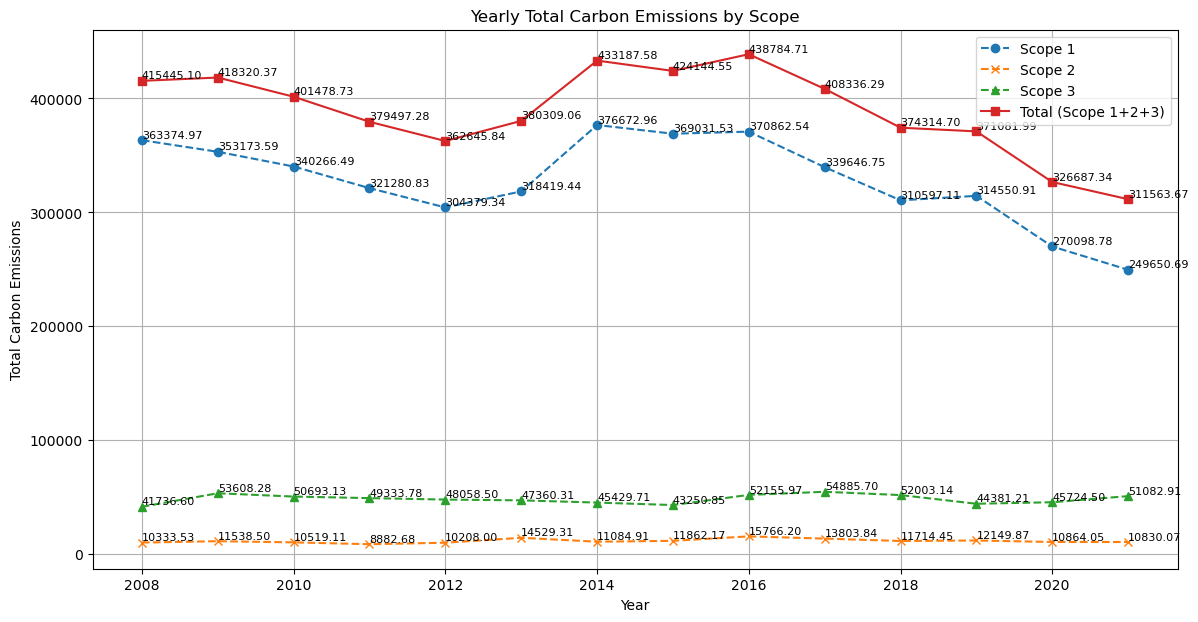

In [38]:
# Load the datasets
df_scope1 = Carbon_2007_Scope1
df_scope2 = Carbon_2007_Scope2
df_scope3 = Carbon_2007_Scope3

# Calculate yearly total emissions for each scope
yearly_total_scope1 = df_scope1.sum(axis=1)
yearly_total_scope2 = df_scope2.sum(axis=1)
yearly_total_scope3 = df_scope3.sum(axis=1)

# Combine the scopes to get total emissions for each company per year, then sum across companies for each year
df_total = df_scope1 + df_scope2 + df_scope3
yearly_total_combined = df_total.sum(axis=1)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(yearly_total_scope1.index, yearly_total_scope1, label='Scope 1', marker='o', linestyle='--')
plt.plot(yearly_total_scope2.index, yearly_total_scope2, label='Scope 2', marker='x', linestyle='--')
plt.plot(yearly_total_scope3.index, yearly_total_scope3, label='Scope 3', marker='^', linestyle='--')
plt.plot(yearly_total_combined.index, yearly_total_combined, label='Total (Scope 1+2+3)', marker='s', linestyle='-')

# Add numbers to each point
for index, value in yearly_total_scope1.items():
    plt.text(index, value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')
for index, value in yearly_total_scope2.items():
    plt.text(index, value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')
for index, value in yearly_total_scope3.items():
    plt.text(index, value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')
for index, value in yearly_total_combined.items():
    plt.text(index, value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')

plt.title('Yearly Total Carbon Emissions by Scope')
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions')
plt.legend()
plt.grid(True)

plt.show()

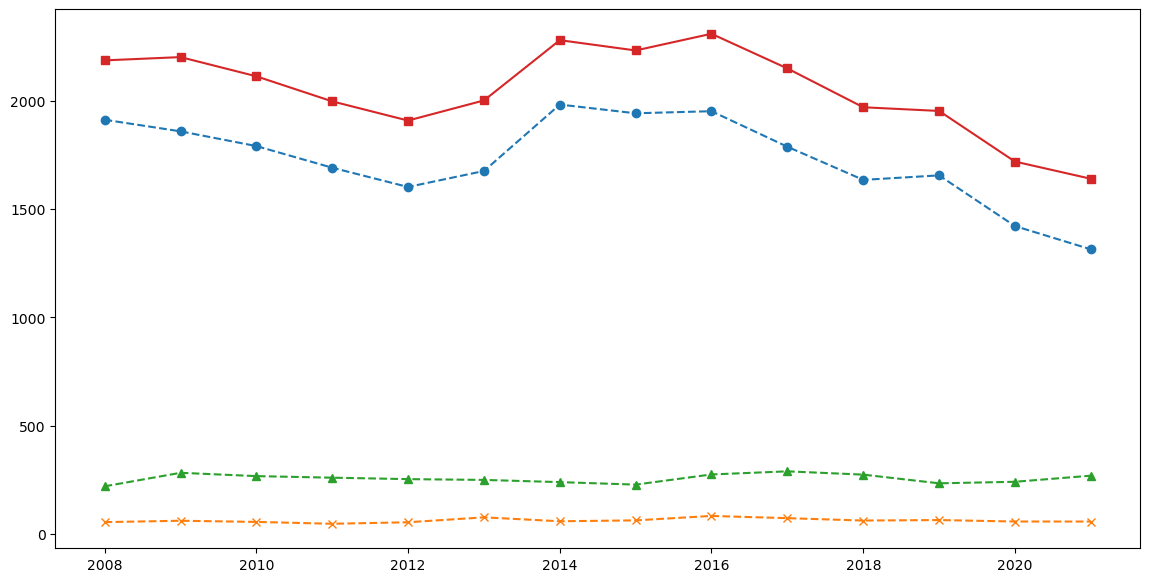

In [39]:
yearly_avg_scope1 = df_scope1.mean(axis=1)
yearly_avg_scope2 = df_scope2.mean(axis=1)
yearly_avg_scope3 = df_scope3.mean(axis=1)

# Combine the scopes to get total emissions for each company per year, then calculate the average across companies for each year
df_total = df_scope1 + df_scope2 + df_scope3
yearly_avg_combined = df_total.mean(axis=1)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_scope1.index, yearly_avg_scope1, label='Scope 1', marker='o', linestyle='--')
plt.plot(yearly_avg_scope2.index, yearly_avg_scope2, label='Scope 2', marker='x', linestyle='--')
plt.plot(yearly_avg_scope3.index, yearly_avg_scope3, label='Scope 3', marker='^', linestyle='--')
plt.plot(yearly_avg_combined.index, yearly_avg_combined, label='Average (Scope 1+2+3)', marker='s', linestyle='-')

count      190.000000
mean      2047.292182
std       3100.713658
min         54.665914
25%        504.878191
50%        808.555639
75%       2418.436910
max      19577.595526
dtype: float64


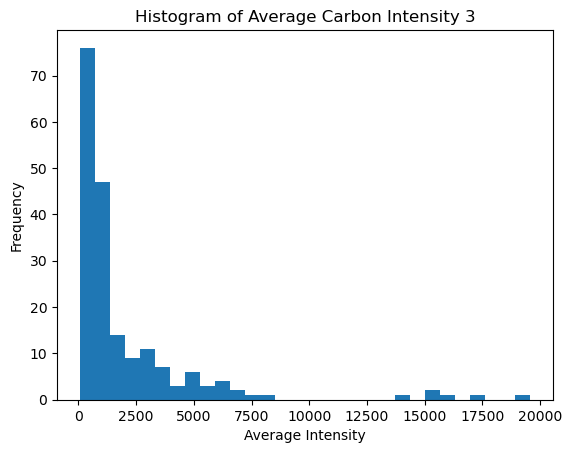

In [40]:
mean_total = df_total.mean(axis=0)
print(mean_total.describe())
# Histogram
# Plotting the average returns in a histogram
plt.hist(mean_total, bins='auto')
plt.title('Histogram of Average Carbon Intensity 3')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.show()

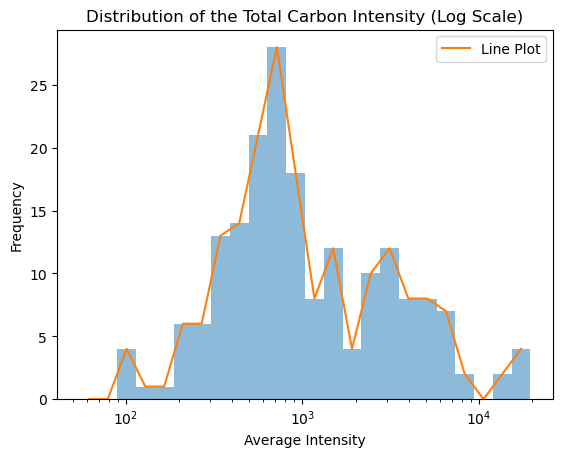

In [41]:
# Compute the histogram with logarithmic bins
hist, bins = np.histogram(mean_total, bins=np.logspace(np.log10(min(mean_total)), np.log10(max(mean_total)), 25))

# Plot the histogram as a background
plt.hist(mean_total, bins=np.logspace(np.log10(min(mean_total)), np.log10(max(mean_total)), 25), density=False, alpha=0.5)

# Get the x values (centers of the bins)
bin_centers = np.sqrt(bins[:-1] * bins[1:])

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-', label='Line Plot')

# Add labels and title
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of the Total Carbon Intensity (Log Scale)')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Show legend
plt.legend()

plt.savefig('Histogram_total_carbon.png')  # Save as PNG format
# Show plot
plt.show()

In [42]:
skewness_total = mean_total.skew()
print("Skewness (scope 3):", skewness_total)

# Just in case
mean_total = pd.to_numeric(mean_total, errors='coerce')

# Now, find the max value and its index
max_emission_total = mean_total.max()
max_emission_total = mean_total.idxmax()

print("\nCompany with the highest total emissions over the 13 years:")
print(f"Company Code: {max_emission_total}, Total Emissions: {max_emission_total}")

top_total = mean_total.sort_values(ascending=False).head(4)
print("\nTop 4 companies with the highest total emissions:")
print(top_total)

Skewness (scope 3): 3.385626345396528

Company with the highest total emissions over the 13 years:
Company Code: CNE1000002Z3, Total Emissions: CNE1000002Z3

Top 4 companies with the highest total emissions:

CNE1000002Z3    19577.595526
CNE1000003D8    17181.199569
CNE000000HW5    15962.788071
TH0465010005    15528.282113
dtype: float64


In [43]:
mean_total.describe()

count      190.000000
mean      2047.292182
std       3100.713658
min         54.665914
25%        504.878191
50%        808.555639
75%       2418.436910
max      19577.595526
dtype: float64

#### Boxplots

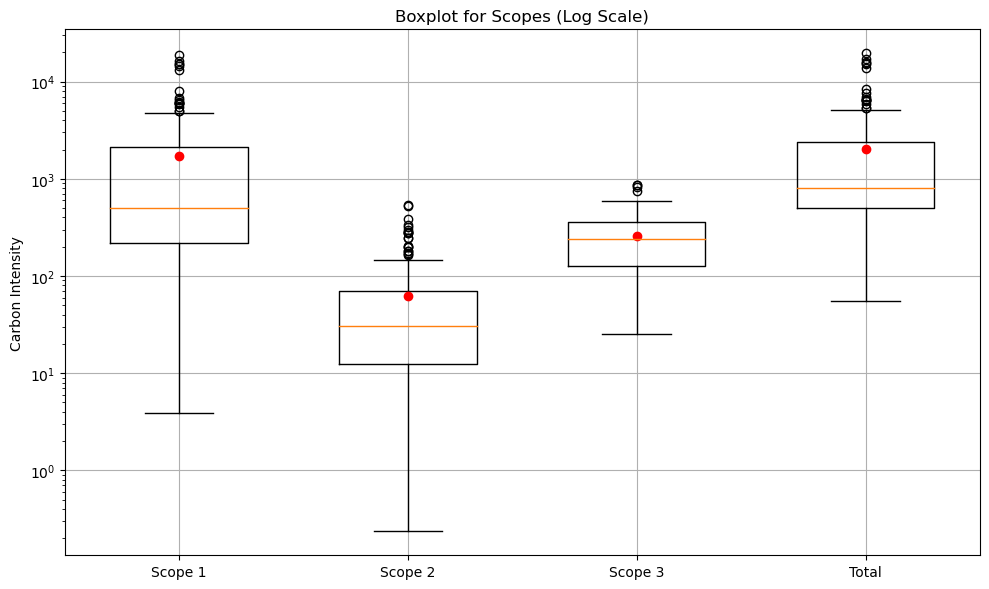

In [44]:
# Assuming you have four arrays: mean_carbon1, mean_carbon2, mean_carbon3, mean_total
arrays = [mean_carbon1, mean_carbon2, mean_carbon3, mean_total]
array_labels = ['Scope 1', 'Scope 2', 'Scope 3', 'Total']

# Create a figure
plt.figure(figsize=(10, 6))

# Generate positions for each boxplot
positions = np.arange(len(arrays)) + 1

# Iterate over the four arrays
for i, array in enumerate(arrays):
    # Calculate the mean for the current array
    mean_array = np.mean(array)

    # Create boxplot for the current array
    plt.boxplot(array, positions=[positions[i]], widths=0.6, showfliers=True)

    # Plot mean as a line
    plt.plot(positions[i], mean_array, marker='o', color='r')


# Set y-axis label
plt.ylabel('Carbon Intensity')

# Set y-axis to log scale
plt.yscale('log')

# Set title
plt.title('Boxplot for Scopes (Log Scale)')

# Set x-axis ticks and labels
plt.xticks(positions, array_labels)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.savefig('Boxplot_scopes_ex1.png')  # Save as PNG format
plt.show()



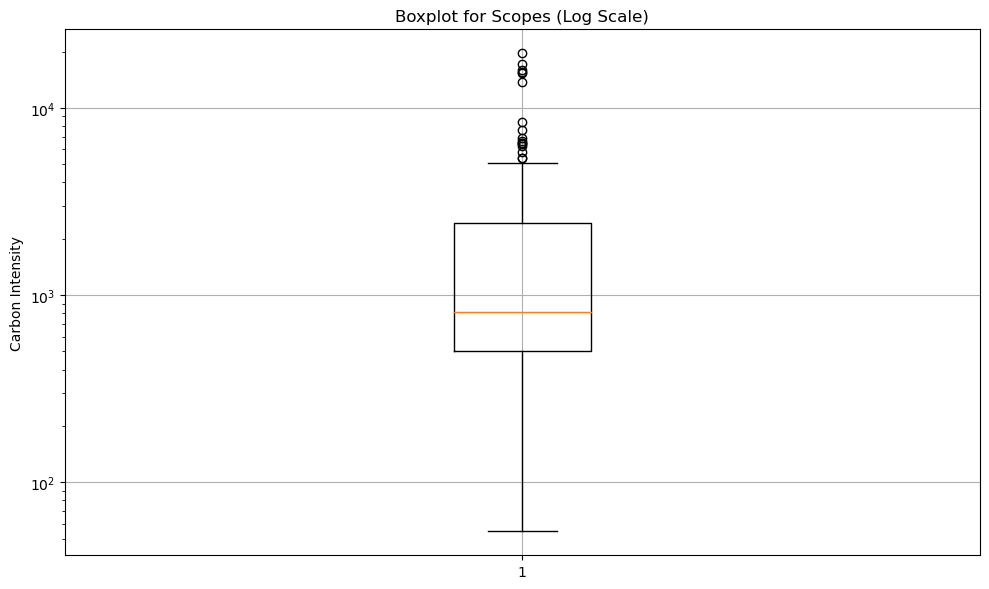

In [45]:
# Create a figure
plt.figure(figsize=(10, 6))


   

# Create boxplot for the current array
plt.boxplot(mean_total, showfliers=True)



# Set y-axis label
plt.ylabel('Carbon Intensity')

# Set y-axis to log scale
plt.yscale('log')

# Set title
plt.title('Boxplot for Scopes (Log Scale)')


# Show plot
plt.grid(True)
plt.tight_layout()
plt.savefig('Boxplot_conclusion.png')  # Save as PNG format
plt.show()

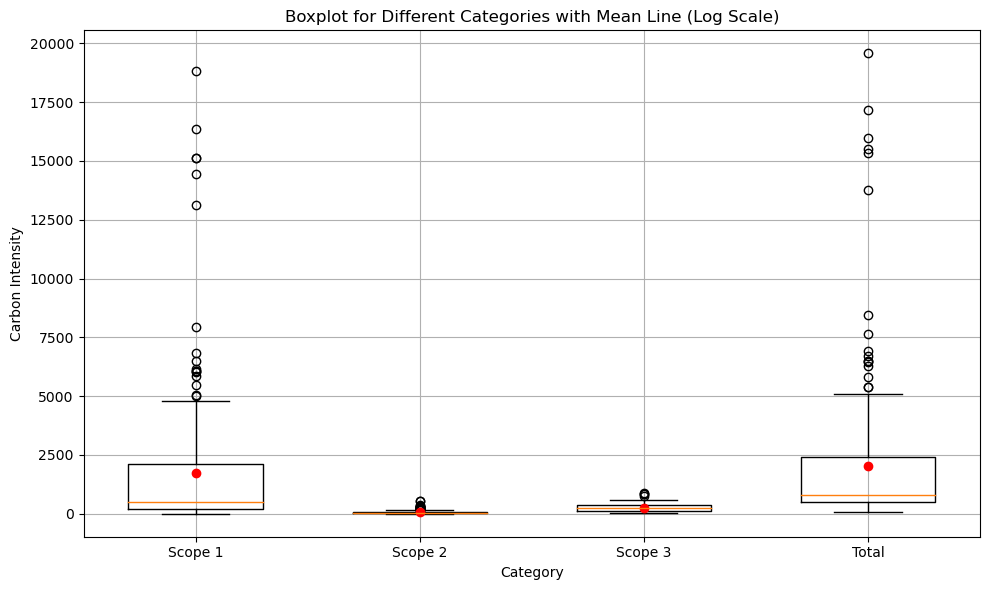

In [46]:
# Assuming you have four arrays: mean_carbon1, mean_carbon2, mean_carbon3, mean_total
arrays = [mean_carbon1, mean_carbon2, mean_carbon3, mean_total]
array_labels = ['Scope 1', 'Scope 2', 'Scope 3', 'Total']

# Create a figure
plt.figure(figsize=(10, 6))

# Generate positions for each boxplot
positions = np.arange(len(arrays)) + 1

# Iterate over the four arrays
for i, array in enumerate(arrays):
    # Calculate the mean for the current array
    mean_array = np.mean(array)

    # Create boxplot for the current array
    plt.boxplot(array, positions=[positions[i]], widths=0.6, showfliers=True)

    # Plot mean as a line
    plt.plot(positions[i], mean_array, marker='o', color='r')

# Set x-axis label
plt.xlabel('Category')

# Set y-axis label
plt.ylabel('Carbon Intensity')


# Set title
plt.title('Boxplot for Different Categories with Mean Line (Log Scale)')

# Set x-axis ticks and labels
plt.xticks(positions, array_labels)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


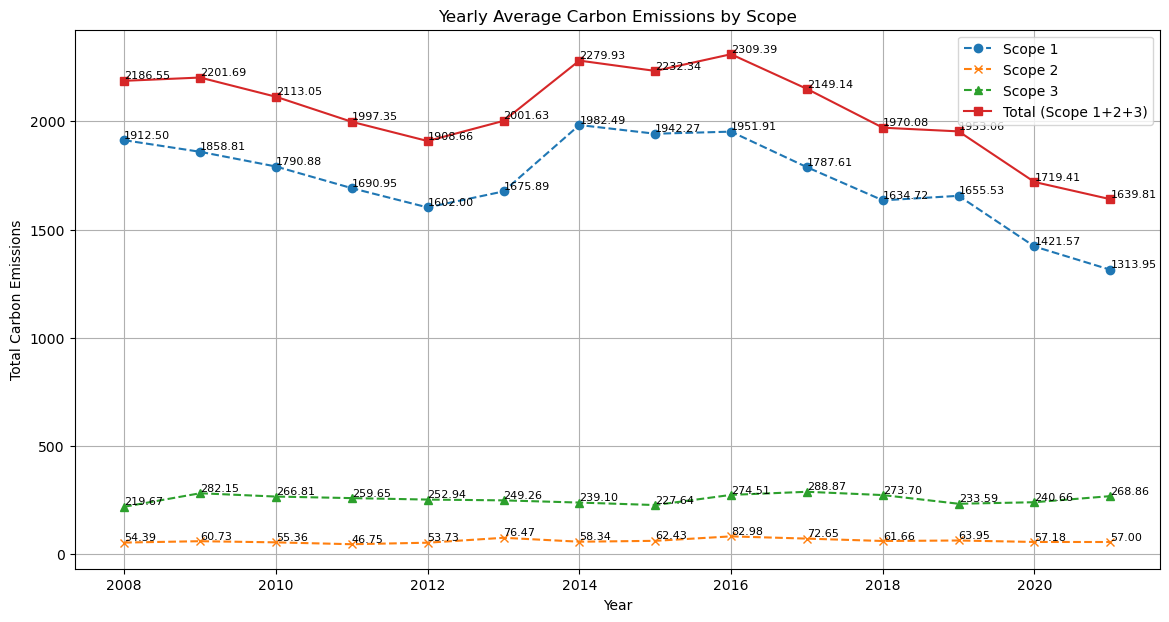

In [47]:
# Load the datasets
df_scope1 = Carbon_2007_Scope1
df_scope2 = Carbon_2007_Scope2
df_scope3 = Carbon_2007_Scope3

# Calculate yearly mean emissions for each scope
yearly_mean_scope1 = df_scope1.mean(axis=1)
yearly_mean_scope2 = df_scope2.mean(axis=1)
yearly_mean_scope3 = df_scope3.mean(axis=1)

# Combine the scopes to get mean emissions for each company per year, then sum across companies for each year
df_mean = df_scope1 + df_scope2 + df_scope3
yearly_mean_combined = df_mean.mean(axis=1)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(yearly_mean_scope1.index, yearly_mean_scope1, label='Scope 1', marker='o', linestyle='--')
plt.plot(yearly_mean_scope2.index, yearly_mean_scope2, label='Scope 2', marker='x', linestyle='--')
plt.plot(yearly_mean_scope3.index, yearly_mean_scope3, label='Scope 3', marker='^', linestyle='--')
plt.plot(yearly_mean_combined.index, yearly_mean_combined, label='Total (Scope 1+2+3)', marker='s', linestyle='-')

# Add numbers to each point
for index, value in yearly_mean_scope1.items():
    plt.text(index, value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')
for index, value in yearly_mean_scope2.items():
    plt.text(index, value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')
for index, value in yearly_mean_scope3.items():
    plt.text(index, value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')
for index, value in yearly_mean_combined.items():
    plt.text(index, value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')

plt.title('Yearly Average Carbon Emissions by Scope')
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions')
plt.legend()
plt.grid(True)

plt.show()

#### Try to see evolutions

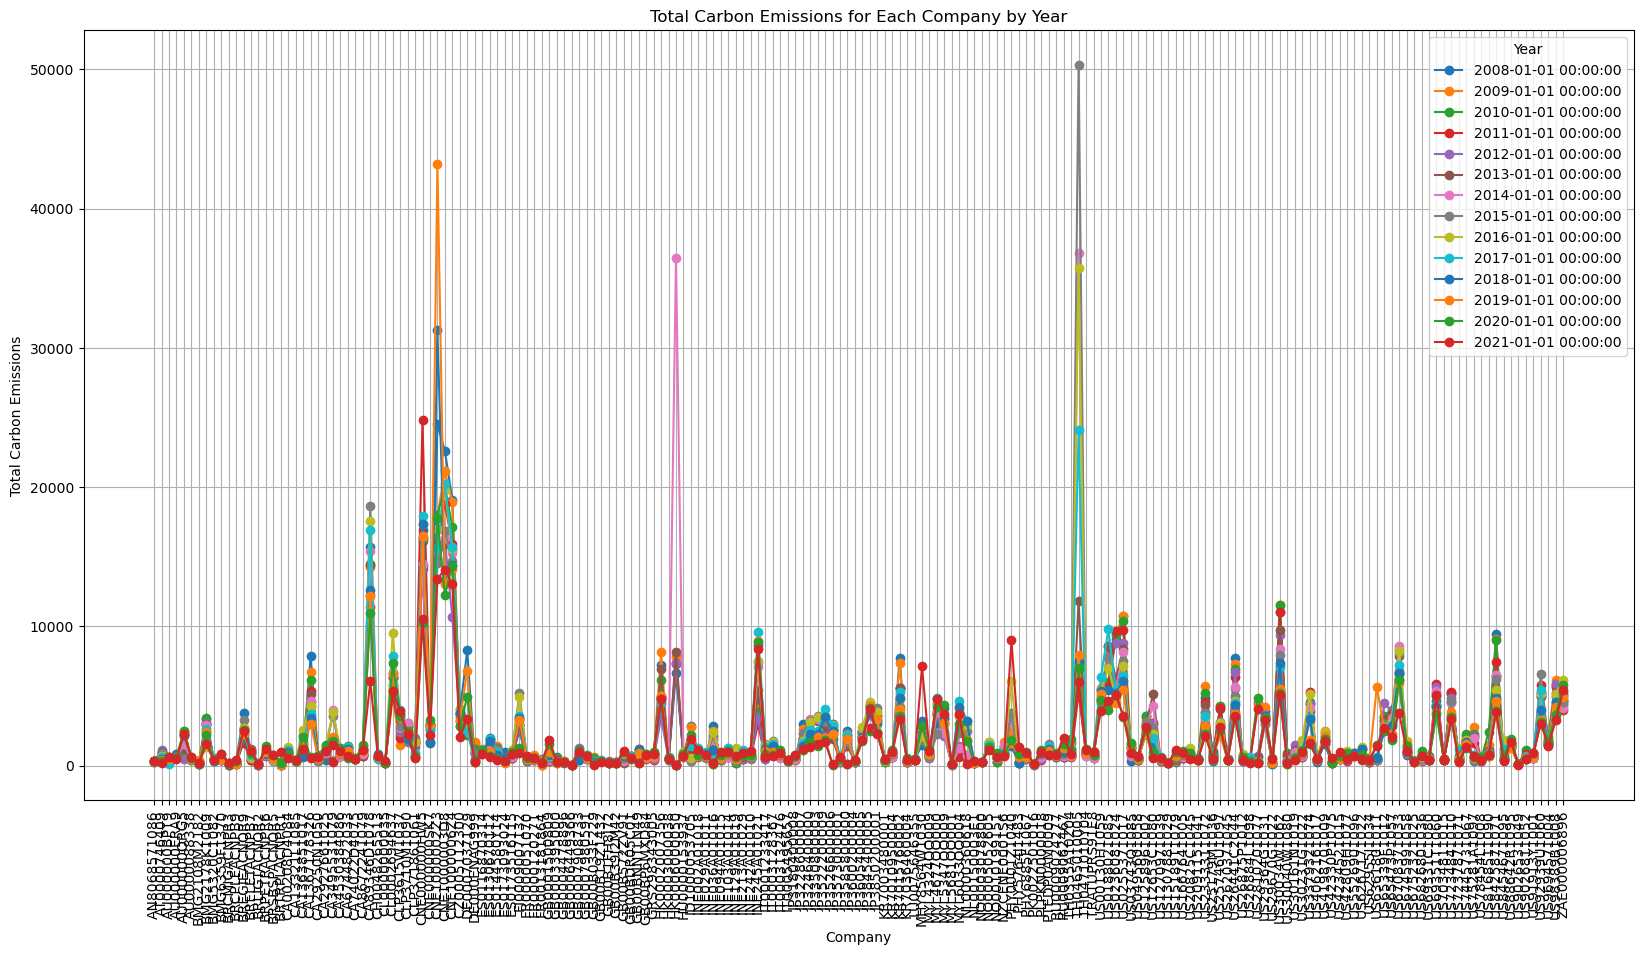

In [48]:
# Combine the scopes to get total emissions for each company per year
df_total = df_scope1 + df_scope2 + df_scope3

# Transpose the data so that companies are on the x-axis and each row represents a year
df_total_transposed = df_total.T

# Plotting
plt.figure(figsize=(20, 10))

# Each row in df_total_transposed now represents a company, and each column a year
# Iterate over each column (year) and plot its values
for year in df_total_transposed.columns:
    plt.plot(df_total_transposed.index, df_total_transposed[year], label=year, marker='o')

plt.title('Total Carbon Emissions for Each Company by Year')
plt.xlabel('Company')
plt.ylabel('Total Carbon Emissions')
plt.xticks(rotation=90)  # Rotate company names for better readability
plt.legend(title='Year')
plt.grid(True)

plt.show()

#### Evolution of distribution across time

##### Dictionary with avg intensity per year

In [49]:
dftest = df_total.reset_index()
yearly_dfs = {}

for year in range(2008, 2022):
    # Filter data for the current year
    df_year = dftest[dftest['Date'].dt.year == year]
    
    # Set the 'Date' column as the index
    df_year.set_index('Date', inplace=True)
    
    # Store the DataFrame in the dictionary with the year as the key
    yearly_dfs[year] = df_year



In [50]:
df_2009 = yearly_dfs[2009]
df_2009.dtypes


AN8068571086    object
AT0000746409    object
AU000000BPT9    object
AU000000ERA9    object
AU000000ORG5    object
                 ...  
US91913Y1001    object
US92939U1060    object
US9694571004    object
US98389B1008    object
ZAE000006896    object
Length: 190, dtype: object

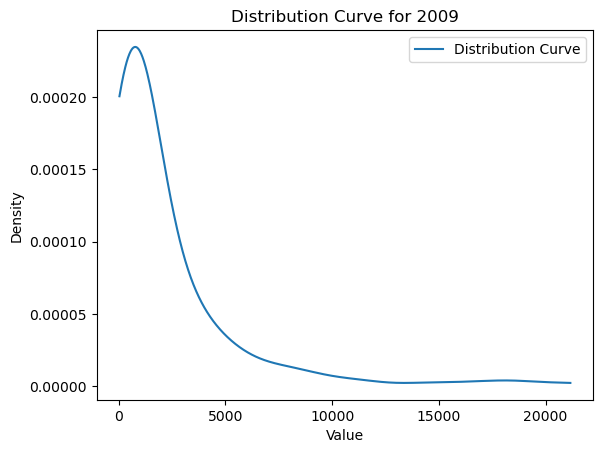

In [51]:
# Access data for the year 2009 from the dictionary
df_2009 = yearly_dfs[2009]

# Convert all values to numeric (this will coerce non-numeric values to NaN)
df_2009_numeric = df_2009.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
df_2009_numeric = df_2009_numeric.dropna().values.flatten()

# Create a density estimator for the data
density = gaussian_kde(df_2009_numeric)

# Define range for x-axis
x = np.linspace(min(df_2009_numeric), max(df_2009_numeric), 1000)

# Calculate density values at each point on the x-axis
density_values = density(x)

# Plot the distribution curve
plt.plot(x, density_values, label='Distribution Curve')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Curve for 2009')

# Show legend
plt.legend()

# Show the plot
plt.show()

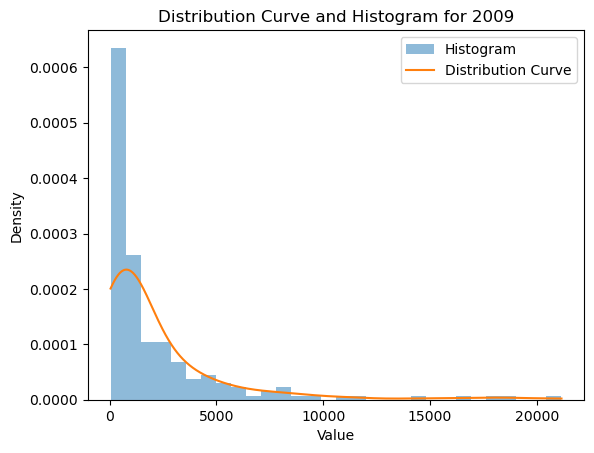

In [52]:
# Access data for the year 2009 from the dictionary
df_2009 = yearly_dfs[2009]

# Convert all values to numeric (this will coerce non-numeric values to NaN)
df_2009_numeric = df_2009.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
df_2009_numeric = df_2009_numeric.dropna().values.flatten()

# Create a density estimator for the data
density = gaussian_kde(df_2009_numeric)

# Define range for x-axis
x = np.linspace(min(df_2009_numeric), max(df_2009_numeric), 1000)

# Calculate density values at each point on the x-axis
density_values = density(x)

# Plot the histogram behind the distribution curve
plt.hist(df_2009_numeric, bins=30, density=True, alpha=0.5, label='Histogram')

# Plot the distribution curve
plt.plot(x, density_values, label='Distribution Curve')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Curve and Histogram for 2009')

# Show legend
plt.legend()

# Show the plot
plt.show()

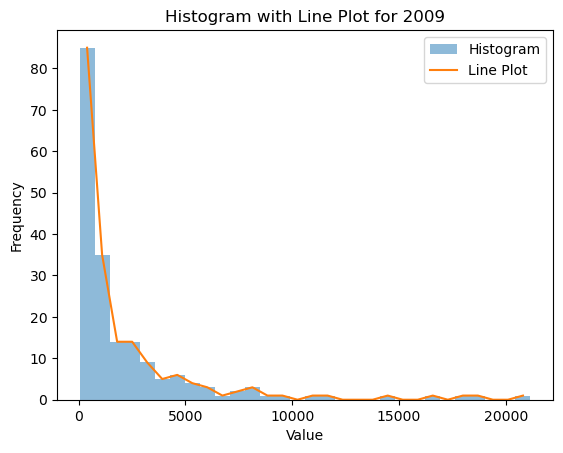

In [53]:
# Access data for the year 2009 from the dictionary
df_2009 = yearly_dfs[2009]

# Convert all values to numeric (this will coerce non-numeric values to NaN)
df_2009_numeric = df_2009.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
df_2009_numeric = df_2009_numeric.dropna().values.flatten()

# Compute the histogram
hist, bins = np.histogram(df_2009_numeric, bins=30)

# Get the x values (centers of the bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot the histogram as a background
plt.hist(df_2009_numeric, bins=30, density=False, alpha=0.5, label='Histogram')

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-', label='Line Plot')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Line Plot for 2009')

# Show legend
plt.legend()

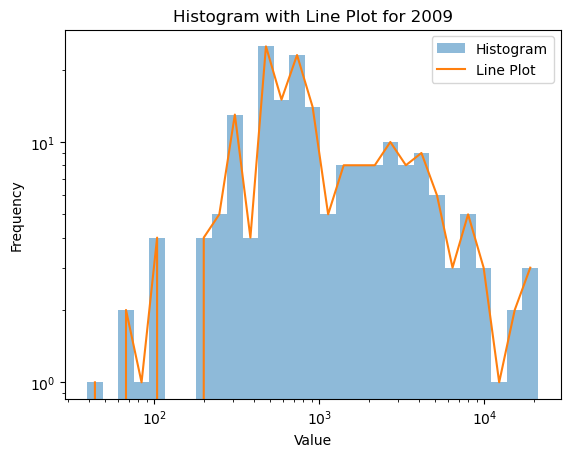

In [54]:
# Access data for the year 2009 from the dictionary
df_2009 = yearly_dfs[2009]

# Convert all values to numeric (this will coerce non-numeric values to NaN)
df_2009_numeric = df_2009.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
df_2009_numeric = df_2009_numeric.dropna().values.flatten()

# Compute the histogram
hist, bins = np.histogram(df_2009_numeric, bins=np.logspace(np.log10(min(df_2009_numeric)), np.log10(max(df_2009_numeric)), 30))

# Plot the histogram as a background
plt.hist(df_2009_numeric, bins=np.logspace(np.log10(min(df_2009_numeric)), np.log10(max(df_2009_numeric)), 30), density=False, alpha=0.5, label='Histogram')

# Get the x values (centers of the bins)
bin_centers = np.sqrt(bins[:-1] * bins[1:])

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-', label='Line Plot')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Line Plot for 2009')

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Show legend
plt.legend()

# Show plot
plt.show()

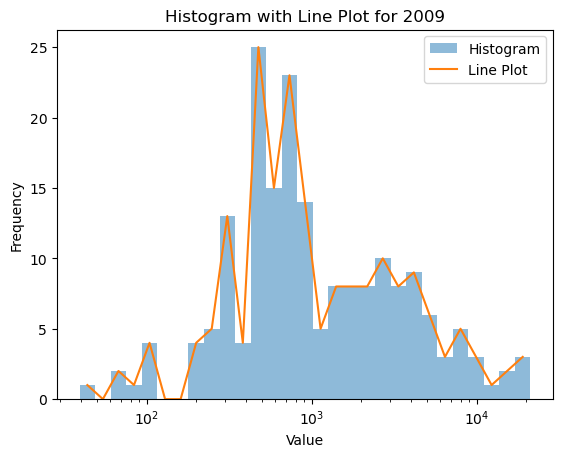

In [55]:
# Access data for the year 2009 from the dictionary
df_2009 = yearly_dfs[2009]

# Convert all values to numeric (this will coerce non-numeric values to NaN)
df_2009_numeric = df_2009.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
df_2009_numeric = df_2009_numeric.dropna().values.flatten()

# Compute the histogram
hist, bins = np.histogram(df_2009_numeric, bins=np.logspace(np.log10(min(df_2009_numeric)), np.log10(max(df_2009_numeric)), 30))

# Plot the histogram as a background
plt.hist(df_2009_numeric, bins=np.logspace(np.log10(min(df_2009_numeric)), np.log10(max(df_2009_numeric)), 30), density=False, alpha=0.5, label='Histogram')

# Get the x values (centers of the bins)
bin_centers = np.sqrt(bins[:-1] * bins[1:])

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-', label='Line Plot')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Line Plot for 2009')

# Set logarithmic scale for both axes
plt.xscale('log')


# Show legend
plt.legend()

# Show plot
plt.show()

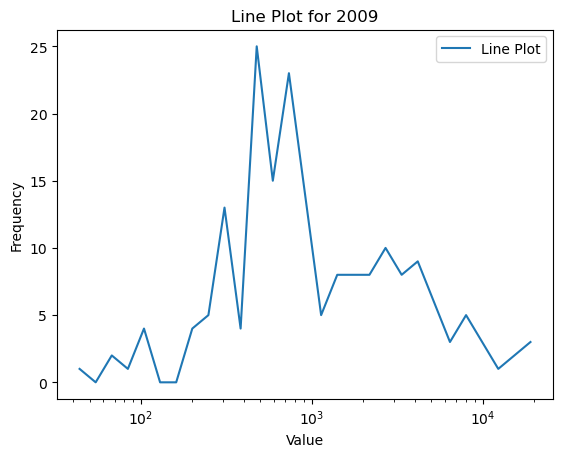

In [56]:
# Access data for the year 2009 from the dictionary
df_2009 = yearly_dfs[2009]

# Convert all values to numeric (this will coerce non-numeric values to NaN)
df_2009_numeric = df_2009.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
df_2009_numeric = df_2009_numeric.dropna().values.flatten()

# Compute the histogram
hist, bins = np.histogram(df_2009_numeric, bins=np.logspace(np.log10(min(df_2009_numeric)), np.log10(max(df_2009_numeric)), 30))

# Get the x values (centers of the bins)
bin_centers = np.sqrt(bins[:-1] * bins[1:])

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-', label='Line Plot')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Line Plot for 2009')

# Set logarithmic scale for the x-axis
plt.xscale('log')

# Show legend
plt.legend()

# Show plot
plt.show()

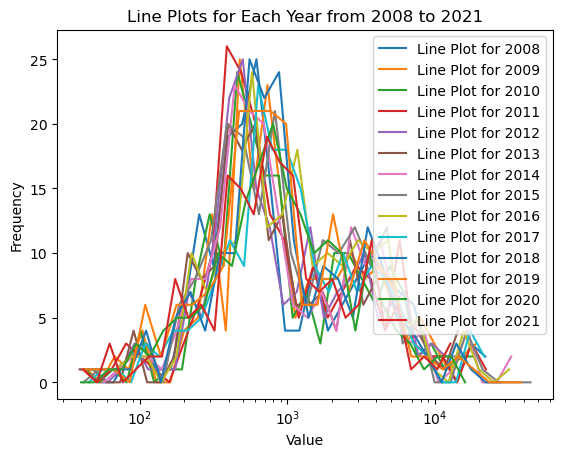

In [57]:
# Create an empty list to store the histograms and line plots for each year
for year in range(2008, 2022):
    # Access data for the current year from the dictionary
    df_year = yearly_dfs[year]

    # Convert all values to numeric (this will coerce non-numeric values to NaN)
    df_year_numeric = df_year.apply(pd.to_numeric, errors='coerce')

    # Drop rows with any NaN values
    df_year_numeric = df_year_numeric.dropna().values.flatten()

    # Compute the histogram
    hist, bins = np.histogram(df_year_numeric, bins=np.logspace(np.log10(min(df_year_numeric)), np.log10(max(df_year_numeric)), 30))

    # Get the x values (centers of the bins)
    bin_centers = np.sqrt(bins[:-1] * bins[1:])

    # Plot the line chart
    plt.plot(bin_centers, hist, linestyle='-', label=f'Line Plot for {year}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Line Plots for Each Year from 2008 to 2021')

# Set logarithmic scale for the x-axis
plt.xscale('log')

# Show legend
plt.legend()

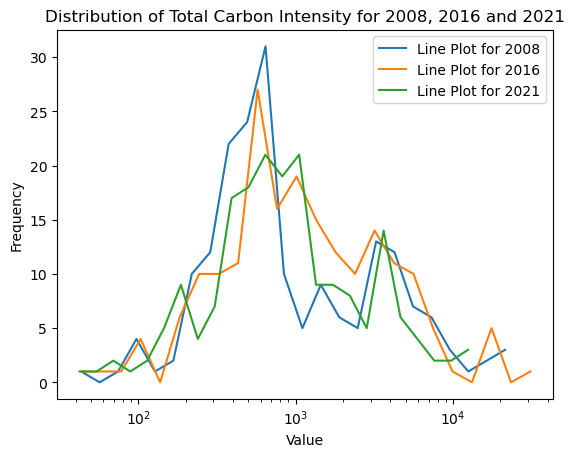

In [58]:
# Create an empty list to store the histograms and line plots for each year
for year in [2008, 2016, 2021]:
    # Access data for the current year from the dictionary
    df_year = yearly_dfs[year]

    # Convert all values to numeric (this will coerce non-numeric values to NaN)
    df_year_numeric = df_year.apply(pd.to_numeric, errors='coerce')

    # Drop rows with any NaN values
    df_year_numeric = df_year_numeric.dropna().values.flatten()

    # Compute the histogram
    hist, bins = np.histogram(df_year_numeric, bins=np.logspace(np.log10(min(df_year_numeric)), np.log10(max(df_year_numeric)), 25))

    # Get the x values (centers of the bins)
    bin_centers = np.sqrt(bins[:-1] * bins[1:])

    # Plot the line chart
    plt.plot(bin_centers, hist, linestyle='-', label=f'Line Plot for {year}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Carbon Intensity for 2008, 2016 and 2021')

# Set logarithmic scale for the x-axis
plt.xscale('log')


# Show legend
plt.legend()

plt.savefig('Distibution_2016.png')  # Save as PNG format

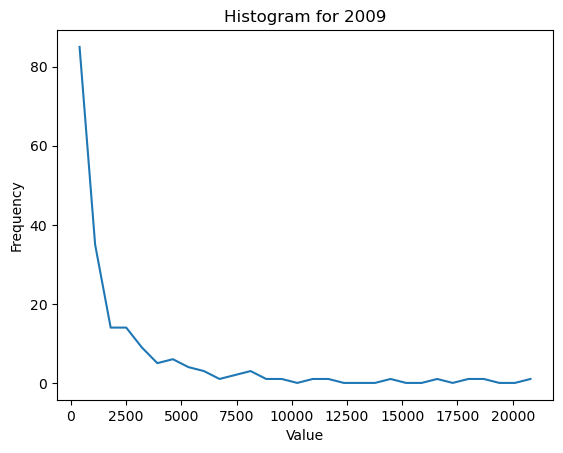

In [59]:
# Access data for the year 2009 from the dictionary
df_2009 = yearly_dfs[2009]

# Convert all values to numeric (this will coerce non-numeric values to NaN)
df_2009_numeric = df_2009.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
df_2009_numeric = df_2009_numeric.dropna().values.flatten()

# Compute the histogram
hist, bins = np.histogram(df_2009_numeric, bins=30)

# Get the x values (centers of the bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot the line chart
plt.plot(bin_centers, hist, linestyle='-')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for 2009')

# Show the plot
plt.show()

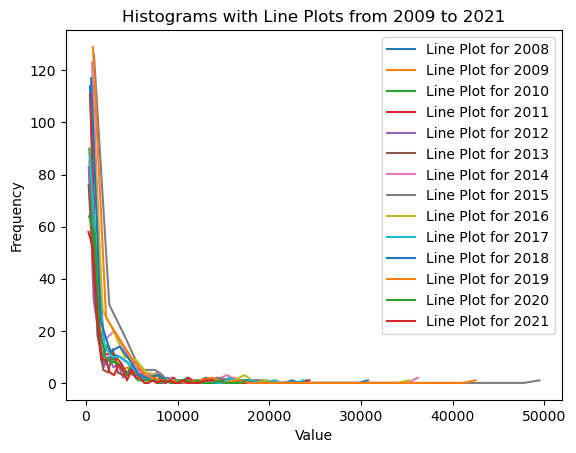

In [60]:
# Create an empty list to store the histograms and line plots for each year
for year in range(2008, 2022):
    # Access data for the current year from the dictionary
    df_year = yearly_dfs[year]

    # Convert all values to numeric (this will coerce non-numeric values to NaN)
    df_year_numeric = df_year.apply(pd.to_numeric, errors='coerce')

    # Drop rows with any NaN values
    df_year_numeric = df_year_numeric.dropna().values.flatten()

    # Compute the histogram
    hist, bins = np.histogram(df_year_numeric, bins=30)

    # Get the x values (centers of the bins)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Plot the line chart
    plt.plot(bin_centers, hist, linestyle='-', label=f'Line Plot for {year}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms with Line Plots from 2009 to 2021')

# Show legend
plt.legend()

# Show the plot
plt.show()

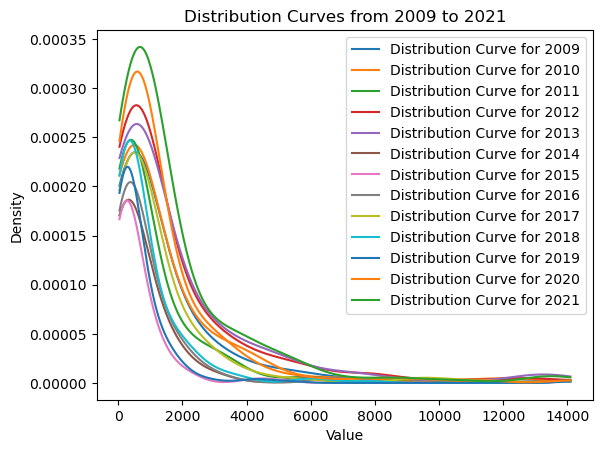

In [61]:
# Create an empty list to store the densities for each year
all_densities = []

# Iterate over each year from 2009 to 2021
for year in range(2009, 2022):
    # Access data for the current year from the dictionary
    df_year = yearly_dfs[year]

    # Convert all values to numeric (this will coerce non-numeric values to NaN)
    df_year_numeric = df_year.apply(pd.to_numeric, errors='coerce')

    # Drop rows with any NaN values
    df_year_numeric = df_year_numeric.dropna().values.flatten()

    # Create a density estimator for the data
    density = gaussian_kde(df_year_numeric)

    # Define range for x-axis
    x = np.linspace(min(df_year_numeric), max(df_year_numeric), 1000)

    # Calculate density values at each point on the x-axis
    density_values = density(x)
    
    # Append density values to the list
    all_densities.append(density_values)

# Plot the distribution curves for each year
for year, density_values in zip(range(2009, 2022), all_densities):
    plt.plot(x, density_values, label=f'Distribution Curve for {year}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Curves from 2009 to 2021')

# Show legend
plt.legend()

# Show the plot
plt.show()

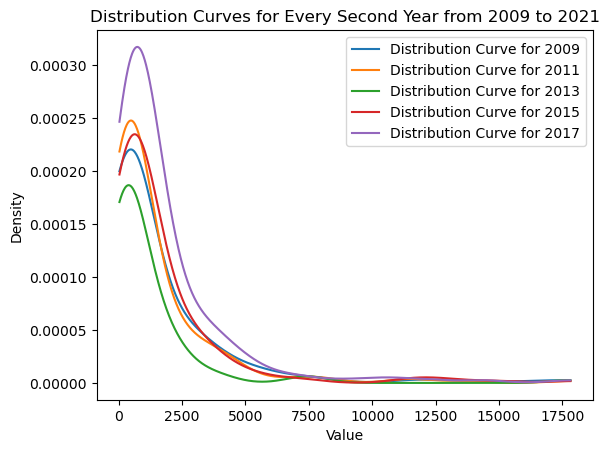

In [62]:
# Create an empty list to store the densities for every second year
all_densities = []

# Iterate over every second year from 2009 to 2021
for year in range(2008, 2022, 3):
    # Access data for the current year from the dictionary
    df_year = yearly_dfs[year]

    # Convert all values to numeric (this will coerce non-numeric values to NaN)
    df_year_numeric = df_year.apply(pd.to_numeric, errors='coerce')

    # Drop rows with any NaN values
    df_year_numeric = df_year_numeric.dropna().values.flatten()

    # Create a density estimator for the data
    density = gaussian_kde(df_year_numeric)

    # Define range for x-axis
    x = np.linspace(min(df_year_numeric), max(df_year_numeric), 1000)

    # Calculate density values at each point on the x-axis
    density_values = density(x)
    
    # Append density values to the list
    all_densities.append(density_values)

# Plot the distribution curves for every second year
for year, density_values in zip(range(2009, 2022, 2), all_densities):
    plt.plot(x, density_values, label=f'Distribution Curve for {year}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Curves for Every Second Year from 2009 to 2021')

# Show legend
plt.legend()

# Show the plot
plt.show()

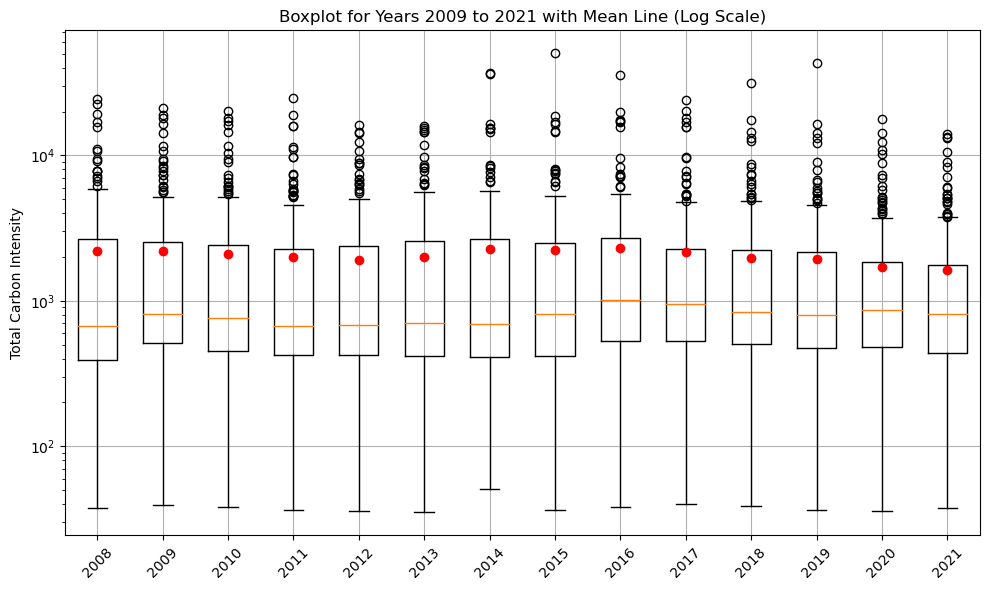

In [63]:
# Create a figure
plt.figure(figsize=(10, 6))

# Iterate over the years from 2009 to 2021
for year in range(2008, 2022):
    # Filter the DataFrame to get data only for the current year
    data_year = df_total.loc[f'{year}-01-01']

    # Create boxplot for the data of the current year
    plt.boxplot(data_year, positions=[year], widths=0.6, showfliers=True)

    # Calculate mean for the current year
    mean_year = data_year.mean()

    # Plot mean as a line
    plt.plot(year, mean_year, marker='o', color='r')


# Set y-axis label
plt.ylabel('Total Carbon Intensity')

# Set y-axis to log scale
plt.yscale('log')

# Set title
plt.title('Boxplot for Years 2009 to 2021 with Mean Line (Log Scale)')

# Show plot
plt.grid(True)
plt.xticks(range(2008, 2022), rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.savefig('Boxplot_evolution.png')  # Save as PNG format
plt.show()

In [64]:
# Begin the LaTeX table
latex_table = "\\begin{table}[htbp]\n\\centering\n\\begin{tabular}{|c|c|c|}\n\\hline\n"

# Add table headers
latex_table += "Year & Mean & Median \\\\\n\\hline\n"

# Iterate over the years from 2008 to 2021
for year in range(2008, 2022):
    # Filter the DataFrame to get data only for the current year
    data_year = df_total.loc[f'{year}-01-01']

    # Calculate mean and median for the current year
    mean_year = data_year.mean()
    median_year = data_year.median()

    # Add a row to the LaTeX table
    latex_table += f"{year} & {mean_year:.2f} & {median_year:.2f} \\\\\n"

# End the LaTeX table
latex_table += "\\hline\n\\end{tabular}\n\\caption{Mean and Median for Each Year}\n\\end{table}"

# Print the LaTeX table
print(latex_table)

\begin{table}[htbp]
\centering
\begin{tabular}{|c|c|c|}
\hline
Year & Mean & Median \\
\hline
2008 & 2186.55 & 673.94 \\
2009 & 2201.69 & 805.42 \\
2010 & 2113.05 & 759.86 \\
2011 & 1997.35 & 672.53 \\
2012 & 1908.66 & 683.63 \\
2013 & 2001.63 & 699.48 \\
2014 & 2279.93 & 694.00 \\
2015 & 2232.34 & 808.06 \\
2016 & 2309.39 & 1007.62 \\
2017 & 2149.14 & 957.45 \\
2018 & 1970.08 & 831.89 \\
2019 & 1953.06 & 796.63 \\
2020 & 1719.41 & 866.80 \\
2021 & 1639.81 & 808.47 \\
\hline
\end{tabular}
\caption{Mean and Median for Each Year}
\end{table}


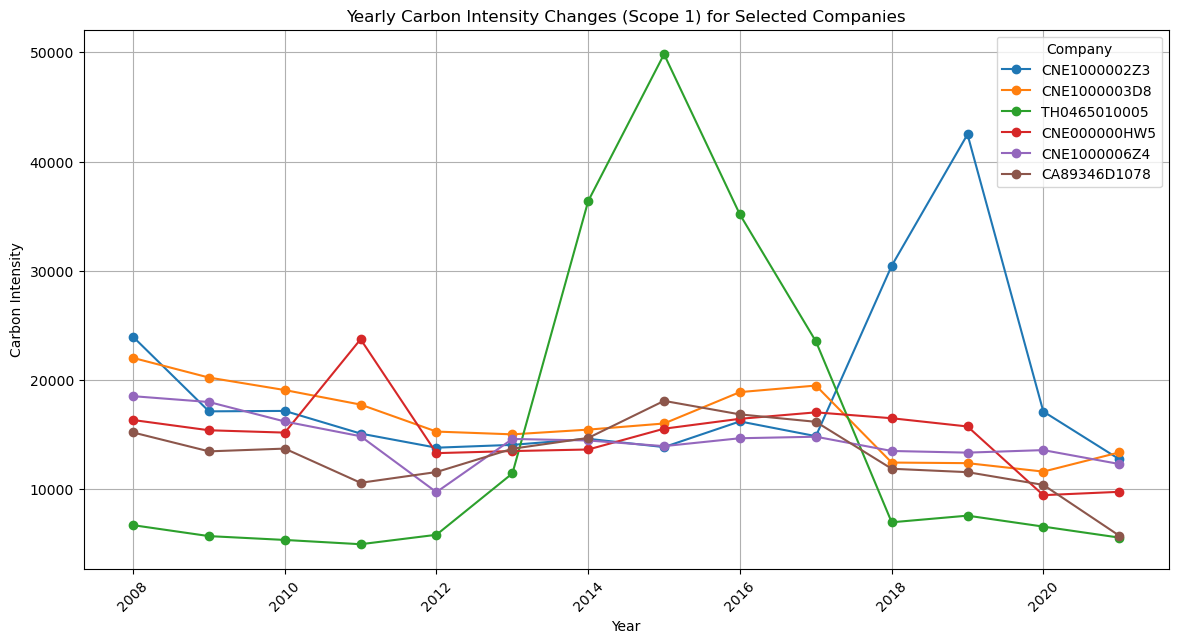

In [65]:
# Identifying 6 companies by their codes or names
selected_companies = ['CNE1000002Z3', 'CNE1000003D8', 'TH0465010005', 'CNE000000HW5', 'CNE1000006Z4', 'CA89346D1078']

# Plotting
plt.figure(figsize=(14, 7))

for company in selected_companies:
    plt.plot(Carbon_2007_Scope1.index, Carbon_2007_Scope1[company], label=company, marker='o')

plt.title('Yearly Carbon Intensity Changes (Scope 1) for Selected Companies')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Company')
plt.grid(True)

plt.show()

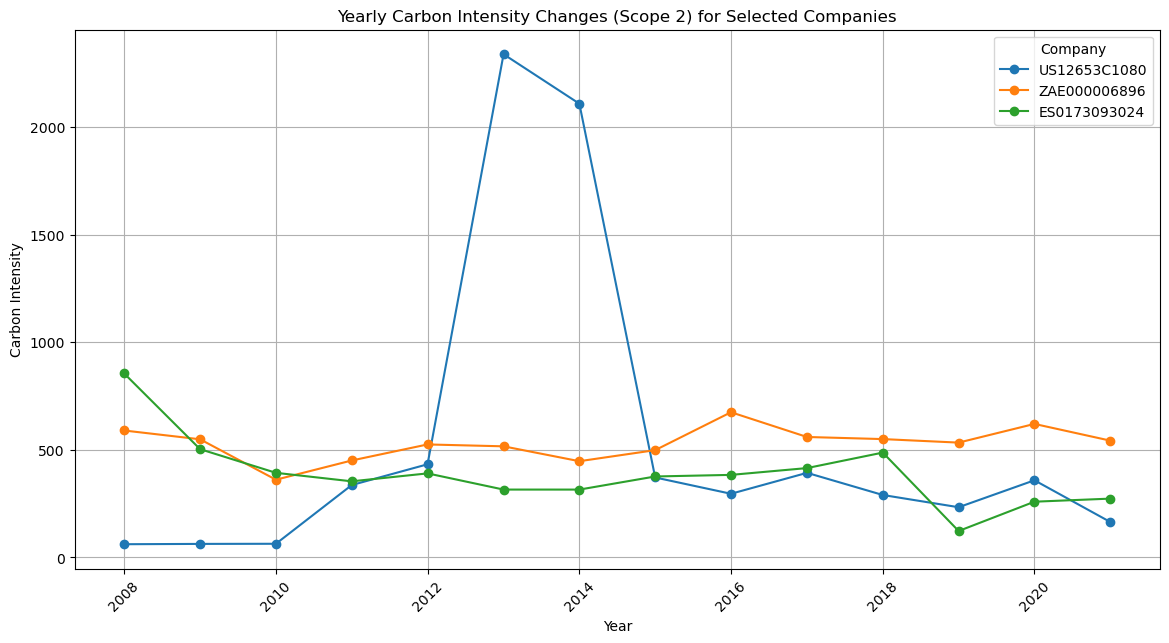

In [66]:
# Identifying 3 companies by their codes or names
selected_companies = ['US12653C1080', 'ZAE000006896', 'ES0173093024']

# Plotting
plt.figure(figsize=(14, 7))

for company in selected_companies:
    plt.plot(Carbon_2007_Scope2.index, Carbon_2007_Scope2[company], label=company, marker='o')

plt.title('Yearly Carbon Intensity Changes (Scope 2) for Selected Companies')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Company')
plt.grid(True)

plt.show()

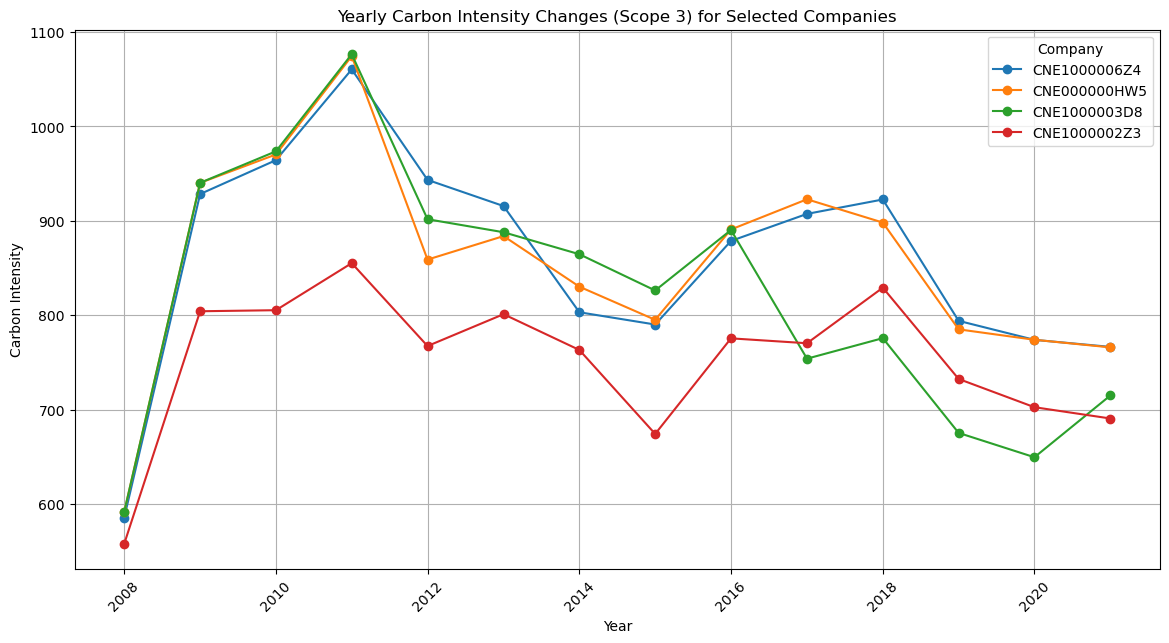

In [67]:
# Identifying 4 companies by their codes or names
selected_companies = ['CNE1000006Z4', 'CNE000000HW5', 'CNE1000003D8', 'CNE1000002Z3']

# Plotting
plt.figure(figsize=(14, 7))

for company in selected_companies:
    plt.plot(Carbon_2007_Scope3.index, Carbon_2007_Scope3[company], label=company, marker='o')

plt.title('Yearly Carbon Intensity Changes (Scope 3) for Selected Companies')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Company')
plt.grid(True)

plt.show()

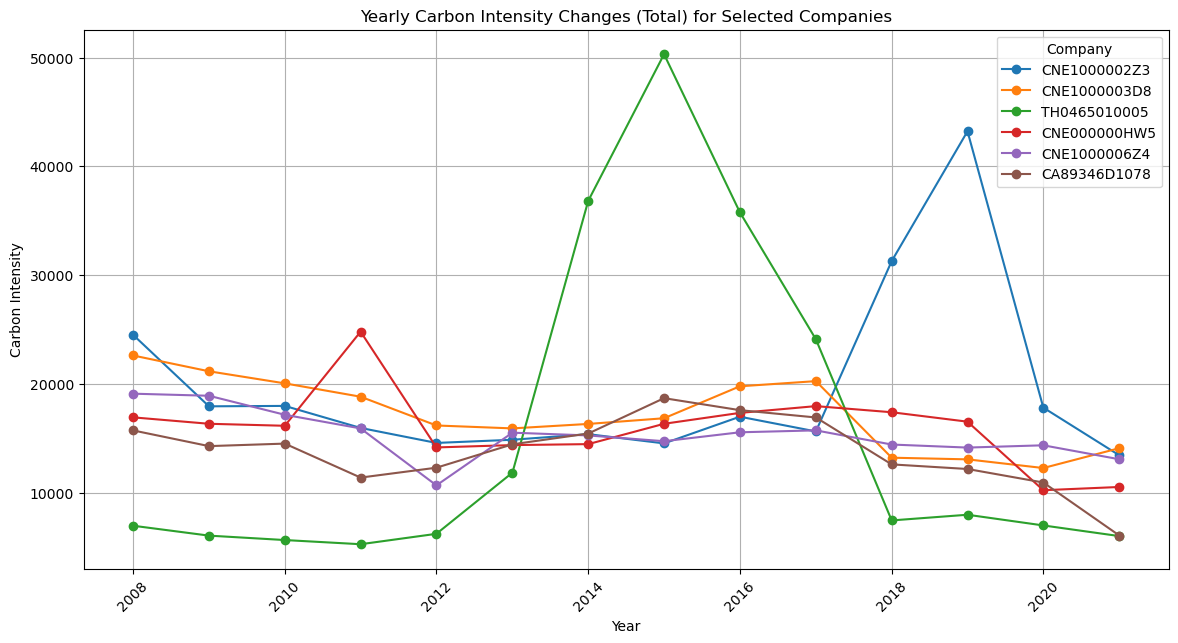

In [68]:
# Identifying 6 companies by their codes or names
selected_companies = ['CNE1000002Z3', 'CNE1000003D8', 'TH0465010005', 'CNE000000HW5', 'CNE1000006Z4', 'CA89346D1078']

# Plotting
plt.figure(figsize=(14, 7))

for company in selected_companies:
    plt.plot(df_total.index, df_total[company], label=company, marker='o')

plt.title('Yearly Carbon Intensity Changes (Total) for Selected Companies')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Company')
plt.grid(True)
plt.savefig('Top6time.png')
plt.show()

## Exercise 2

### Variables ex2

#### market value 2007-2021 (mv_ex_2)

In [69]:
#Reading and filtering by period the market value data
mv_ex_2 = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
mv_ex_2 = mv_ex_2[(mv_ex_2['Date'] >= '2007-12-01') & (mv_ex_2['Date'] <= '2022-12-31')]
mv_ex_2['Date'] = pd.to_datetime(mv_ex_2['Date'])
print(mv_ex_2.shape)
mv_ex_2.head(1)

(181, 191)


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
95 2007-12-31      117637.4       10571.3        1171.1       3265.83   

    AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  ...  \
95       6803.47       4592.15       4177.58       8427.19       3100.59  ...   

    US8425871071  US8454671095  US88642R1095  US9026531049  US9026811052  \
95       29429.8       9496.63       3009.89       2663.35       2907.14   

    US91913Y1001  US92939U1060  US9694571004  US98389B1008  ZAE000006896  
95      38547.03       5696.29      21236.39       9477.81      31281.12  

[1 rows x 191 columns]

#### market value 2022 (mv_2022)

In [70]:
mv_2022 = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
#mv_2022 = mv_2022['Date'] = pd.to_datetime(mv_2022['Date'])
mv_2022 = mv_ex_2[(mv_2022['Date'] >= '2021-12-31') & (mv_2022['Date'] <= '2022-12-31')]
print(mv_2022.shape)
mv_2022.head(1)

(13, 191)


C:\Users\castr\AppData\Local\Temp\ipykernel_16828\2517455582.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mv_2022 = mv_ex_2[(mv_2022['Date'] >= '2021-12-31') & (mv_2022['Date'] <= '2022-12-31')]


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
263 2021-12-31      42031.31      19145.95       2089.88        912.49   

     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  \
263       6709.72       5138.79        699.79      16045.89        8118.7   

     ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
263  ...      72681.31        4729.8         442.1      19085.79   

     US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
263       9605.38      30707.64      30619.23      31639.39      36468.33   

     ZAE000006896  
263      10209.11  

[1 rows x 191 columns]

#### Market value 2008-2021 (mv_annual)

In [71]:
#Reading and filtering by period the market value data
mv_test = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
mv_test['Date'] = pd.to_datetime(mv_test['Date'])
mv_test.set_index('Date', inplace=True)
mv = mv_test.loc['2008':'2021']
mv.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31      90307.38       9860.39       1098.98       3205.13   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31       6813.04       3804.57       3765.02       8529.46   

            BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
Date                                    ...                               
2008-01-31       2262.04       7683.03  ...      27808.74       9561.39   

            US88642R1095  US9026531049  US9026811052  US91913Y1001  \
Date                                                                 
2008-01-31       2784.95       3063.19       2841.87      31576.54   

            US92939U1060  US9694571004  US98389B1008  ZAE000006896  
Date                                                                
2008-01-31        5324.0      18975.04       8713.54      29856.54  

[1 rows x 190 columns]

In [72]:
# Sort the columns of the DataFrame to make sure we have the same firms order for future dataframe merging
mv_sorted = mv[mv.columns.sort_values()]
mv_sorted = mv[mv.columns.sort_values()]

# Extract the sorted column names into a list for future check
sorted_column_mv = mv_sorted.columns.tolist()

In [73]:
# Resample the DataFrame to get annual averages
mv_annual = mv_sorted.resample('Y').mean()
mv_annual.index = mv_annual.index.strftime('%Y') #Formating the Date column to show only the year
# Display the result
mv_annual.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
Date                                                                         
2008  97380.419167    10259.0075    991.646667   3216.464167    10365.4925   

      AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  \
Date                                                                         
2008   2828.138333   3026.095833   9213.655833   2048.476667   8422.081667   

      ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
Date  ...                                                           
2008  ...      27768.76  12352.605833     2862.8175       2899.33   

      US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
Date                                                                         
2008     2778.6425    20495.0775   5257.583333      17139.61   8605.990833   

      ZAE000006896  
Date                
2008  30525.718333  

[1 rows x 190 columns]

#### Market Value change (mvc and mvc_annual_mean)

In [74]:
#Calculating market value change with monthly data
mvc = mv_test.pct_change()
mvc = mvc.loc['2008':'2021'] #Filtering over sample period
mvc.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31     -0.232324     -0.067249     -0.061583     -0.018586   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31      0.001407     -0.171506     -0.098756      0.012136   

            BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
Date                                    ...                               
2008-01-31     -0.270449     -0.009127  ...     -0.055082      0.006819   

            US88642R1095  US9026531049  US9026811052  US91913Y1001  \
Date                                                                 
2008-01-31     -0.074734      0.150127     -0.022452     -0.180831   

            US92939U1060  US9694571004  US98389B1008  ZAE000006896  
Date                                                                
2008-01-31     -0.065357     -0.106485     -0.080638     -0.045541  

[1 rows x 190 columns]

In [75]:
# Resample the DataFrame to get annual market value change
mvc_annual_mean = pd.DataFrame(mvc.mean()*12, columns=['MV_average']).round(2)
# Display the result
mvc_annual_mean.head(1)

MV_average
AN8068571086         0.0

#### Returns (returns)

In [76]:
#Just using a simpler name for this dataset:
RI = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/DS_RI_T_USD_M.csv')
sectors = pd.read_csv('https://raw.githubusercontent.com/Timiboylebg/finance/4dca1b79136eed4def2118dd5fd4715d50bd739c/Static_Carbon.csv', sep=';')
RI = pd.merge(RI, sectors, on='ISIN')
RI.head(1)

ISIN          NAME  2000-01-31 00:00:00  2000-02-29 00:00:00  \
0  AN8068571086  SCHLUMBERGER              1858.26              2254.15   

   2000-03-31 00:00:00  2000-04-30 00:00:00  2000-05-31 00:00:00  \
0              2334.75              2336.65              2245.09   

   2000-06-30 00:00:00  2000-07-31 00:00:00  2000-08-31 00:00:00  ...  \
0               2283.7              2262.67              2610.77  ...   

   2022-07-31 00:00:00  2022-08-31 00:00:00  2022-09-30 00:00:00  \
0              3433.33              3537.17              3344.15   

   2022-10-31 00:00:00  2022-11-30 00:00:00  2022-12-31 00:00:00  \
0              4846.68              4801.97              4997.02   

                Company  GICSSectorName        Country  Region  
0  Schlumberger Limited          Energy  UNITED STATES    AMER  

[1 rows x 282 columns]

In [77]:
# Take only Energy and Utilities Sector
RI = RI[RI['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (RI == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(RI.dtypes)

# We will keep ISIN and transpose the dataframe
RI = RI.rename(columns={'ISIN': ''})
RI.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
RI = RI.transpose()
RI.columns = RI.iloc[0]
RI = RI.drop(RI.index[0])
print(RI.shape)
RI.head(1)

Number of zero values in the DataFrame: 0
ISIN                    object
NAME                    object
2000-01-31 00:00:00    float64
2000-02-29 00:00:00    float64
2000-03-31 00:00:00    float64
                        ...   
2022-12-31 00:00:00    float64
Company                 object
GICSSectorName          object
Country                 object
Region                  object
Length: 282, dtype: object
(276, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9  \
2000-01-31 00:00:00      1858.26        524.6         14.4         15.4   

                    AU000000ORG5 AU0000088338 BMG2108M2182 BMG2178K1009  \
2000-01-31 00:00:00      1354.72       243.08        15.94        14.74   

                    BMG5320C1082 BMG6359F1370  ... US8425871071 US8454671095  \
2000-01-31 00:00:00         66.1      1526.85  ...       2678.1      1784.97   

                    US88642R1095 US9026531049 US9026811052 US91913Y1001  \
2000-01-31 00:00:00       432.56      1240.52      1873.77       592.12   

                    US92939U1060 US9694571004 US98389B1008 ZAE000006896  
2000-01-31 00:00:00      2303.25      2379.91       1760.3        576.3  

[1 rows x 190 columns]

In [78]:
#We need to have the returns for each period, we will use .pct_change()
returns = RI.pct_change()
returns = returns.dropna(axis=0, how ='all') #Remove the first line that has missing values by construction
returns = returns.dropna(axis=1) # Remove the columns that have a missing value
print(returns.shape)
returns

(275, 190)


AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
2000-02-29 00:00:00      0.213043      0.076230     -0.146528     -0.068831   
2000-03-31 00:00:00      0.035756     -0.081528      0.168430     -0.045328   
2000-04-30 00:00:00      0.000814     -0.106429     -0.230501     -0.108108   
2000-05-31 00:00:00     -0.039184      0.074843     -0.193665     -0.039312   
2000-06-30 00:00:00      0.017198      0.000964     -0.139169      0.363171   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.030245     -0.125302     -0.073466      0.042934   
2022-09-30 00:00:00     -0.054569     -0.106440     -0.184632     -0.260720   
2022-10-31 00:00:00      0.449301     -0.085763      0.065999     -0.004640   
2022-11-30 00:00:00     -0.009225      0.131216      0.173619      0.097902   
2022-12-31 00:00:00      0.040619     -0.052602     -0.091739      0.023355   

                     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
2000-02-29 00:00:00     -0.350397     -0.130739     -0.131744     -0.231343   
2000-03-31 00:00:00      0.143188      0.043445      0.000000      0.342454   
2000-04-30 00:00:00     -0.132082     -0.022678     -0.166908     -0.140039   
2000-05-31 00:00:00      0.064650      0.042324     -0.354727      0.084862   
2000-06-30 00:00:00      0.237971      0.267231      0.280914     -0.041579   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.047230      0.017171      0.069614     -0.028321   
2022-09-30 00:00:00     -0.228253     -0.216813     -0.108387     -0.149375   
2022-10-31 00:00:00      0.076060     -0.053864     -0.310621     -0.068626   
2022-11-30 00:00:00      0.483098      0.104944      0.593452      0.059574   
2022-12-31 00:00:00     -0.002207      0.006531      0.120091      0.039554   

                     BMG5320C1082  BMG6359F1370  ...  US8425871071  \
2000-02-29 00:00:00     -0.034342      0.210970  ...     -0.124618   
2000-03-31 00:00:00     -0.165126      0.081883  ...     -0.019720   
2000-04-30 00:00:00     -0.070745      0.016102  ...      0.161322   
2000-05-31 00:00:00     -0.076131      0.090333  ...      0.040103   
2000-06-30 00:00:00      0.081530     -0.033431  ...     -0.101207   
...                           ...           ...  ...           ...   
2022-08-31 00:00:00      0.185281     -0.070060  ...      0.011066   
2022-09-30 00:00:00     -0.172372     -0.234397  ...     -0.117685   
2022-10-31 00:00:00     -0.172840      0.715424  ...     -0.037059   
2022-11-30 00:00:00      0.286589     -0.090213  ...      0.043700   
2022-12-31 00:00:00     -0.071599     -0.021842  ...      0.055736   

                     US8454671095  US88642R1095  US9026531049  US9026811052  \
2000-02-29 00:00:00      0.230771     -0.004392      0.038959     -0.100172   
2000-03-31 00:00:00     -0.053571      0.123624      0.006246      0.153333   
2000-04-30 00:00:00      0.292714     -0.064827      0.020379     -0.054916   
2000-05-31 00:00:00      0.088235      0.306720      0.075000      0.101637   
2000-06-30 00:00:00     -0.324325     -0.070282      0.023254     -0.073447   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.060906      0.006057     -0.072934     -0.084801   
2022-09-30 00:00:00     -0.182910     -0.020736     -0.070426     -0.173858   
2022-10-31 00:00:00      0.132353      0.562158     -0.037229      0.092793   
2022-11-30 00:00:00     -0.001443     -0.103192      0.043008      0.093971   
2022-12-31 00:00:00     -0.154624      0.212092     -0.066072     -0.031989   

                     US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2000-02-29 00:00:00      0.124856     -0.086348      0.072112     -0.087661   
2000-03-31 00:00:00      0.203423      0.127211      0.054242      0.131676   
2000-04-30 00:00:00     -0.054994      0.072097     -0.146517      0.116712   
2000-05-31 00:00:

In [79]:
returns.reset_index(inplace=True)
returns.rename(columns={'index': 'Date'}, inplace=True)
returns['Date'] = pd.to_datetime(returns['Date'])
print(returns.shape)
returns.head(1)

(275, 191)


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
0 2000-02-29      0.213043       0.07623     -0.146528     -0.068831   

   AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  ...  \
0     -0.350397     -0.130739     -0.131744     -0.231343     -0.034342  ...   

   US8425871071  US8454671095  US88642R1095  US9026531049  US9026811052  \
0     -0.124618      0.230771     -0.004392      0.038959     -0.100172   

   US91913Y1001  US92939U1060  US9694571004  US98389B1008  ZAE000006896  
0      0.124856     -0.086348      0.072112     -0.087661     -0.189138  

[1 rows x 191 columns]

#### return 2008-2021 (returns_1)

In [80]:
returns_1 = returns[(returns['Date'] >= '2008-01-31') & (returns['Date'] <= '2021-12-31')]
returns_1.set_index('Date', inplace =True)
returns_1.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31     -0.233506      -0.06725     -0.060014     -0.017656   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31      0.003576     -0.167531     -0.098749      0.012178   

            BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
Date                                    ...                               
2008-01-31     -0.270438     -0.009128  ...     -0.051161       0.00682   

            US88642R1095  US9026531049  US9026811052  US91913Y1001  \
Date                                                                 
2008-01-31     -0.034631      0.169853     -0.023119     -0.156648   

            US92939U1060  US9694571004  US98389B1008  ZAE000006896  
Date                                                                
2008-01-31     -0.065285     -0.106484     -0.080637     -0.045586  

[1 rows x 190 columns]

#### Risk Free asset (rf and rf_1)

In [81]:
rf = pd.read_excel('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Risk_Free_Rate.xlsx')
rf.head(1)

Unnamed: 0    RF
0      200001  0.41

In [82]:
# Name the Column Date
rf.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' to datetime with the last day of each month
rf['Date'] = pd.to_datetime(rf['Date'], format='%Y%m') + pd.offsets.MonthEnd(1)

# Correct RF because 0.41 is in reality 0.41%
rf['RF'] = rf['RF'] / 100
# Display the first few rows to verify the changes
rf.head()

Date      RF
0 2000-01-31  0.0041
1 2000-02-29  0.0043
2 2000-03-31  0.0047
3 2000-04-30  0.0046
4 2000-05-31  0.0050

In [83]:
rf_1 = rf[(rf['Date'] >= '2008-01-31') & (rf['Date'] <= '2021-12-31')].copy()
rf_1.set_index('Date', inplace =True)
rf_1.head(1)

RF
Date              
2008-01-31  0.0021

#### Carbon emission (carbon_Scope3_intensity)

In [84]:
carbon_Scope3_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope3Intensity.csv')

carbon_Scope3_intensity = pd.merge(carbon_Scope3_intensity, sectors, on='ISIN')
carbon_Scope3_intensity.head(1)

ISIN                  NAME  1999  2000  2001  2002  2003  2004  \
0  AN8068571086  Schlumberger Limited   NaN   NaN   NaN   NaN   NaN   NaN   

         2005        2006  ...     2016        2017        2018     2019  \
0  291.288061  261.553292  ...  248.277  284.127401  265.636878  246.607   

      2020     2021               Company  GICSSectorName        Country  \
0  285.545  298.385  Schlumberger Limited          Energy  UNITED STATES   

   Region  
0    AMER  

[1 rows x 29 columns]

In [85]:
# Take only Energy and Utilities Sector
carbon_Scope3_intensity = carbon_Scope3_intensity[carbon_Scope3_intensity['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (carbon_Scope3_intensity == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(carbon_Scope3_intensity.dtypes)

# We will keep ISIN and transpose the dataframe
carbon_Scope3_intensity = carbon_Scope3_intensity.rename(columns={'ISIN': ''})
carbon_Scope3_intensity.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
carbon_Scope3_intensity = carbon_Scope3_intensity.transpose()
carbon_Scope3_intensity.columns = carbon_Scope3_intensity.iloc[0]
carbon_Scope3_intensity = carbon_Scope3_intensity.drop(carbon_Scope3_intensity.index[0])
print(carbon_Scope3_intensity.shape)
carbon_Scope3_intensity.head(1)

Number of zero values in the DataFrame: 0
ISIN               object
NAME               object
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Company            object
GICSSectorName     object
Country            object
Region             object
dtype: object
(23, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
1999          NaN          NaN          NaN          NaN          NaN   

     AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  ...  \
1999          NaN          NaN          NaN          NaN          NaN  ...   

     US8425871071 US8454671095 US88642R1095 US9026531049 US9026811052  \
1999          NaN          NaN          NaN          NaN          NaN   

     US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  
1999          NaN          NaN          NaN          NaN          NaN  

[1 rows x 190 columns]

In [86]:
carbon_Scope3_intensity.reset_index(inplace=True)
carbon_Scope3_intensity.rename(columns={'index': 'Date'}, inplace=True)
carbon_Scope3_intensity['Date'] = pd.to_datetime(carbon_Scope3_intensity['Date'])
print(carbon_Scope3_intensity.shape)
carbon_Scope3_intensity.head(1)

(23, 191)


Date AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
0 1999-01-01          NaN          NaN          NaN          NaN          NaN   

  AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082  ... US8425871071  \
0          NaN          NaN          NaN          NaN  ...          NaN   

  US8454671095 US88642R1095 US9026531049 US9026811052 US91913Y1001  \
0          NaN          NaN          NaN          NaN          NaN   

  US92939U1060 US9694571004 US98389B1008 ZAE000006896  
0          NaN          NaN          NaN          NaN  

[1 rows x 191 columns]

#### carbon 2007-2021 (Carbon_2007)

In [87]:
Carbon_2007 = carbon_Scope3_intensity[(carbon_Scope3_intensity['Date'] >= '2008-01-31') & (carbon_Scope3_intensity['Date'] <= '2021-12-31')]
Carbon_2007.set_index('Date', inplace =True)
Carbon_2007.head(1)

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2009-01-01    247.48746    90.343686   111.371012    142.13302   133.866217   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2009-01-01   477.799017   128.426122      371.498   190.733838   385.402451   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
Date        ...                                                       
2009-01-01  ...   591.447025   163.010375   129.259199    33.197764   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
Date                                                                          
2009-01-01   301.413677   429.814582     455.3555   183.403703   352.598299   

           ZAE000006896  
Date                     
2009-01-01   444.606815  

[1 rows x 190 columns]

### Exercise

#### EF Weights 

In [88]:
# Expected returns per Asset average over full sample period
expected_returns_assets = returns_1.mean(axis=0)
expected_returns_assets.head(1)


AN8068571086    0.001103
dtype: float64

In [89]:
#define objective function to calculate maximum return portfolio
def max_return(weights):
    result = -np.dot(weights, expected_returns_assets * 12) # We maximise the annualized expected return
    return result

#define parameters and constraints
numAssets = len(expected_returns_assets)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) # The summ of weights == 1
positivity_bounds = tuple((0, 1) for x in range(numAssets)) # Every weight is positive
initialWeights = np.array(numAssets*[1/numAssets]) # We initialise with the Equaly weighted Portfolio

#optimize function
result_max_return_portfolio = sco.minimize(max_return, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
result_max_return_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.3828319314553201
       x: [ 0.000e+00  1.067e-16 ...  1.591e-17  0.000e+00]
     nit: 5
     jac: [-1.323e-02 -1.180e-01 ... -1.283e-01 -1.203e-01]
    nfev: 955
    njev: 5

In [90]:
# Expected annualized return
expected_MR_return = np.dot(result_max_return_portfolio['x'], expected_returns_assets * 12)
expected_MR_return

0.3828319314553201

In [91]:
#calculate the covariance matrix
cov_matrix = returns_1.cov()
cov_matrix.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
                                                                       
AN8068571086      0.011717      0.004589      0.009537      0.006273   

              AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
                                                                       
AN8068571086      0.007766      0.006102      0.003809      0.002327   

              BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
                                          ...                               
AN8068571086      0.004386      0.017824  ...      0.000721      0.006999   

              US88642R1095  US9026531049  US9026811052  US91913Y1001  \
                                                                       
AN8068571086      0.010352      0.002876       0.00305      0.008587   

              US92939U1060  US9694571004  US98389B1008  ZAE000006896  
                                                                      
AN8068571086      0.000088      0.007038      0.000311      0.010978  

[1 rows x 190 columns]

In [92]:
#define objective function to calculate the minimum portfolio variance
def min_Variance(weights):
    weights = np.array(weights)
    var = np.dot(weights.T, np.dot(cov_matrix * 12, weights)) # We will use the annualized variance as objective
    return var

#define parameters and constraints
numAssets = len(expected_returns_assets)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) # The weights == 1
initialWeights = np.array(numAssets*[1/numAssets]) # We use the equaly weighted portfolio to initialise the optimisation
positivity_bounds = tuple((0, 1) for x in range(numAssets)) # This is ensures that the weights are between 0 and 1 (i.e. positive weights)

#optimize function
result_long_only_gmv_portfolio = sco.minimize(min_Variance, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
result_long_only_gmv_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.005757681024478099
       x: [ 2.160e-17  4.333e-18 ...  0.000e+00  1.048e-17]
     nit: 21
     jac: [ 1.914e-02  1.851e-02 ...  1.262e-02  2.790e-02]
    nfev: 4012
    njev: 21

In [93]:
#expected return of the GMV portfolio
expected_GMV_return = np.dot(result_long_only_gmv_portfolio['x'], expected_returns_assets * 12) # We will also annualize the expected return
expected_GMV_return

0.07017451211981217

In [94]:
# Defining Objective function
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 12 , weights))) # We will use annualized Volatility

# Defining constraint for the intermediate dots (between min and max)
def return_constraint(weights):
    return np.dot(weights, expected_returns_assets * 12) - current_return # The constraints have to be saturated (meaning 0) 
#here the return of the optimised portfolio has to be equal to the 'current_return' 
#which is the objective return we fixed to have the same return difference between dots of the efficient frontier.

# Variables for the minimisation
target_returns = np.linspace(expected_MR_return, expected_GMV_return, 25)# Defining intermediate returns between min and max return equaly spaced on returns
results = []  # To store the results (volatility, return)
portfolio_weights = [] # To store the weights

for current_return in target_returns:
    cons = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Weights sum to 1
        {'type': 'eq', 'fun': return_constraint},        # Portfolio return equals current target return
    )
    res = sco.minimize(portfolio_volatility, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
    if res.success:  # Check if the optimizer found a solution
        results.append((res.fun, current_return,res.x))  # Append (annualised volatility (which is 'fun'), return (current_return) and weights (res.x))
        portfolio_weights.append(res.x) # putting the weights in a seperated df for easy retreaval

# Convert results to a DataFrame
results_EF_full = pd.DataFrame(results, columns=['Volatility', 'Return','Weight portfolio'])
weights_EF_full = pd.DataFrame(portfolio_weights, columns= [returns_1.columns])

In [95]:
# Display sorted weights for portfolio index 24
row_25 = weights_EF_full.iloc[24]
row_25_sorted = row_25.sort_values(ascending=False)
row_25_sorted

HK0002007356    0.247009
JP3573000001    0.140967
US2091151041    0.114474
US1307881029    0.077334
CNE000000HW5    0.056537
                  ...   
INE029A01011    0.000000
GRS298343005    0.000000
GB00BP6MXD84    0.000000
GB00B1FH8J72    0.000000
ZAE000006896    0.000000
Name: 24, Length: 190, dtype: float64

####  Names dictionary

In [96]:
#Create an ISIN - NAME dictionary
names = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/DS_RI_T_USD_M.csv', usecols = ['ISIN','NAME'])
names.set_index ( 'ISIN', inplace=True)
names.head(1)

NAME
ISIN                      
AN8068571086  SCHLUMBERGER

#### Carbon intensity

In [97]:
# Read carbon intensity data of Energy and utilities from 2008-2022
ci_scope1 = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope1Intensity.csv')
ci_scope2 = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope2Intensity.csv')
ci_scope3 = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope3Intensity.csv')

In [98]:
#Drop the name column Carbon Intensity is reported in million Ton CO2/million USD
ci_s1 = ci_scope1.drop(["NAME"], axis=1).copy()
ci_s2 = ci_scope2.drop(["NAME"], axis=1).copy()
ci_s3 = ci_scope3.drop(["NAME"], axis=1).copy()

In [99]:
#Set ISIN as index
ci_s1.set_index('ISIN', inplace =True)
ci_s2.set_index('ISIN', inplace =True)
ci_s3.set_index('ISIN', inplace =True)

In [100]:
# Concatenate the three DataFrames along the columns axis
ci_s123 = pd.concat([ci_s1, ci_s2, ci_s3], axis=1)
ci_s123_sum = ci_s123.T.groupby(ci_s123.columns).sum().round(2)
ci_s123_sum.head(1)

ISIN  AN8068571086  ARALUA010258  ARP125991090  ARSIDE010029  AT00000VIE62  \
1999           0.0           0.0           0.0           0.0           0.0   

ISIN  AT0000652011  AT0000743059  AT0000746409  AT0000831706  AT0000908504  \
1999           0.0           0.0           0.0           0.0           0.0   

ISIN  ...  ZAE000109815  ZAE000117321  ZAE000134961  ZAE000170049  \
1999  ...           0.0           0.0           0.0           0.0   

ISIN  ZAE000179420  ZAE000191342  ZAE000255915  ZAE000298253  ZAE000302618  \
1999           0.0           0.0           0.0           0.0           0.0   

ISIN  ZAE000322095  
1999           0.0  

[1 rows x 2051 columns]

In [101]:
# Filter by companies of interest and sample period
sorted_column_returns = returns_1.columns.tolist()
ci_s123_filtered = ci_s123_sum.loc[:, sorted_column_returns]
ci_s123_filtered = ci_s123_filtered.loc['2008':'2022']
ci_s123_filtered.shape

(14, 190)

In [102]:
# Sort the columns of the DataFrame
ci_s123_sorted = ci_s123_filtered[ci_s123_filtered.columns.sort_values()]
sorted_column_ci = ci_s123_sorted.columns.tolist() # Extract the sorted column names into a list
ci_s123_sorted.head(1)

ISIN  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
2008        339.96         666.4        371.06        847.37        527.91   

ISIN  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  \
2008        468.22         137.2       3344.92        371.06        472.53   

ISIN  ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
2008  ...       9479.91        387.48       1609.31        102.53   

ISIN  US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2008        734.61        566.75       5207.74       1503.09       5690.58   

ISIN  ZAE000006896  
2008       4731.82  

[1 rows x 190 columns]

In [103]:
# Calculating carbon intensity average over sample period per firm
ci_s123_mean = pd.DataFrame(ci_s123_sorted.mean(axis=0), columns=['CI_average']).round(2)
ci_s123_mean.head(1)

CI_average
ISIN                    
AN8068571086      321.58

In [104]:
# Sort ci_s123_mean by CI_average in descending order and select the top 10 rows
top_10_ci_average = ci_s123_mean.sort_values(by='CI_average', ascending=False).head(10)

# Merge top_10_ci_average with the 'names' dataframe on the index column ISIN
ci_report = pd.merge(top_10_ci_average, names, left_index=True, right_index=True)
ci_report_f = ci_report[['NAME','CI_average']]
ci_report_f.rename(columns={'CI_average': 'Average CI (tCO2e/mln $)'}, inplace=True)
ci_report_f

NAME  Average CI (tCO2e/mln $)
ISIN                                                                   
CNE1000002Z3                      DGI.PWG.'H'                  19577.60
CNE1000003D8  HUADIAN POWER INTERNATIONAL 'H'                  17181.20
CNE000000HW5      GUANGDONG ELEC.PWR.DEV. 'B'                  15962.79
TH0465010005           ELECTRICITY GENERATING                  15528.28
CNE1000006Z4  HUANENG POWER INTERNATIONAL 'H'                  15322.20
CA89346D1078                        TRANSALTA                  13787.05
US30034W1062                           EVERGY                   8433.45
US0255371017                   AMER.ELEC.PWR.                   7628.32
US6708371033                       OGE ENERGY                   6940.25
US0236081024                           AMEREN                   6686.71

In [105]:
description_ci = ci_s123_mean['CI_average'].describe()
description_ci

count      190.000000
mean      2047.292211
std       3100.713831
min         54.670000
25%        504.875000
50%        808.555000
75%       2418.432500
max      19577.600000
Name: CI_average, dtype: float64

#### Weighted Average Carbon Intensity

In [106]:
# Multiply weights_EF_full times the ci_s123_mean to calculate portfolios WACI
result_df = weights_EF_full.mul(ci_s123_mean['CI_average'].values, axis=1)
result_df.head(1)

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
0  2.267703e-13          0.0          0.0          0.0          0.0   

  AU0000088338  BMG2108M2182  BMG2178K1009 BMG5320C1082  BMG6359F1370  ...  \
0          0.0  8.439361e-14  6.723727e-13          0.0  7.487637e-13  ...   

  US8425871071  US8454671095 US88642R1095 US9026531049  US9026811052  \
0          0.0  7.102573e-14          0.0          0.0  1.004937e-13   

  US91913Y1001  US92939U1060  US9694571004 US98389B1008  ZAE000006896  
0          0.0  5.881040e-13  1.027445e-12          0.0  1.488325e-12  

[1 rows x 190 columns]

#### Carbon intensity contribution percentage

In [107]:
# Calculate the total WACI for each portfolio
contributors = result_df.copy()
contributors['Total_WACI'] = contributors.iloc[:, :190].sum(axis=1)

# Sort the carbon intensity contributions and select the top 10 contributors
top_10_contributors = contributors.iloc[:, :190].apply(lambda row: row.nlargest(10).sum(), axis=1)

# Calculate the aggregated contribution for the remaining companies as "Others"
#contributors['Top_10_Contributions'] = top_10_contributors
#contributors['Others'] = contributors['Total_WACI'].values - contributors['Top_10_Contributions'].values
contributors.head(1)

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
0  2.267703e-13          0.0          0.0          0.0          0.0   

  AU0000088338  BMG2108M2182  BMG2178K1009 BMG5320C1082  BMG6359F1370  ...  \
0          0.0  8.439361e-14  6.723727e-13          0.0  7.487637e-13  ...   

   US8454671095 US88642R1095 US9026531049  US9026811052 US91913Y1001  \
0  7.102573e-14          0.0          0.0  1.004937e-13          0.0   

   US92939U1060  US9694571004 US98389B1008  ZAE000006896 Total_WACI  
0  5.881040e-13  1.027445e-12          0.0  1.488325e-12     488.76  

[1 rows x 191 columns]

In [108]:
# Calculate the WACI contribution percentage
row_sums = result_df.sum(axis=1)
result_percentage = (result_df.T / row_sums).T * 100

# Transpose, reset index and rename first column
result_percentage_t = result_percentage.T
result_percentage_t.reset_index(inplace=True)
result_percentage_t.rename(columns={result_percentage_t.columns[0]: 'ISIN'}, inplace=True)

# Set the 'ISIN' column as the index
result_percentage_t.set_index('ISIN', inplace=True)

In [109]:
# Asign company name to the results dataframe
result_df_percentage = pd.merge(result_percentage_t, names, left_index=True, right_index=True)
columns = result_df_percentage.columns.tolist() # Get the list of column names
columns = ['NAME'] + [col for col in columns if col != 'NAME'] # Move the 'NAME' column to position 1
result_df_percentage = result_df_percentage[columns] # Reorder the columns in the DataFrame
result_df_percentage.reset_index(inplace=True)
result_df_percentage.set_index(['ISIN', 'NAME'], inplace=True)
result_df_percentage.head(2)

0             1    2             3   \
ISIN         NAME                                                          
AN8068571086 SCHLUMBERGER  4.639706e-14  4.728888e-14  0.0  3.989415e-14   
AT0000746409 VERBUND       0.000000e+00  0.000000e+00  0.0  0.000000e+00   

                                     4             5    6             7    8   \
ISIN         NAME                                                               
AN8068571086 SCHLUMBERGER  4.291304e-14  5.811028e-15  0.0  3.424399e-15  0.0   
AT0000746409 VERBUND       3.504925e-14  0.000000e+00  0.0  0.000000e+00  0.0   

                                     9   ...            15            16  \
ISIN         NAME                        ...                               
AN8068571086 SCHLUMBERGER  6.730926e-15  ...  2.956908e-15  1.462948e-15   
AT0000746409 VERBUND       2.953385e-14  ...  7.643617e-15  0.000000e+00   

                                     17            18            19  \
ISIN         NAME                                                     
AN8068571086 SCHLUMBERGER  6.562527e-16  0.000000e+00  0.000000e+00   
AT0000746409 VERBUND       0.000000e+00  2.130045e-15  3.263742e-15   

                                     20            21            22  \
ISIN         NAME                                                     
AN8068571086 SCHLUMBERGER  1.325139e-15  1.572546e-15  1.790665e-15   
AT0000746409 VERBUND       2.140673e-15  0.000000e+00  3.776928e-16   

                                     23            24  
ISIN         NAME                                      
AN8068571086 SCHLUMBERGER  2.858982e-16  0.000000e+00  
AT0000746409 VERBUND       0.000000e+00  1.416781e-15  

[2 rows x 25 columns]

#### Table Carbon Intensity Contributors

In [110]:
# Identifying the portfolio indexes for the GMV and Max return portfolio
index_max_return = results_EF_full['Return'].idxmax()
index_gmv = results_EF_full['Volatility'].idxmin() # We retrieve the index of the gmv portfolio
print(index_max_return, index_gmv)

0 24


In [111]:
# Define the list of selected portfolios
selected_portfolios = [17, 18, 19, 20, 21, 22, 23, 24]

# Initialize an empty list to store top 10 contributors for each portfolio
top_10_lists = []

# Iterate over selected portfolios
for i in selected_portfolios:
    # Sort the carbon intensity contributions for the current portfolio and get the top 10 contributors
    top_10_i = result_df_percentage.iloc[:, i].sort_values(ascending=False).head(10)
     #Append the top 10 contributors to the list
    top_10_lists.append(top_10_i)
    
    # Convert the top_10_i to a LaTeX table
    latex_table = top_10_i.to_frame().reset_index().rename(columns={'index': 'ISIN', i: 'Carbon Intensity'})
    latex_table['Rank'] = latex_table.index + 1
    latex_table = latex_table[['Rank', 'ISIN', 'NAME', 'Carbon Intensity']]
    latex_table = latex_table.to_latex(index=False, float_format=lambda x: '{:.0f}'.format(x))
    
    print('Portfolio index:',i,latex_table)

Portfolio index: 17 \begin{tabular}{rllr}
\toprule
 Rank &         ISIN &                 NAME &  Carbon Intensity \\
\midrule
    1 & US65339F1012 &       NEXTERA ENERGY &                49 \\
    2 & PHY0001Z1040 & ABOITIZ EQUITY VENT. &                16 \\
    3 & US92939U1060 &     WEC ENERGY GROUP &                16 \\
    4 & HK0002007356 &         CLP HOLDINGS &                15 \\
    5 & US1307881029 &       CAL.WATER SER. &                 1 \\
    6 & PHY5764J1483 &      MANILA ELECTRIC &                 1 \\
    7 & US7237871071 &    PIONEER NTRL.RES. &                 1 \\
    8 & JP3600200004 &             TOHO GAS &                 1 \\
    9 & US78454L1008 &            SM ENERGY &                 0 \\
   10 & US1270971039 &       COTERRA ENERGY &                 0 \\
\bottomrule
\end{tabular}

Portfolio index: 18 \begin{tabular}{rllr}
\toprule
 Rank &         ISIN &                    NAME &  Carbon Intensity \\
\midrule
    1 & US65339F1012 &          NEXTERA ENERGY

C:\Users\castr\AppData\Local\Temp\ipykernel_16828\3918542546.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = latex_table.to_latex(index=False, float_format=lambda x: '{:.0f}'.format(x))
C:\Users\castr\AppData\Local\Temp\ipykernel_16828\3918542546.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = latex_table.to_latex(index=False, float_format=lambda x: '{:.0f}'.format(x))
C:\Users\castr\AppData\Local\Temp\ipykernel_16828\3918542546.py:18: 

#### Plot Carbon Intensity Contributors

In [112]:
# Reformatting labels so that they appear as strings in the plot legend
result_df.columns = [''.join(map(str, col)) for col in result_df.columns]
result_df.columns = result_df.columns.astype(str) # Convert column names to strings
#legend_labels = result_df.columns.tolist() # Extract column names as legend labels and convert them to strings

In [113]:
# Calculate the WACI as the sum of (weights * CI) and append to the results dataframe
waci = pd.DataFrame(result_df.sum(axis=1), columns=['waci']).round(2)
waci_results = pd.concat([result_df, waci], axis=1)
results_EF_full['WACI'] = waci_results['waci']
results_EF_full.head(1)

Volatility    Return                                   Weight portfolio  \
0    1.041398  0.382832  [7.05175340062011e-16, 0.0, 0.0, 0.0, 0.0, 0.0...   

     WACI  
0  488.76

In [114]:
waci_stat = waci['waci'].describe().round(2)
# Convert ci_report dataframe to LaTeX format
waci_stat_latex = waci_stat.to_latex()
# Print the LaTeX code
print(waci_stat_latex)

\begin{tabular}{lr}
\toprule
{} &     waci \\
\midrule
count &    25.00 \\
mean  &  2105.40 \\
std   &   713.57 \\
min   &   488.76 \\
25\%   &  1736.28 \\
50\%   &  2324.58 \\
75\%   &  2624.28 \\
max   &  3112.57 \\
\bottomrule
\end{tabular}



C:\Users\castr\AppData\Local\Temp\ipykernel_16828\3927036610.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  waci_stat_latex = waci_stat.to_latex()


In [115]:
result_df

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
0   2.267703e-13  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   3.400110e-13  0.000000e+00  2.706051e-13  1.104867e-12  0.000000e+00   
2   0.000000e+00  0.000000e+00  5.030563e-13  3.082999e-12  0.000000e+00   
3   4.705537e-13  0.000000e+00  1.834062e-13  0.000000e+00  0.000000e+00   
4   6.049682e-13  4.941081e-13  0.000000e+00  0.000000e+00  0.000000e+00   
5   9.530100e-14  0.000000e+00  4.745450e-14  8.185542e-13  0.000000e+00   
6   0.000000e+00  0.000000e+00  5.572125e-14  0.000000e+00  0.000000e+00   
7   6.246495e-14  0.000000e+00  1.917360e-14  0.000000e+00  0.000000e+00   
8   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
9   1.355048e-13  5.945657e-13  3.451567e-13  1.125416e-12  1.762809e-12   
10  2.096428e-13  0.000000e+00  3.951366e-13  2.868388e-12  0.000000e+00   
11  0.000000e+00  0.000000e+00  0.000000e+00  3.392606e-13  9.945508e-13   
12  0.000000e+00  3.947296e-13  0.000000e+00  0.000000e+00  0.000000e+00   
13  2.308027e-13  1.897739e-13  0.000000e+00  1.319281e-12  4.314011e-13   
14  0.000000e+00  0.000000e+00  9.999128e-14  6.297247e-13  1.259098e-12   
15  7.104715e-14  1.836571e-13  3.344898e-14  2.403318e-14  4.191499e-13   
16  3.400737e-14  0.000000e+00  0.000000e+00  9.414332e-14  0.000000e+00   
17  1.595543e-14  0.000000e+00  3.523092e-14  0.000000e+00  0.000000e+00   
18  0.000000e+00  5.480766e-14  1.082211e-13  4.554988e-14  1.287426e-13   
19  0.000000e+00  8.668083e-14  8.902092e-14  1.195860e-13  0.000000e+00   
20  3.582834e-14  5.787830e-14  0.000000e+00  0.000000e+00  3.887062e-14   
21  4.306585e-14  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
22  5.254201e-14  1.108233e-14  1.776671e-15  0.000000e+00  0.000000e+00   
23  8.552406e-15  0.000000e+00  7.582372e-14  8.857789e-15  0.000000e+00   
24  0.000000e+00  4.409824e-14  2.870377e-14  0.000000e+00  0.000000e+00   

    AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  ...  \
0   0.000000e+00  8.439361e-14  6.723727e-13  0.000000e+00  7.487637e-13  ...   
1   1.088847e-13  0.000000e+00  0.000000e+00  1.467181e-12  1.248428e-12  ...   
2   7.922727e-13  0.000000e+00  0.000000e+00  5.988001e-13  9.173389e-13  ...   
3   0.000000e+00  0.000000e+00  0.000000e+00  1.642375e-12  2.024862e-12  ...   
4   3.459830e-13  2.429394e-13  0.000000e+00  0.000000e+00  1.384279e-13  ...   
5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  5.035921e-13  ...   
6   1.956050e-13  0.000000e+00  0.000000e+00  9.579083e-13  5.123525e-13  ...   
7   6.456387e-13  2.345747e-13  0.000000e+00  1.343239e-12  0.000000e+00  ...   
8   0.000000e+00  3.716886e-14  0.000000e+00  2.574751e-13  0.000000e+00  ...   
9   0.000000e+00  5.948052e-14  0.000000e+00  0.000000e+00  3.349465e-13  ...   
10  0.000000e+00  0.000000e+00  6.518872e-13  0.000000e+00  1.009838e-12  ...   
11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
12  0.000000e+00  0.000000e+00  3.295263e-13  0.000000e+00  3.608508e-13  ...   
13  0.000000e+00  1.579965e-13  8.090605e-13  0.000000e+00  6.171171e-14  ...   
14  8.782748e-13  0.000000e+00  6.938701e-13  0.000000e+00  1.152636e-13  ...   
15  3.032450e-13  0.000000e+00  0.000000e+00  0.000000e+00  1.737260e-13  ...   
16  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
17  6.143372e-14  7.864875e-02  0.000000e+00  1.540226e-13  0.000000e+00  ...   
18  8.624231e-14  1.414886e+00  0.000000e+00  1.051285e-13  0.000000e+00  ...   
19  0.000000e+00  2.463758e+00  0.000000e+00  0.000000e+00  2.524257e-14  ...   
20  0.000000e+00  3.162095e+00  0.000000e+00  1.360301e+00  7.972509e-14  ...   
21  3.809270e-15  3.258008e+00  0.000000e+00  3.411858e+00  6.884366e-14  ...   
22  0.000000e+00  2.815803e+00  5.606270e-13  3.194066e+00  0.000000e+00  ...   
23  0.000000e+00  2.263524e+00  7.346866e-13  2.184999e+00  2.475752e-14  ...   
24

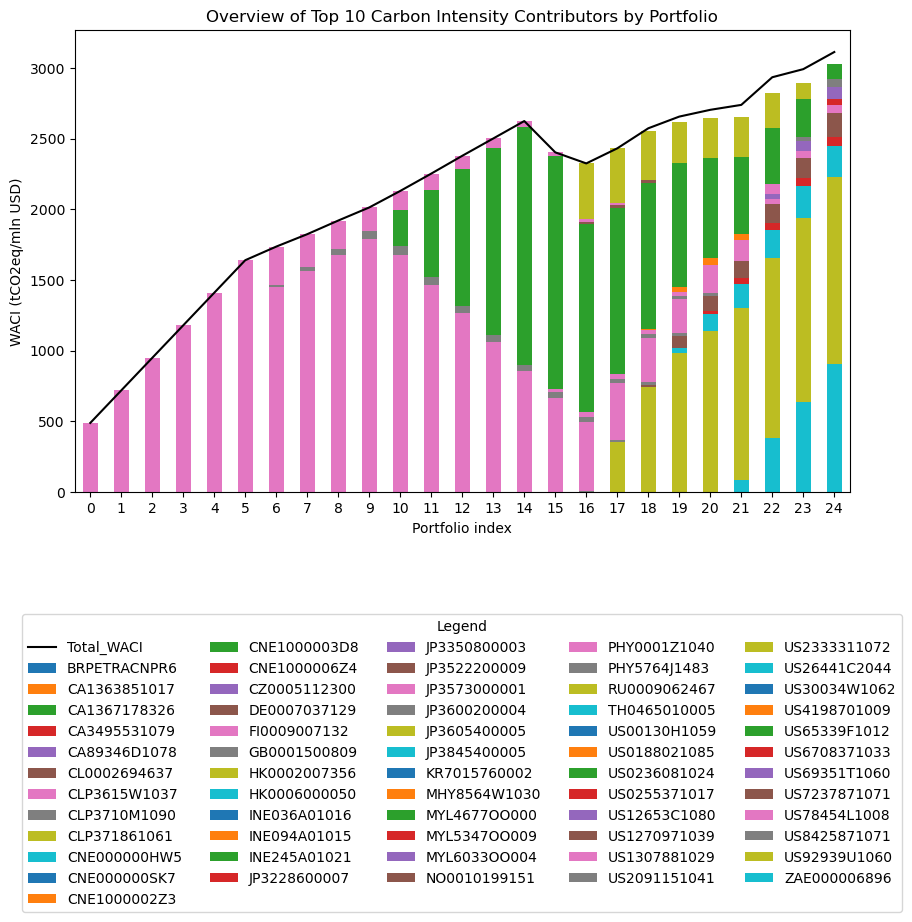

In [116]:
# Sort the carbon intensity contributions and select the top 10 contributors
top_10_contributors = result_df.apply(lambda row: row.nlargest(10), axis=1)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
top_10_contributors.plot(kind='bar', stacked=True, ax=plt.gca())

# Add a line plot for results_EF_full['WACI']
results_EF_full['WACI'].plot(kind='line', ax=plt.gca(), color='black', label='Total_WACI')

#Add titles, labels and legend
plt.title('Overview of Top 10 Carbon Intensity Contributors by Portfolio')
plt.xlabel('Portfolio index')
plt.ylabel('WACI (tCO2eq/mln USD)')
#plt.legend(title='Company', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)
plt.legend(title='Legend', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=5)

# Save the graph as an image file
plt.savefig('CI_contributors.png', bbox_inches='tight')#,  pad_inches=0.2)

plt.show()

In [117]:
# Sort ci_s123_mean by CI_average in descending order and select the top 10 rows
top_10_waci = waci.sort_values(by='waci', ascending=True).head(10)

# Merge top_10_ci_average with the 'names' dataframe on the index column ISIN
waci_report = top_10_waci.copy()
waci_report = waci_report.rename_axis('Portfolio')
waci_report.rename(columns={'waci': 'WACI (tCO2e/mln $)'}, inplace=True)
waci_report.head(1)

WACI (tCO2e/mln $)
Portfolio                    
0                      488.76

#### Plot WACI and Return vs Volatility

#### Calculate the Market value of the portfolios

In [118]:
# Perform element-wise multiplication between weights_EF_full and mv_annual_mean
mvc_portfolio = weights_EF_full.mul(mvc_annual_mean['MV_average'].values, axis=1)
mvc_sum = mvc_portfolio.sum(axis=1)
mvc_sum

0     0.430000
1     0.411077
2     0.392154
3     0.373231
4     0.354308
5     0.335386
6     0.316272
7     0.297147
8     0.278035
9     0.258916
10    0.242671
11    0.227668
12    0.212486
13    0.197381
14    0.182242
15    0.170074
16    0.160558
17    0.146969
18    0.131914
19    0.116146
20    0.100455
21    0.084957
22    0.069672
23    0.054836
24    0.040097
dtype: float64

In [119]:
# Appending portfolio annualized market value to the results dataframe
results_EF_full['MV_change'] = pd.DataFrame(mvc_portfolio.sum(axis=1), columns=['MV_change'])
results_EF_full.head(2)

Volatility    Return                                   Weight portfolio  \
0    1.041398  0.382832  [7.05175340062011e-16, 0.0, 0.0, 0.0, 0.0, 0.0...   
1    0.967819  0.369805  [1.057313958607864e-15, 0.0, 6.886852199627924...   

     WACI  MV_change  
0  488.76   0.430000  
1  719.01   0.411077

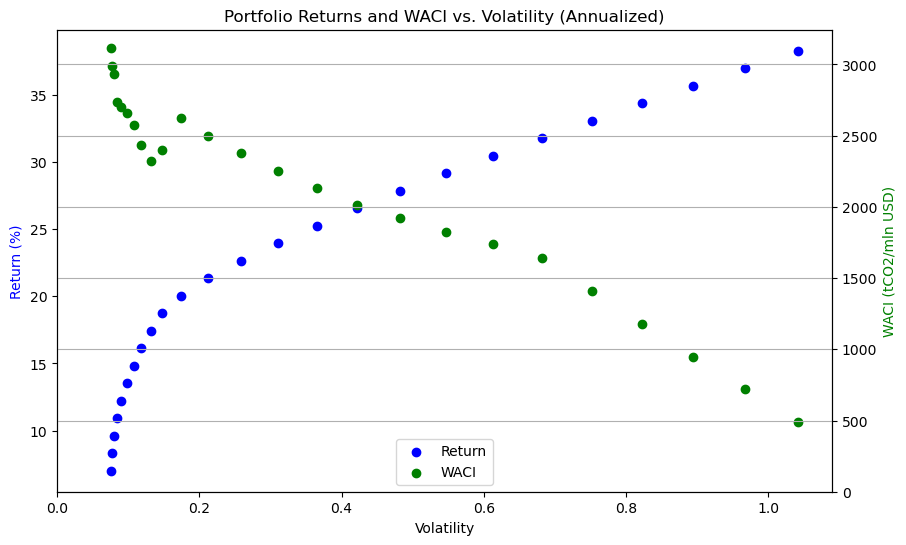

In [120]:
# Plot with colors
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for Return
ax1.scatter(results_EF_full['Volatility'], results_EF_full['Return']*100, color='blue', label='Return')

# Create secondary y-axis for waci
ax2 = ax1.twinx()
ax2.scatter(results_EF_full['Volatility'], results_EF_full['WACI'], color='green', label='WACI')

# Set titles and labels
ax1.set_title('Portfolio Returns and WACI vs. Volatility (Annualized)')
ax1.set_xlabel('Volatility')
ax1.set_ylabel('Return (%)', color='blue')
ax2.set_ylabel('WACI (tCO2/mln USD)', color='green')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower center')

# Show plot
plt.grid(True)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.savefig('ReturnWACI_Volatility.png', bbox_inches='tight')
plt.show()


#### Plot Return and Market Value vs WACI

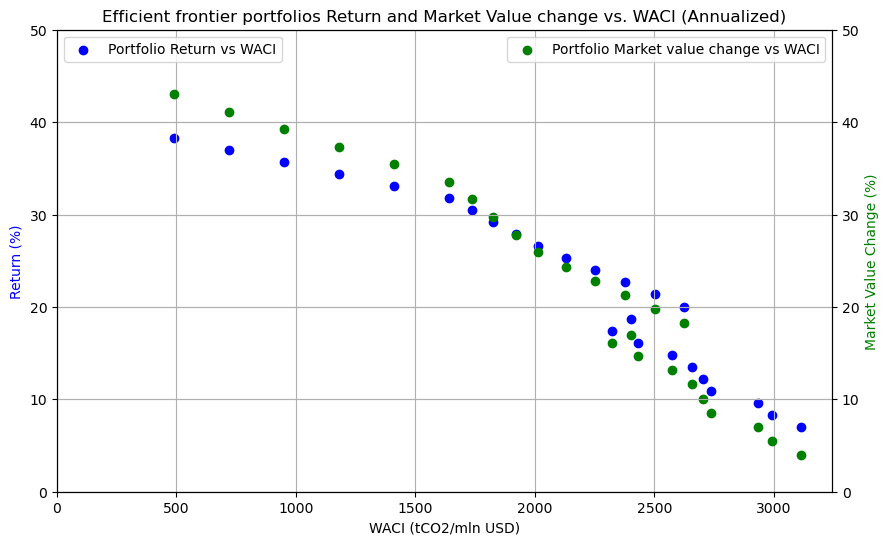

In [121]:
#import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for Return vs WACI
ax1.scatter(results_EF_full['WACI'], results_EF_full['Return']*100, color='blue', label='Portfolio Return vs WACI')

# Set labels for the primary y-axis
ax1.set_xlabel('WACI (tCO2/mln USD)')
ax1.set_ylabel('Return (%)', color='blue')
ax1.grid(True)
ax1.legend(loc='upper left')

# Create a secondary y-axis for MV
ax2 = ax1.twinx()
ax2.scatter(results_EF_full['WACI'], results_EF_full['MV_change']*100, color='green', label='Portfolio Market value change vs WACI')
ax2.set_ylabel('Market Value Change (%)', color='green')
ax2.legend(loc='upper right')

# Set limits for the primary y-axis
ax1.set_xlim(left=0)
ax1.set_ylim(top=50, bottom=-0)
ax2.set_ylim(top=50, bottom=-0)
plt.title('Efficient frontier portfolios Return and Market Value change vs. WACI (Annualized)')
plt.grid(True)
plt.savefig('ReturnMCV_WACI.png', bbox_inches='tight')
# Show plot
plt.show()

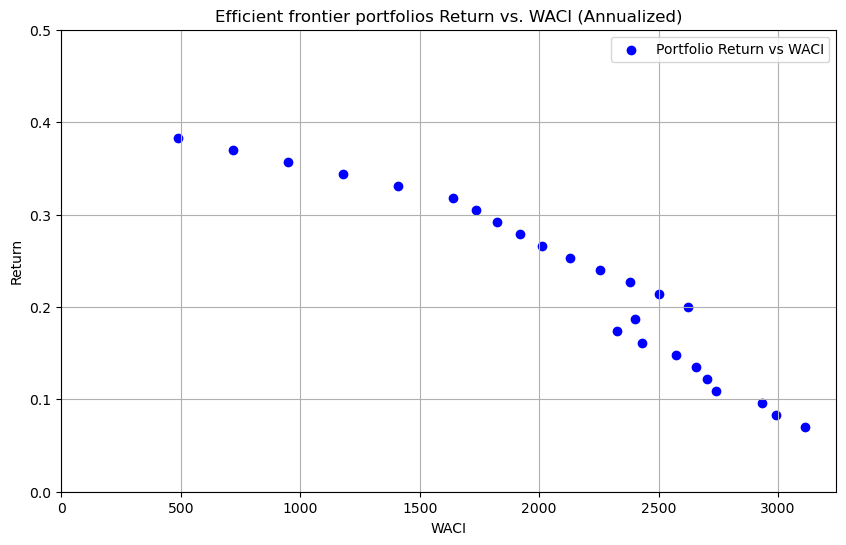

In [122]:
# Plot with colors
plt.figure(figsize=(10, 6))
plt.scatter(waci_results['waci'], results_EF_full['Return'], color='blue', label='Portfolio Return vs WACI')
plt.title('Efficient frontier portfolios Return vs. WACI (Annualized)')
plt.xlabel('WACI')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.xlim(left=0)
plt.ylim(top=0.5, bottom=-0)
plt.show()

#### Carbon footprint

In [123]:
tc_scope1 = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope1.csv') 
tc_scope2 = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope2.csv') 
tc_scope3 = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope3.csv')

In [124]:
#Drop the name column
tc_s1 = tc_scope1.drop(["NAME"], axis=1).copy()
tc_s2 = tc_scope2.drop(["NAME"], axis=1).copy()
tc_s3 = tc_scope3.drop(["NAME"], axis=1).copy()

In [125]:
#Set ISIN as index
tc_s1.set_index('ISIN', inplace =True)
tc_s2.set_index('ISIN', inplace =True)
tc_s3.set_index('ISIN', inplace =True)

In [126]:
# Concatenate the three DataFrames along the columns axis
tc_s123 = pd.concat([tc_s1, tc_s2, tc_s3], axis=1)
tc_s123_sum = tc_s123.T.groupby(tc_s123.columns).sum()
print(tc_s123.shape)

(2051, 69)


In [127]:
# Filter by companies of interest and sample period
tc_s123_filtered = tc_s123_sum.loc[:, sorted_column_returns]
tc_s123_filtered = tc_s123_filtered.loc['2008':'2021']
# Print the resulting DataFrame
print(tc_s123_filtered.shape)

(14, 190)


In [128]:
# Sort the columns of the DataFrame
tc_s123_sorted = tc_s123_filtered[tc_s123_filtered.columns.sort_values()]

# Extract the sorted column names into a list
sorted_column_tc = ci_s123_sorted.columns.tolist()

tc_s123_sorted.head(2)

ISIN  AN8068571086  AT0000746409   AU000000BPT9   AU000000ERA9  AU000000ORG5  \
2008  9.234399e+06  3.475595e+06  200392.866624  293953.539849  4.180271e+06   
2009  7.357000e+06  2.847294e+06  247225.458088  407709.791980  4.098890e+06   

ISIN  AU0000088338  BMG2108M2182  BMG2178K1009   BMG5320C1082  BMG6359F1370  \
2008  7.698641e+06  24446.651371  1.050203e+06  249361.217838  2.604563e+06   
2009  9.595694e+06  50764.486927  8.224335e+05  350438.796722  1.924832e+06   

ISIN  ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
2008  ...  1.623625e+08  8.956863e+05  2.044098e+06  60556.289526   
2009  ...  1.433186e+08  1.112805e+06  2.230036e+06  64807.155139   

ISIN  US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2008  4.883815e+06  6.750797e+07  2.307549e+07  1.856620e+07  6.397679e+07   
2009  4.681797e+06  4.812096e+07  2.065139e+07  1.782690e+07  5.961379e+07   

ISIN  ZAE000006896  
2008  7.866607e+07  
2009  7.921363e+07  

[2 rows x 190 columns]

##### Carbon footprint result

In [129]:
# Calculate carbon foot print per year as annual carbon emissions over market value
carbon_footprint = tc_s123_sorted / mv_annual
carbon_footprint

ISIN  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
2008     94.828087    338.784740    202.080916     91.390273    403.287242   
2009    115.049284    421.976696    361.105052    115.303874    382.549322   
2010    109.069450    686.203681    265.007786    124.503870    438.056240   
2011    109.797600    841.936157    145.314699    338.960303    788.423100   
2012    136.638454   1102.743129    160.267870    396.852416    439.445872   
2013    120.816597   1149.181553     99.870502    385.264728   1380.187920   
2014    111.459331    905.211655     91.745513    337.646276   1447.348542   
2015    100.865343   1165.532803    135.598141    502.605679   2405.631669   
2016     82.327969    877.784381    100.565987   1016.591804   3072.683778   
2017    107.990276    605.662739     60.650744    476.758690   2282.755542   
2018    127.581479    281.553675    228.182223    604.617796   2250.612225   
2019    192.816022    194.484400    215.632839    732.202012   2609.673830   
2020    300.265401    138.095457    297.577649    230.517728   3256.863692   
2021    210.315072     57.537813    316.351775    100.477597   3455.454558   

ISIN  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  \
2008   2722.158437      8.078611    113.983349    121.730075    309.254090   
2009   4088.740283     16.456557     98.126092    100.424996    407.677096   
2010   3258.449674     19.429275    138.792836     81.716294    360.976959   
2011   2755.870643      2.347544    109.412287    162.031073    405.467005   
2012   2700.655846     15.801107    112.142817    128.038150    648.454083   
2013   2192.930645     38.228891    563.742742    162.981091    551.862211   
2014   1646.873412      8.916769    655.103125    221.490146    436.342954   
2015    954.671166      4.092538    277.614777    296.108301    525.840894   
2016   1232.384690     24.109611    198.650659    901.154030    373.722341   
2017   1640.385544     20.297684    470.290380   1007.545306    499.201444   
2018   1555.557829     14.617315    569.282678    707.428319    744.990588   
2019   1588.105256     17.431406    552.739139    781.345108   1470.892602   
2020   1147.804653     34.497622    749.434871   1036.116434   5535.175658   
2021   2132.932192     36.894327    515.839847   1144.056458   2428.447989   

ISIN  ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
2008  ...   5846.946806     72.509906    714.016330     20.886305   
2009  ...   5827.518802     83.403422   1000.840360     35.895607   
2010  ...   5433.307675     91.360308    781.294002     19.740991   
2011  ...   3752.713518     80.367635    579.012870     13.856779   
2012  ...   2690.031542    285.361964    593.752995     11.627885   
2013  ...   2879.773805    261.728811    626.587556     12.021379   
2014  ...   3005.797724    270.102534    894.857194     12.104604   
2015  ...   2652.904798    532.906123   2373.721918     10.344431   
2016  ...   2256.828344    850.693340   6557.369843     10.541008   
2017  ...   2233.536232   1150.540939   2816.284579     10.908660   
2018  ...   2475.099765    717.501015    745.309094     11.144239   
2019  ...   1642.087523    867.713301    836.657110      8.735948   
2020  ...   1317.977788   1076.491329   2394.928588     11.163922   
2021  ...   1341.752190    637.737626   1295.615970      5.941160   

ISIN  US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2008   1757.626232   3293.862687   4388.991428   1083.233301   7433.982955   
2009   1763.591948   4716.345128   4092.738304   1894.673946   6888.294205   
2010   2156.585340   4949.676618   3467.723631   1569.683811   5965.829610   
2011   1457.680139   5199.930076   3557.032800    788.611582   5039.639074   
2012    920.302962   5220.591637   2442.283447    604.990100   4444.660441   
2013    790.504938   3551.784592   2583.287847    445.345114   4003.098633   
2014    753.398227   2602.388920   2469.053915    340.712319   3623.491836  

In [130]:
# Calculating carbon footprint average over sample period
cf_mean = pd.DataFrame(carbon_footprint.mean(axis=0), columns=['CF_average']).round(2)
cf_mean

CF_average
ISIN                    
AN8068571086      137.13
AT0000746409      626.19
AU000000BPT9      191.43
AU000000ERA9      389.55
AU000000ORG5     1758.07
...                  ...
US91913Y1001     3315.63
US92939U1060     2428.41
US9694571004      739.22
US98389B1008     3692.08
ZAE000006896     4296.80

[190 rows x 1 columns]

In [131]:
# Sort ci_s123_mean by CI_average in descending order and select the top 10 rows
top_10_cf_average = cf_mean.sort_values(by='CF_average', ascending=False).head(10)

# Merge top_10_ci_average with the 'names' dataframe on the index column ISIN
cf_report = pd.merge(top_10_cf_average, names, left_index=True, right_index=True)
cf_report_f = cf_report[['NAME','CF_average']]
cf_report_f.rename(columns={'CF_average': 'Average Carbon Footprint (tCO2e/mln $)'}, inplace=True)
# Convert cf_report dataframe to LaTeX format
cf_report_latex = cf_report_f.to_latex()
# Print the LaTeX code
print(cf_report_latex)

\begin{tabular}{llr}
\toprule
{} &                             NAME &  Average Carbon Footprint (tCO2e/mln \$) \\
ISIN         &                                  &                                         \\
\midrule
CNE1000003D8 &  HUADIAN POWER INTERNATIONAL 'H' &                               334054.84 \\
CNE000000HW5 &      GUANGDONG ELEC.PWR.DEV. 'B' &                               176371.48 \\
CNE1000002Z3 &                      DGI.PWG.'H' &                               174463.26 \\
CNE1000006Z4 &  HUANENG POWER INTERNATIONAL 'H' &                               120595.16 \\
KR7015760002 &             KOREA ELECTRIC POWER &                                12372.73 \\
CA89346D1078 &                        TRANSALTA &                                11388.57 \\
JP3585800000 &    TOKYO ELECTRIC POWER CO. HDG. &                                11216.86 \\
JP3850200001 &              HOKKAIDO ELEC.POWER &                                11100.26 \\
JP3845400005 &              HOKURIKU ELE

C:\Users\castr\AppData\Local\Temp\ipykernel_16828\992232860.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  cf_report_latex = cf_report_f.to_latex()


In [132]:
# Multiplying the average carbon footprint times the weights 
cf_weights = weights_EF_full.mul(cf_mean['CF_average'].values, axis=1)
cf_weights.head(2)

AN8068571086 AT0000746409  AU000000BPT9  AU000000ERA9 AU000000ORG5  \
0  9.670069e-14          0.0  0.000000e+00  0.000000e+00          0.0   
1  1.449895e-13          0.0  1.318350e-13  6.858980e-13          0.0   

   AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  ...  \
0  0.000000e+00  7.862131e-15  9.607461e-14  0.000000e+00  1.486652e-12  ...   
1  4.367154e-13  0.000000e+00  0.000000e+00  1.646294e-12  2.478723e-12  ...   

  US8425871071  US8454671095 US88642R1095 US9026531049  US9026811052  \
0          0.0  4.459607e-14          0.0          0.0  1.449639e-13   
1          0.0  0.000000e+00          0.0          0.0  0.000000e+00   

   US91913Y1001  US92939U1060  US9694571004 US98389B1008  ZAE000006896  
0  0.000000e+00  2.985074e-13  4.510250e-13          0.0  1.300906e-12  
1  2.501990e-12  0.000000e+00  1.406729e-12          0.0  0.000000e+00  

[2 rows x 190 columns]

In [133]:
cf_sum = cf_weights.sum(axis=1).round(2)
cf_sum
cf_stat = cf_sum.describe().round(2)
cf_stat

count       25.00
mean      2041.31
std       2628.64
min        376.93
25%       1062.54
50%       1221.48
75%       1300.85
max      11482.45
dtype: float64

In [134]:
cf_stat_latex = cf_stat.to_latex()

print(cf_stat_latex)

\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
count &     25.00 \\
mean  &   2041.31 \\
std   &   2628.64 \\
min   &    376.93 \\
25\%   &   1062.54 \\
50\%   &   1221.48 \\
75\%   &   1300.85 \\
max   &  11482.45 \\
\bottomrule
\end{tabular}



C:\Users\castr\AppData\Local\Temp\ipykernel_16828\2327964024.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  cf_stat_latex = cf_stat.to_latex()


##### Top ten Carbon footprint firms plot

In [135]:
# Flatten MultiIndex columns
cf_weights.columns = [''.join(map(str, col)) for col in cf_weights.columns]

# Convert column names to strings
cf_weights.columns = cf_weights.columns.astype(str)

# Extract column names as legend labels and convert them to strings
legend_labels_cf = cf_weights.columns.tolist()

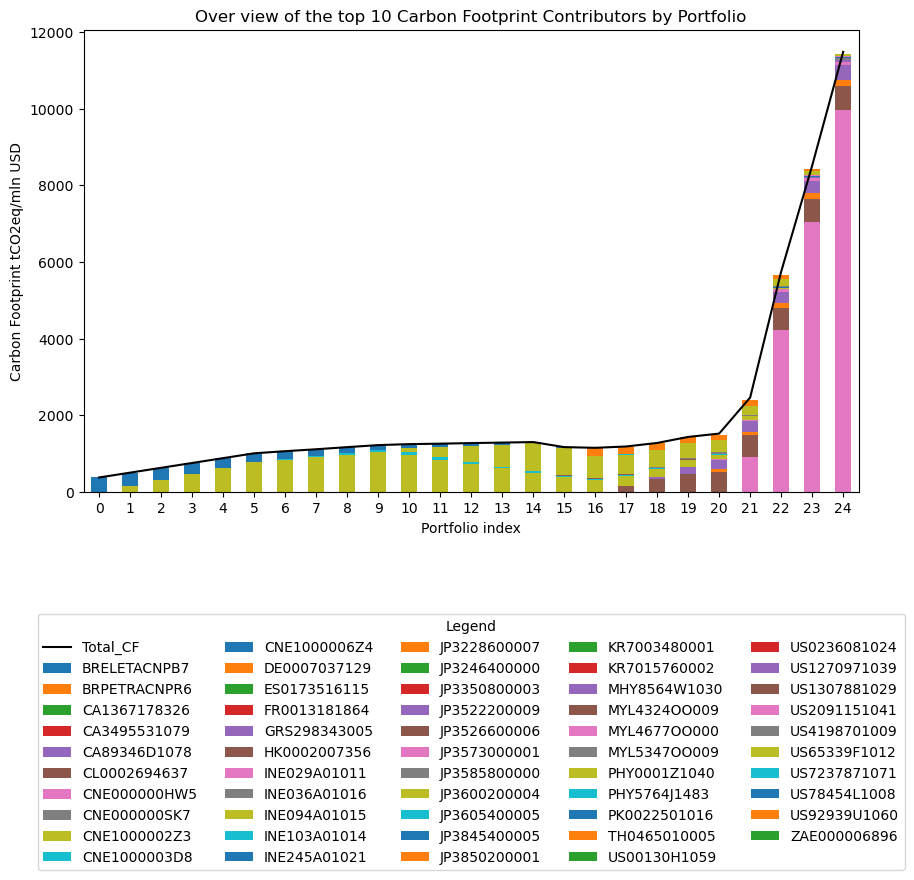

In [136]:

# Sort the carbon intensity contributions and select the top 10 contributors
top_10_cf = cf_weights.iloc[:, :190].apply(lambda row: row.nlargest(10), axis=1)

# Calculate the total CF for each portfolio
contributors_cf = cf_weights.copy()
contributors_cf['Total_CF'] = contributors_cf.iloc[:, :190].sum(axis=1)
# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
top_10_cf.plot(kind='bar', stacked=True, ax=plt.gca())
contributors_cf['Total_CF'].plot(kind='line', stacked=False, ax=plt.gca(), color='black')
plt.title('Over view of the top 10 Carbon Footprint Contributors by Portfolio')
plt.xlabel('Portfolio index')
plt.ylabel('Carbon Footprint tCO2eq/mln USD')
#plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add legends
plt.legend(title='Legend', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=5)

# Save the graph as an image file
plt.savefig('CF_contributors.png', bbox_inches='tight')#,  pad_inches=0.2)

plt.show()


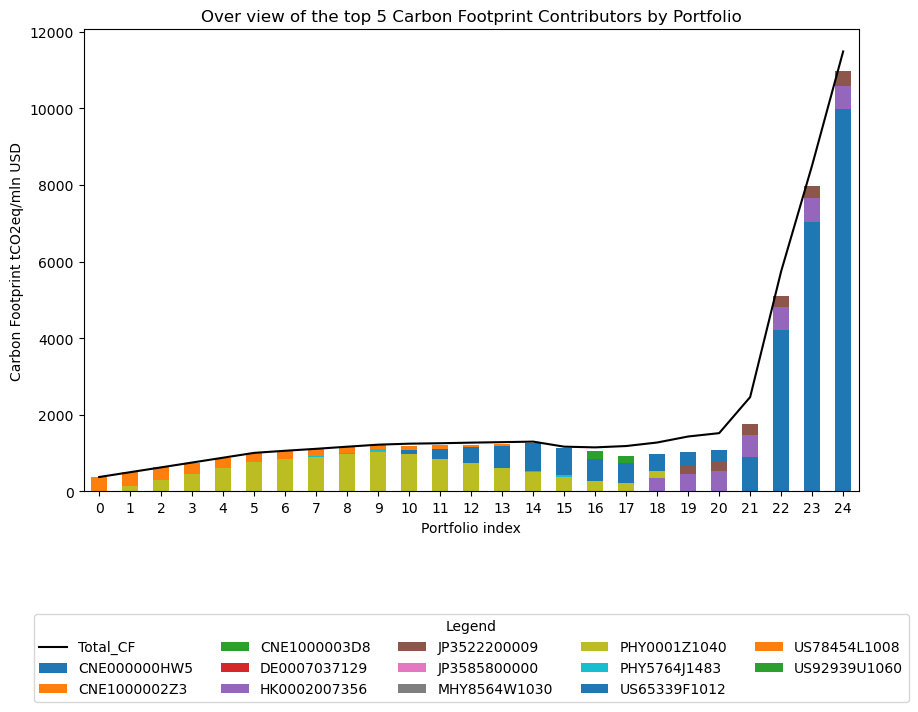

In [137]:
# Sort the carbon intensity contributions and select the top 3 contributors
top_10_cf = cf_weights.iloc[:, :190].apply(lambda row: row.nlargest(3), axis=1)

# Calculate the total CF for each portfolio
contributors_cf = cf_weights.copy()
contributors_cf['Total_CF'] = contributors_cf.iloc[:, :190].sum(axis=1)
# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
top_10_cf.plot(kind='bar', stacked=True, ax=plt.gca())
contributors_cf['Total_CF'].plot(kind='line', stacked=False, ax=plt.gca(), color='black')
plt.title('Over view of the top 5 Carbon Footprint Contributors by Portfolio')
plt.xlabel('Portfolio index')
plt.ylabel('Carbon Footprint tCO2eq/mln USD')
#plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add legends
plt.legend(title='Legend', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=5)

plt.show()


## Exercise 3

### Variables ex3

#### market value 2007-2021 (mv_ex_2)

In [138]:
#Reading and filtering by period the market value data
mv_ex_2 = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
mv_ex_2 = mv_ex_2[(mv_ex_2['Date'] >= '2007-12-01') & (mv_ex_2['Date'] <= '2022-12-31')]
mv_ex_2['Date'] = pd.to_datetime(mv_ex_2['Date'])
print(mv_ex_2.shape)
mv_ex_2.head(1)

(181, 191)


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
95 2007-12-31      117637.4       10571.3        1171.1       3265.83   

    AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  ...  \
95       6803.47       4592.15       4177.58       8427.19       3100.59  ...   

    US8425871071  US8454671095  US88642R1095  US9026531049  US9026811052  \
95       29429.8       9496.63       3009.89       2663.35       2907.14   

    US91913Y1001  US92939U1060  US9694571004  US98389B1008  ZAE000006896  
95      38547.03       5696.29      21236.39       9477.81      31281.12  

[1 rows x 191 columns]

#### market value 2022 (mv_2022)

In [139]:
mv_2022 = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
mv_2022 = mv_ex_2[(mv_2022['Date'] >= '2021-12-31') & (mv_2022['Date'] <= '2022-12-31')]
mv_2022['Date'] = pd.to_datetime(mv_2022['Date'])
print(mv_2022.shape)
mv_2022.head(1)

(13, 191)


C:\Users\castr\AppData\Local\Temp\ipykernel_16828\1415168081.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mv_2022 = mv_ex_2[(mv_2022['Date'] >= '2021-12-31') & (mv_2022['Date'] <= '2022-12-31')]
C:\Users\castr\AppData\Local\Temp\ipykernel_16828\1415168081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_2022['Date'] = pd.to_datetime(mv_2022['Date'])


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
263 2021-12-31      42031.31      19145.95       2089.88        912.49   

     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  \
263       6709.72       5138.79        699.79      16045.89        8118.7   

     ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
263  ...      72681.31        4729.8         442.1      19085.79   

     US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
263       9605.38      30707.64      30619.23      31639.39      36468.33   

     ZAE000006896  
263      10209.11  

[1 rows x 191 columns]

#### creation of returns (returns)

In [140]:
#Just using a simpler name for this dataset:
RI = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/DS_RI_T_USD_M.csv')
sectors = pd.read_csv('https://raw.githubusercontent.com/Timiboylebg/finance/4dca1b79136eed4def2118dd5fd4715d50bd739c/Static_Carbon.csv', sep=';')
RI = pd.merge(RI, sectors, on='ISIN')
RI.head(1)

ISIN          NAME  2000-01-31 00:00:00  2000-02-29 00:00:00  \
0  AN8068571086  SCHLUMBERGER              1858.26              2254.15   

   2000-03-31 00:00:00  2000-04-30 00:00:00  2000-05-31 00:00:00  \
0              2334.75              2336.65              2245.09   

   2000-06-30 00:00:00  2000-07-31 00:00:00  2000-08-31 00:00:00  ...  \
0               2283.7              2262.67              2610.77  ...   

   2022-07-31 00:00:00  2022-08-31 00:00:00  2022-09-30 00:00:00  \
0              3433.33              3537.17              3344.15   

   2022-10-31 00:00:00  2022-11-30 00:00:00  2022-12-31 00:00:00  \
0              4846.68              4801.97              4997.02   

                Company  GICSSectorName        Country  Region  
0  Schlumberger Limited          Energy  UNITED STATES    AMER  

[1 rows x 282 columns]

In [141]:
# Take only Energy and Utilities Sector
RI = RI[RI['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (RI == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(RI.dtypes)

# We will keep ISIN and transpose the dataframe
RI = RI.rename(columns={'ISIN': ''})
RI.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
RI = RI.transpose()
RI.columns = RI.iloc[0]
RI = RI.drop(RI.index[0])
print(RI.shape)
RI.head(1)

Number of zero values in the DataFrame: 0
ISIN                    object
NAME                    object
2000-01-31 00:00:00    float64
2000-02-29 00:00:00    float64
2000-03-31 00:00:00    float64
                        ...   
2022-12-31 00:00:00    float64
Company                 object
GICSSectorName          object
Country                 object
Region                  object
Length: 282, dtype: object
(276, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9  \
2000-01-31 00:00:00      1858.26        524.6         14.4         15.4   

                    AU000000ORG5 AU0000088338 BMG2108M2182 BMG2178K1009  \
2000-01-31 00:00:00      1354.72       243.08        15.94        14.74   

                    BMG5320C1082 BMG6359F1370  ... US8425871071 US8454671095  \
2000-01-31 00:00:00         66.1      1526.85  ...       2678.1      1784.97   

                    US88642R1095 US9026531049 US9026811052 US91913Y1001  \
2000-01-31 00:00:00       432.56      1240.52      1873.77       592.12   

                    US92939U1060 US9694571004 US98389B1008 ZAE000006896  
2000-01-31 00:00:00      2303.25      2379.91       1760.3        576.3  

[1 rows x 190 columns]

In [142]:
#We need to have the returns for each period, we sill use .pct_change()
returns = RI.pct_change()
returns = returns.dropna(axis=0, how ='all') #Remove the first line that has missing values by construction
returns = returns.dropna(axis=1) # Remove the columns that have a missing value
print(returns.shape)
returns

(275, 190)


AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
2000-02-29 00:00:00      0.213043      0.076230     -0.146528     -0.068831   
2000-03-31 00:00:00      0.035756     -0.081528      0.168430     -0.045328   
2000-04-30 00:00:00      0.000814     -0.106429     -0.230501     -0.108108   
2000-05-31 00:00:00     -0.039184      0.074843     -0.193665     -0.039312   
2000-06-30 00:00:00      0.017198      0.000964     -0.139169      0.363171   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.030245     -0.125302     -0.073466      0.042934   
2022-09-30 00:00:00     -0.054569     -0.106440     -0.184632     -0.260720   
2022-10-31 00:00:00      0.449301     -0.085763      0.065999     -0.004640   
2022-11-30 00:00:00     -0.009225      0.131216      0.173619      0.097902   
2022-12-31 00:00:00      0.040619     -0.052602     -0.091739      0.023355   

                     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
2000-02-29 00:00:00     -0.350397     -0.130739     -0.131744     -0.231343   
2000-03-31 00:00:00      0.143188      0.043445      0.000000      0.342454   
2000-04-30 00:00:00     -0.132082     -0.022678     -0.166908     -0.140039   
2000-05-31 00:00:00      0.064650      0.042324     -0.354727      0.084862   
2000-06-30 00:00:00      0.237971      0.267231      0.280914     -0.041579   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.047230      0.017171      0.069614     -0.028321   
2022-09-30 00:00:00     -0.228253     -0.216813     -0.108387     -0.149375   
2022-10-31 00:00:00      0.076060     -0.053864     -0.310621     -0.068626   
2022-11-30 00:00:00      0.483098      0.104944      0.593452      0.059574   
2022-12-31 00:00:00     -0.002207      0.006531      0.120091      0.039554   

                     BMG5320C1082  BMG6359F1370  ...  US8425871071  \
2000-02-29 00:00:00     -0.034342      0.210970  ...     -0.124618   
2000-03-31 00:00:00     -0.165126      0.081883  ...     -0.019720   
2000-04-30 00:00:00     -0.070745      0.016102  ...      0.161322   
2000-05-31 00:00:00     -0.076131      0.090333  ...      0.040103   
2000-06-30 00:00:00      0.081530     -0.033431  ...     -0.101207   
...                           ...           ...  ...           ...   
2022-08-31 00:00:00      0.185281     -0.070060  ...      0.011066   
2022-09-30 00:00:00     -0.172372     -0.234397  ...     -0.117685   
2022-10-31 00:00:00     -0.172840      0.715424  ...     -0.037059   
2022-11-30 00:00:00      0.286589     -0.090213  ...      0.043700   
2022-12-31 00:00:00     -0.071599     -0.021842  ...      0.055736   

                     US8454671095  US88642R1095  US9026531049  US9026811052  \
2000-02-29 00:00:00      0.230771     -0.004392      0.038959     -0.100172   
2000-03-31 00:00:00     -0.053571      0.123624      0.006246      0.153333   
2000-04-30 00:00:00      0.292714     -0.064827      0.020379     -0.054916   
2000-05-31 00:00:00      0.088235      0.306720      0.075000      0.101637   
2000-06-30 00:00:00     -0.324325     -0.070282      0.023254     -0.073447   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.060906      0.006057     -0.072934     -0.084801   
2022-09-30 00:00:00     -0.182910     -0.020736     -0.070426     -0.173858   
2022-10-31 00:00:00      0.132353      0.562158     -0.037229      0.092793   
2022-11-30 00:00:00     -0.001443     -0.103192      0.043008      0.093971   
2022-12-31 00:00:00     -0.154624      0.212092     -0.066072     -0.031989   

                     US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2000-02-29 00:00:00      0.124856     -0.086348      0.072112     -0.087661   
2000-03-31 00:00:00      0.203423      0.127211      0.054242      0.131676   
2000-04-30 00:00:00     -0.054994      0.072097     -0.146517      0.116712   
2000-05-31 00:00:

In [143]:
returns.reset_index(inplace=True)
returns.rename(columns={'index': 'Date'}, inplace=True)
returns['Date'] = pd.to_datetime(returns['Date'])
print(returns.shape)
returns.head(1)

(275, 191)


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
0 2000-02-29      0.213043       0.07623     -0.146528     -0.068831   

   AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  ...  \
0     -0.350397     -0.130739     -0.131744     -0.231343     -0.034342  ...   

   US8425871071  US8454671095  US88642R1095  US9026531049  US9026811052  \
0     -0.124618      0.230771     -0.004392      0.038959     -0.100172   

   US91913Y1001  US92939U1060  US9694571004  US98389B1008  ZAE000006896  
0      0.124856     -0.086348      0.072112     -0.087661     -0.189138  

[1 rows x 191 columns]

#### return 2008-2021 (returns_1)

In [144]:
returns_1 = returns[(returns['Date'] >= '2008-01-31') & (returns['Date'] <= '2021-12-31')]
returns_1.set_index('Date', inplace =True)
returns_1.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31     -0.233506      -0.06725     -0.060014     -0.017656   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31      0.003576     -0.167531     -0.098749      0.012178   

            BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
Date                                    ...                               
2008-01-31     -0.270438     -0.009128  ...     -0.051161       0.00682   

            US88642R1095  US9026531049  US9026811052  US91913Y1001  \
Date                                                                 
2008-01-31     -0.034631      0.169853     -0.023119     -0.156648   

            US92939U1060  US9694571004  US98389B1008  ZAE000006896  
Date                                                                
2008-01-31     -0.065285     -0.106484     -0.080637     -0.045586  

[1 rows x 190 columns]

#### Risk Free asset (rf)

In [145]:
rf = pd.read_excel('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Risk_Free_Rate.xlsx')
rf.head(1)

Unnamed: 0    RF
0      200001  0.41

In [146]:
# Name the Column Date
rf.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' to datetime with the last day of each month
rf['Date'] = pd.to_datetime(rf['Date'], format='%Y%m') + pd.offsets.MonthEnd(1)

# Correct RF because 0.41 is in reality 0.41%
rf['RF'] = rf['RF'] / 100
# Display the first few rows to verify the changes
rf.head()

Date      RF
0 2000-01-31  0.0041
1 2000-02-29  0.0043
2 2000-03-31  0.0047
3 2000-04-30  0.0046
4 2000-05-31  0.0050

In [147]:
rf_1 = rf[(rf['Date'] >= '2008-01-31') & (rf['Date'] <= '2021-12-31')].copy()
rf_1.set_index('Date', inplace =True)
rf_1.head(1)

RF
Date              
2008-01-31  0.0021

#### Carbon emission (carbon_Scope3_intensity)

In [148]:
carbon_Scope3_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope3Intensity.csv')

carbon_Scope3_intensity = pd.merge(carbon_Scope3_intensity, sectors, on='ISIN')
carbon_Scope3_intensity.head(1)

ISIN                  NAME  1999  2000  2001  2002  2003  2004  \
0  AN8068571086  Schlumberger Limited   NaN   NaN   NaN   NaN   NaN   NaN   

         2005        2006  ...     2016        2017        2018     2019  \
0  291.288061  261.553292  ...  248.277  284.127401  265.636878  246.607   

      2020     2021               Company  GICSSectorName        Country  \
0  285.545  298.385  Schlumberger Limited          Energy  UNITED STATES   

   Region  
0    AMER  

[1 rows x 29 columns]

In [149]:
# Take only Energy and Utilities Sector
carbon_Scope3_intensity = carbon_Scope3_intensity[carbon_Scope3_intensity['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (carbon_Scope3_intensity == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(carbon_Scope3_intensity.dtypes)

# We will keep ISIN and transpose the dataframe
carbon_Scope3_intensity = carbon_Scope3_intensity.rename(columns={'ISIN': ''})
carbon_Scope3_intensity.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
carbon_Scope3_intensity = carbon_Scope3_intensity.transpose()
carbon_Scope3_intensity.columns = carbon_Scope3_intensity.iloc[0]
carbon_Scope3_intensity = carbon_Scope3_intensity.drop(carbon_Scope3_intensity.index[0])
print(carbon_Scope3_intensity.shape)
carbon_Scope3_intensity.head(1)

Number of zero values in the DataFrame: 0
ISIN               object
NAME               object
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Company            object
GICSSectorName     object
Country            object
Region             object
dtype: object
(23, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
1999          NaN          NaN          NaN          NaN          NaN   

     AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  ...  \
1999          NaN          NaN          NaN          NaN          NaN  ...   

     US8425871071 US8454671095 US88642R1095 US9026531049 US9026811052  \
1999          NaN          NaN          NaN          NaN          NaN   

     US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  
1999          NaN          NaN          NaN          NaN          NaN  

[1 rows x 190 columns]

In [150]:
carbon_Scope3_intensity.reset_index(inplace=True)
carbon_Scope3_intensity.rename(columns={'index': 'Date'}, inplace=True)
carbon_Scope3_intensity['Date'] = pd.to_datetime(carbon_Scope3_intensity['Date'])
print(carbon_Scope3_intensity.shape)
carbon_Scope3_intensity.head(1)

(23, 191)


Date AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
0 1999-01-01          NaN          NaN          NaN          NaN          NaN   

  AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082  ... US8425871071  \
0          NaN          NaN          NaN          NaN  ...          NaN   

  US8454671095 US88642R1095 US9026531049 US9026811052 US91913Y1001  \
0          NaN          NaN          NaN          NaN          NaN   

  US92939U1060 US9694571004 US98389B1008 ZAE000006896  
0          NaN          NaN          NaN          NaN  

[1 rows x 191 columns]

#### carbon 2007-2021 (Carbon_2007)

In [151]:
Carbon_2007 = carbon_Scope3_intensity[(carbon_Scope3_intensity['Date'] >= '2008-01-31') & (carbon_Scope3_intensity['Date'] <= '2021-12-31')]
Carbon_2007.set_index('Date', inplace =True)
Carbon_2007

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2009-01-01    247.48746    90.343686   111.371012    142.13302   133.866217   
2010-01-01   255.763591   129.489191    105.32215   135.680091   133.256363   
2011-01-01   254.493988    95.104584    102.17484   137.103743   208.770047   
2012-01-01   240.653574    90.360207    98.547311   129.589218   261.311791   
2013-01-01   237.043771    80.038155    97.108757   127.645379   255.477978   
2014-01-01   236.346116    67.789005    98.434403   121.998335   267.856532   
2015-01-01   236.880165    61.736447    97.454469   121.399551   333.285703   
2016-01-01      248.277    68.984175   109.644382   134.749895   383.931313   
2017-01-01   284.127401      70.4078   115.544741   140.902653       410.24   
2018-01-01   265.636878    62.036421   108.311266   137.115957   447.862864   
2019-01-01      246.607       57.449       99.062   125.564695      406.705   
2020-01-01      285.545       53.143      102.149      125.685      383.446   
2021-01-01      298.385       56.433      110.171      130.745      400.884   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2009-01-01   477.799017   128.426122      371.498   190.733838   385.402451   
2010-01-01   411.954425   132.332569    350.36478   193.101365    357.61534   
2011-01-01   344.354515    48.957619   316.024903   190.166125   340.386505   
2012-01-01   386.975986    77.812283   322.883863    207.39729   317.374715   
2013-01-01   381.171346   142.700319   293.646084   218.244737   315.945763   
2014-01-01   372.966635    67.866412   289.102443   216.849567   320.235891   
2015-01-01   361.104135    45.259498   186.669197   215.212898   351.063416   
2016-01-01   531.079185   161.474517   209.853257   317.185539   384.037012   
2017-01-01   579.597638   145.168827      219.861   348.143408   390.331488   
2018-01-01   514.614767        84.82   184.276185   314.092611   368.428514   
2019-01-01   450.952813       30.397   171.614836    278.29733    341.86893   
2020-01-01      398.132       28.605      189.569       305.87       345.87   
2021-01-01      512.559       60.196      191.521      367.516      359.205   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
Date        ...                                                       
2009-01-01  ...   591.447025   163.010375   129.259199    33.197764   
2010-01-01  ...   606.101758    152.31143   122.384091    32.188728   
2011-01-01  ...   569.486331   139.126048    123.66375    31.072726   
2012-01-01  ...   445.316781   142.272453   113.097045    30.830389   
2013-01-01  ...    452.48749   141.157394   111.400589    30.367933   
2014-01-01  ...   452.677317   142.244414    111.45293    30.459494   
2015-01-01  ...   367.611245   144.524581   112.483003    29.677929   
2016-01-01  ...   400.388223   203.089204   120.391175    32.182047   
2017-01-01  ...   385.441639   200.547624    125.86385     33.67746   
2018-01-01  ...   366.344046      238.218   119.054446    32.708122   
2019-01-01  ...   239.967604      180.002   109.714708       30.416   
2020-01-01  ...      231.968      189.234      110.877       30.448   
2021-01-01  ...      276.032      192.309      115.959       31.364   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
Date                                                                          
2009-01-01   301.413677   429.814582     455.3555   183.403703   352.598299   
2010-01-01   290.456484    368.55352   472.528219   151.490064   398.420723   
2011-01-01   230.314005   311.815889   511.654875   212.286022   428.170282   
2012-01-01   236.523194   353.109541   425.675487    164.88767    399.35278   
2013-01-01   233.241299   363.164274   417.110045   162.948164   371.775865   
2014-01-01   229.291

#### All carbon emissions (carbon_AllScopes_intensity)

In [152]:
carbon_Scope1_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope1Intensity.csv')
carbon_Scope2_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope2Intensity.csv')
carbon_Scope3_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope3Intensity.csv')

In [153]:
carbon_Scopes12_intensity = carbon_Scope1_intensity.add(carbon_Scope2_intensity)
carbon_AllScopes_intensity = carbon_Scopes12_intensity.add(carbon_Scope3_intensity)
carbon_AllScopes_intensity.head(1)

ISIN  \
0  AN8068571086AN8068571086AN8068571086   

                                                NAME  1999  2000  2001  2002  \
0  Schlumberger LimitedSchlumberger LimitedSchlum...   NaN   NaN   NaN   NaN   

   2003  2004        2005        2006  ...        2012        2013  \
0   NaN   NaN  442.285565  379.073168  ...  306.074613  286.260868   

         2014        2015     2016        2017       2018     2019     2020  \
0  295.109248  292.850836  314.452  347.169447  328.56542  314.002  350.491   

      2021  
0  369.175  

[1 rows x 25 columns]

In [154]:
carbon_AllScopes_intensity["ISIN"] = carbon_Scope2_intensity["ISIN"]
carbon_AllScopes_intensity["NAME"] = carbon_Scope2_intensity["NAME"]
carbon_AllScopes_intensity = pd.merge(carbon_AllScopes_intensity, sectors, on='ISIN')
carbon_AllScopes_intensity.head(1)

ISIN                  NAME  1999  2000  2001  2002  2003  2004  \
0  AN8068571086  Schlumberger Limited   NaN   NaN   NaN   NaN   NaN   NaN   

         2005        2006  ...     2016        2017       2018     2019  \
0  442.285565  379.073168  ...  314.452  347.169447  328.56542  314.002   

      2020     2021               Company  GICSSectorName        Country  \
0  350.491  369.175  Schlumberger Limited          Energy  UNITED STATES   

   Region  
0    AMER  

[1 rows x 29 columns]

In [155]:
# Take only Energy and Utilities Sector
carbon_AllScopes_intensity = carbon_AllScopes_intensity[carbon_AllScopes_intensity['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (carbon_AllScopes_intensity == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(carbon_AllScopes_intensity.dtypes)

# We will keep ISIN and transpose the dataframe
carbon_AllScopes_intensity = carbon_AllScopes_intensity.rename(columns={'ISIN': ''})
carbon_AllScopes_intensity.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
carbon_AllScopes_intensity = carbon_AllScopes_intensity.transpose()
carbon_AllScopes_intensity.columns = carbon_AllScopes_intensity.iloc[0]
carbon_AllScopes_intensity = carbon_AllScopes_intensity.drop(carbon_AllScopes_intensity.index[0])
print(carbon_AllScopes_intensity.shape)
carbon_AllScopes_intensity.head(1)

Number of zero values in the DataFrame: 0
ISIN               object
NAME               object
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Company            object
GICSSectorName     object
Country            object
Region             object
dtype: object
(23, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
1999          NaN          NaN          NaN          NaN          NaN   

     AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  ...  \
1999          NaN          NaN          NaN          NaN          NaN  ...   

     US8425871071 US8454671095 US88642R1095 US9026531049 US9026811052  \
1999          NaN          NaN          NaN          NaN          NaN   

     US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  
1999          NaN          NaN          NaN          NaN          NaN  

[1 rows x 190 columns]

In [156]:
carbon_AllScopes_intensity.reset_index(inplace=True)
carbon_AllScopes_intensity.rename(columns={'index': 'Date'}, inplace=True)
carbon_AllScopes_intensity['Date'] = pd.to_datetime(carbon_AllScopes_intensity['Date'])
print(carbon_AllScopes_intensity.shape)
carbon_AllScopes_intensity.head(1)

(23, 191)


Date AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
0 1999-01-01          NaN          NaN          NaN          NaN          NaN   

  AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082  ... US8425871071  \
0          NaN          NaN          NaN          NaN  ...          NaN   

  US8454671095 US88642R1095 US9026531049 US9026811052 US91913Y1001  \
0          NaN          NaN          NaN          NaN          NaN   

  US92939U1060 US9694571004 US98389B1008 ZAE000006896  
0          NaN          NaN          NaN          NaN  

[1 rows x 191 columns]

print(carbon_AllScopes_intensity.to_string())

#### All carbon 2007-2021 (AllCarbon_2007)

In [157]:
AllCarbon_2007 = carbon_AllScopes_intensity[(carbon_AllScopes_intensity['Date'] >= '2008-01-01') & (carbon_AllScopes_intensity['Date'] <= '2021-12-31')]
AllCarbon_2007.set_index('Date', inplace =True)
AllCarbon_2007.head(1)

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2008-01-01   339.962406   666.401141   371.056683   847.367245    527.90725   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2008-01-01   468.215942   137.197265  3344.917134   371.056683   472.534896   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
Date        ...                                                       
2008-01-01  ...  9479.907588   387.482655  1609.310914   102.533507   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
Date                                                                          
2008-01-01   734.607104   566.750937  5207.738249  1503.092318  5690.578957   

           ZAE000006896  
Date                     
2008-01-01  4731.819461  

[1 rows x 190 columns]

Are there any nan values left?

In [158]:
AllCarbon_2007.isna().sum().sum()

0

### Exercise

#### Capitalization-weighted portfolio

First, build the capitalization-weighted portfolio:

In [159]:
mv_ex_2

Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
95  2007-12-31     117637.40      10571.30       1171.10       3265.83   
96  2008-01-31      90307.38       9860.39       1098.98       3205.13   
97  2008-02-29     103542.10      11244.90       1206.01       3839.56   
98  2008-03-31     103798.40      10789.72       1026.97       3430.06   
99  2008-04-30     119964.80      11694.93       1015.87       3504.99   
..         ...           ...           ...           ...           ...   
271 2022-08-31      53958.90      16321.45       2674.34        657.95   
272 2022-09-30      50906.19      14584.20       2178.19        486.55   
273 2022-10-31      73778.56      13333.42       2319.53        483.90   
274 2022-11-30      73097.94      15082.96       2719.51        531.51   
275 2022-12-31      75806.25      14289.58       2467.60        544.47   

     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  \
95        6803.47       4592.15       4177.58       8427.19       3100.59   
96        6813.04       3804.57       3765.02       8529.46       2262.04   
97        7248.65       3737.90       3435.60       9010.29       2746.10   
98        7323.07       3206.56       3561.63       9051.15       2222.40   
99       11546.96       3058.32       3621.14       9746.08       2330.94   
..            ...           ...           ...           ...           ...   
271       7452.18       5649.17        561.43      15344.54       7556.85   
272       5726.55       4405.01        500.60      12854.98       6254.26   
273       6136.08       4149.44        345.08      11972.35       5173.30   
274       9068.31       4562.72        549.88      12685.97       6655.90   
275       9019.11       4570.17        615.92      13187.31       6179.36   

     ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
95   ...      29429.80       9496.63       3009.89       2663.35   
96   ...      27808.74       9561.39       2784.95       3063.19   
97   ...      26405.50      11152.50       2952.70       2980.33   
98   ...      27231.38      11520.05       2898.01       3171.93   
99   ...      28470.22      14468.45       3429.66       3270.24   
..   ...           ...           ...           ...           ...   
271  ...      81925.44       8346.16       1024.64      14579.30   
272  ...      74029.75       6753.47       1003.37      13612.15   
273  ...      71286.25       7647.80       1576.54      12943.54   
274  ...      73637.75       7636.76       1535.00      13500.21   
275  ...      77742.06       6455.93       1860.69      12608.23   

     US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
95        2907.14      38547.03       5696.29      21236.39       9477.81   
96        2841.87      31576.54       5324.00      18975.04       8713.54   
97        2734.04      30886.84       5100.66      21072.45       8505.71   
98        2660.38      26256.75       5143.66      19293.98       8561.50   
99        2779.97      25817.36       5549.40      20746.52       8961.82   
..            ...           ...           ...           ...           ...   
271       8270.56      46141.77      32533.92      41466.60      40614.09   
272       6769.29      42095.72      28209.30      34871.37      35007.43   
273       7397.44      48402.43      28808.64      39865.16      35631.34   
274       8105.24      51513.59      31272.18      42264.63      38427.79   
275       7773.90      48907.47      29575.14      40072.22      38367.59   

     ZAE000006896  
95       31281.12  
96       29856.54  
97       32688.79  
98       30184.23  
99       35997.19  
..            ...  
271      12252.88  
272      10008.72  
273      10667.13  
274      11165.19  
275      10044.61  

[181 rows x 191 columns]

In [160]:
# Creating a dataframe with all weights:
capitalization_weights = pd.DataFrame(columns = mv_ex_2.columns)

# Get the capitalization at the end of year Y:
mv_ex_2_Y = mv_ex_2.iloc[0::12,:]

# Loop through each date in the Market Value dataframe, excluding the last value
for i in range(len(mv_ex_2) -1):
    # Get market values at time T
    market_values_T = mv_ex_2.iloc[i, 1:]
    total_market_value_T = market_values_T.sum()
    weights_T = market_values_T / total_market_value_T

    capitalization_weights.loc[mv_ex_2.iloc[i, 0]] = weights_T

In [161]:
capitalization_weights = capitalization_weights.iloc[:169,1:]
capitalization_weights

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
2007-12-31     0.025903     0.002328     0.000258     0.000719     0.001498   
2008-01-31     0.022246     0.002429     0.000271      0.00079     0.001678   
2008-02-29     0.024541     0.002665     0.000286      0.00091     0.001718   
2008-03-31     0.025247     0.002624      0.00025     0.000834     0.001781   
2008-04-30     0.026809     0.002613     0.000227     0.000783      0.00258   
...                 ...          ...          ...          ...          ...   
2021-08-31     0.010871     0.005167     0.000485     0.000191     0.001588   
2021-09-30     0.011335     0.004718     0.000672     0.000251     0.001641   
2021-10-31     0.011629     0.004562     0.000614     0.000292     0.001717   
2021-11-30     0.010891     0.004799     0.000519     0.000262     0.001623   
2021-12-31     0.010753     0.004898     0.000535     0.000233     0.001717   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
2007-12-31     0.001011      0.00092     0.001856     0.000683     0.001707   
2008-01-31     0.000937     0.000927     0.002101     0.000557     0.001893   
2008-02-29     0.000886     0.000814     0.002136     0.000651     0.002098   
2008-03-31      0.00078     0.000866     0.002202     0.000541     0.002305   
2008-04-30     0.000683     0.000809     0.002178     0.000521     0.002362   
...                 ...          ...          ...          ...          ...   
2021-08-31     0.001331     0.000192     0.004465     0.002543     0.000193   
2021-09-30     0.001312     0.000194     0.004038     0.002462     0.000217   
2021-10-31     0.001405     0.000238     0.004107     0.002037     0.000217   
2021-11-30     0.001312     0.000256     0.004156     0.002207     0.000182   
2021-12-31     0.001315     0.000179     0.004105     0.002077     0.000171   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
2007-12-31  ...      0.00648     0.002091     0.000663     0.000586   
2008-01-31  ...      0.00685     0.002355     0.000686     0.000755   
2008-02-29  ...     0.006259     0.002643       0.0007     0.000706   
2008-03-31  ...     0.006624     0.002802     0.000705     0.000772   
2008-04-30  ...     0.006362     0.003233     0.000766     0.000731   
...         ...          ...          ...          ...          ...   
2021-08-31  ...     0.019313     0.000854     0.000131     0.004446   
2021-09-30  ...     0.017906     0.001533     0.000136     0.004453   
2021-10-31  ...     0.016974     0.001273     0.000129     0.004412   
2021-11-30  ...     0.017532     0.001231     0.000117     0.004749   
2021-12-31  ...     0.018594      0.00121     0.000113     0.004883   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
2007-12-31      0.00064     0.008488     0.001254     0.004676     0.002087   
2008-01-31       0.0007     0.007778     0.001311     0.004674     0.002146   
2008-02-29     0.000648     0.007321     0.001209     0.004994     0.002016   
2008-03-31     0.000647     0.006387     0.001251     0.004693     0.002082   
2008-04-30     0.000621     0.005769      0.00124     0.004636     0.002003   
...                 ...          ...          ...          ...          ...   
2021-08-31     0.002685     0.007516     0.008262     0.008316     0.010263   
2021-09-30      0.00243     0.007866     0.007585     0.008593     0.009175   
2021-10-31     0.002333     0.008125     0.007301     0.008771     0.008942   
2021-11-30     0.002337      0.00741     0.007424     0.008813     0.009294   
2021-12-31     0.002457     0.007856     0.007833     0.008094      0.00933   

           ZAE000006896  
2007-12-31     0.006888  
2008-01-31     0.007355  
2008-02-29     0.007748  
2008-03-31     0.007342  
2008-04-30     0.008044  
...                 ...  
2021-08-31     0.002696  
2021-09-30     0.003252  
2021-10-31     0.002729  
2021-11-30      0.00282  
2021-12-31     0.002612  

In [162]:
capitalization_Y = capitalization_weights.iloc[0:-2:12,:]
capitalization_Y

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
2007-12-31     0.025903     0.002328     0.000258     0.000719     0.001498   
2008-12-31     0.017802     0.002403     0.000243     0.000888     0.003456   
2009-12-31     0.022974     0.001892     0.000263     0.001205     0.003905   
2010-12-31     0.031447     0.001758     0.000269     0.000601     0.004171   
2011-12-31     0.026773     0.001338     0.000411      0.00019     0.004338   
2012-12-31     0.026778     0.001225     0.000565     0.000199      0.00384   
2013-12-31     0.031097     0.000961     0.000432     0.000154     0.003659   
2014-12-31     0.030798     0.000891     0.000314     0.000156     0.002987   
2015-12-31     0.029908     0.000749     0.000159     0.000046     0.002042   
2016-12-31     0.033941     0.000792     0.000334     0.000047     0.002433   
2017-12-31     0.024835     0.001096      0.00059     0.000098     0.003446   
2018-12-31      0.01467     0.002131     0.000634     0.000026     0.002356   
2019-12-31     0.014649      0.00225     0.001059     0.000113     0.002753   
2020-12-31     0.009576     0.004584     0.001001     0.000296     0.002038   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
2007-12-31     0.001011      0.00092     0.001856     0.000683     0.001707   
2008-12-31     0.000476     0.000829     0.002981     0.000485     0.001198   
2009-12-31     0.000664     0.000979     0.002525     0.001931     0.001823   
2010-12-31     0.001098      0.00087      0.00285     0.002122     0.001848   
2011-12-31     0.000951     0.000897     0.004001     0.002982     0.001456   
2012-12-31     0.001567     0.000937      0.00445      0.00489     0.001221   
2013-12-31     0.001278     0.001565     0.004159     0.003749     0.001324   
2014-12-31     0.002137     0.001662     0.005106     0.002157     0.001062   
2015-12-31     0.002528     0.002184     0.007967     0.002453     0.000823   
2016-12-31     0.001672     0.000964      0.00613     0.001755     0.001351   
2017-12-31     0.001848     0.000818     0.006057     0.002236     0.000578   
2018-12-31     0.001375     0.000609     0.005903     0.002516      0.00021   
2019-12-31     0.001568     0.000398     0.004965     0.002012     0.000275   
2020-12-31     0.001725     0.000293     0.004486     0.002357     0.000134   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
2007-12-31  ...      0.00648     0.002091     0.000663     0.000586   
2008-12-31  ...     0.010076     0.003497      0.00073      0.00066   
2009-12-31  ...     0.007837     0.004892     0.000729     0.000739   
2010-12-31  ...      0.00885     0.003583     0.000764     0.001182   
2011-12-31  ...     0.011652     0.003249     0.000747     0.001606   
2012-12-31  ...     0.010886     0.003405     0.000648      0.00173   
2013-12-31  ...     0.009636     0.003652     0.000776     0.001546   
2014-12-31  ...     0.012581     0.002725     0.000456     0.002223   
2015-12-31  ...     0.014515     0.000933     0.000112      0.00336   
2016-12-31  ...     0.014008     0.001558     0.000047     0.002833   
2017-12-31  ...      0.01284     0.000761     0.000142     0.002744   
2018-12-31  ...     0.013286     0.000583     0.000204      0.00321   
2019-12-31  ...     0.017583     0.000345     0.000199     0.003621   
2020-12-31  ...     0.020447     0.000632      0.00011     0.003566   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
2007-12-31      0.00064     0.008488     0.001254     0.004676     0.002087   
2008-12-31     0.000926     0.003926     0.001726     0.002946     0.002929   
2009-12-31     0.000774     0.002779     0.001712     0.003613     0.002848   
2010-12-31     0.000963     0.003614     0.001899      0.00399     0.002991   
2011-12-31     0.000991     0.003441     0.002361     0.005684     0.003914   
2012-12-31     0.001072     0.005495     0.002466      0.00642     0.003789   
2013-12-31     0.001

Now calculate the WACI:

In [163]:
WACIs = pd.DataFrame(columns = ["WACI"])
for i in range(len(capitalization_Y)):
  weights = list(capitalization_Y.iloc[i,:])
  carbon_intensity = list(AllCarbon_2007.iloc[i,:])
  WACIs.loc[2008+i] = np.sum(list(a*b for a, b in zip(weights, carbon_intensity)))

Display the results:

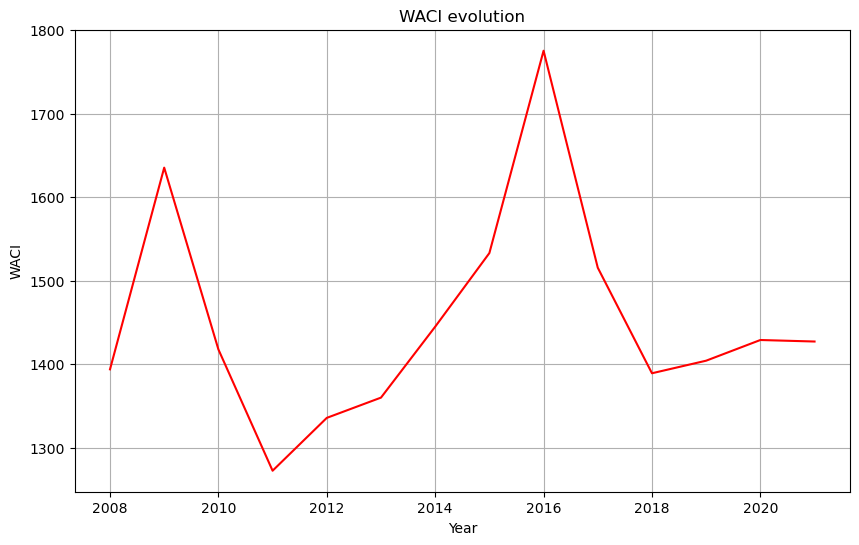

In [164]:
DisplayWACIs = WACIs.reset_index(drop=False).rename(columns = {"index" : "Year"})
plt.figure(figsize=(10, 6))
plt.plot(DisplayWACIs['Year'], DisplayWACIs['WACI'], color='red')
plt.title('WACI evolution')
plt.xlabel('Year')
plt.ylabel('WACI')
plt.grid(True)
plt.show()

#### Reduced WACI portfolio

We are working with the returns here, given by:

In [165]:
returns_ex_3 = returns.iloc[:,1:].copy()
returns_ex_3.iloc[95,:]


AN8068571086   -0.233506
AT0000746409   -0.067250
AU000000BPT9   -0.060014
AU000000ERA9   -0.017656
AU000000ORG5    0.003576
                  ...   
US91913Y1001   -0.156648
US92939U1060   -0.065285
US9694571004   -0.106484
US98389B1008   -0.080637
ZAE000006896   -0.045586
Name: 95, Length: 190, dtype: float64

Functions for expected return and the covariance matrix:

In [166]:
def expected_return(df,num_rows):
  lowerBound = max(0,num_rows-96)
  mu = 1/(num_rows)*df.iloc[lowerBound:num_rows,:].sum(axis = 0)
  return mu.to_frame().transpose()

def covariance_matrix(df,num_rows):
  mu = expected_return(df,num_rows)
  lowerBound = max(0,num_rows-96)
  vector = returns_ex_3.iloc[lowerBound,:] - mu
  cov_matrix = np.dot(vector.T,vector)
  for i in range(num_rows-1-lowerBound):
    vector = returns_ex_3.iloc[i+1+lowerBound,:] - mu
    cov_matrix += np.dot(vector.T,vector)
  cov_matrix /= num_rows

  return cov_matrix

covar_matrix = covariance_matrix(returns_ex_3,95)

Define a function to get WACI from weights:

In [167]:
def getWACI(x,year):
  carbon_intensity = list(AllCarbon_2007.iloc[year-2008,:])
  return np.sum(list(a*b for a, b in zip(x, carbon_intensity)))

Functions to minimize and to find the weights:

In [168]:
def toMinimize(weights):
  weights = np.array(weights) - capitalization_weights.iloc[year-2008,:]
  #covar_matrix = covariance_matrix(df,num_rows)
  var = np.dot(weights.T, np.dot(covar_matrix * 12, weights))
  #print(f"{covar_matrix.iloc[3,3]}")
  return var

def findWeights(df,num_rows,year):
  #define parameters and constraints
  numAssets = len(df.columns)
  originalWACI = WACIs.iloc[year-2008,0]
  cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
   {'type': 'ineq', 'fun': lambda x: 0.5*originalWACI - getWACI(x,year)})
  positivity_bounds = tuple((0, 1) for x in range(numAssets))
  initialWeights = np.array(numAssets*[1/numAssets])
  #covar_matrix = covariance_matrix(df,num_rows)
  #print(f"{covar_matrix.iloc[3,3]}")

  #optimize function
  result_max_return_portfolio = sco.minimize(toMinimize, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)

  results = []
  portfolio_weights = []
  current_return = []
  if result_max_return_portfolio.success:  # Check if the optimizer found a solution
        print("minimization successful")
        #results.append((result_max_return_portfolio.fun, current_return,result_max_return_portfolio.x))  # Append (volatility, return)
        #portfolio_weights.append(result_max_return_portfolio.x)
  else:
    print("no success")
  # Convert results to a DataFrame
  #results_df = pd.DataFrame(results, columns=['Volatility', 'Return','Weight portfolio'])
  #weights_df = pd.DataFrame(portfolio_weights)

  return result_max_return_portfolio.x

Bring everything together:

In [169]:
df_weights = pd.DataFrame(columns=returns_ex_3.columns)
num_rows = 95
year = 2008
while year < 2022:
  print(f"Year {year}:")
  covar_matrix = covariance_matrix(returns_ex_3,num_rows)
  df_weights.loc[year] = findWeights(returns_ex_3,num_rows,year)  # adding a row
  #df_weights.index = df_weights.index + 1  # shifting index
  #df_weights = df_weights.sort_index()
  num_rows += 12
  year += 1

Year 2008:
minimization successful
Year 2009:
minimization successful
Year 2010:
minimization successful
Year 2011:
minimization successful
Year 2012:
minimization successful
Year 2013:
minimization successful
Year 2014:
minimization successful
Year 2015:
minimization successful
Year 2016:
minimization successful
Year 2017:
minimization successful
Year 2018:
minimization successful
Year 2019:
minimization successful
Year 2020:
minimization successful
Year 2021:
minimization successful


In [170]:
df_weights.head()

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
2008      0.025459      0.004622      0.002028      0.001711      0.002694   
2009      0.021674      0.015244      0.005821      0.002779      0.005280   
2010      0.024110      0.014542      0.002446      0.004247      0.002955   
2011      0.024161      0.009232      0.001428      0.004792      0.002464   
2012      0.023393      0.003283      0.006000      0.002568      0.001527   

      AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  \
2008  3.772679e-03  6.742382e-19  1.050321e-19  3.410493e-03      0.000051   
2009  1.626303e-19  4.639492e-03  0.000000e+00  5.028603e-03      0.001436   
2010  1.852517e-03  1.648152e-03  0.000000e+00  2.160942e-03      0.001620   
2011  0.000000e+00  6.020159e-03  0.000000e+00  3.370529e-04      0.007532   
2012  4.609133e-05  2.122667e-03  2.295459e-19  1.533130e-19      0.005203   

      ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
2008  ...  0.000000e+00      0.002521  0.000000e+00  4.506215e-19   
2009  ...  1.558541e-19      0.004717  0.000000e+00  1.242526e-04   
2010  ...  0.000000e+00      0.001204  0.000000e+00  2.118918e-03   
2011  ...  8.131516e-20      0.003615  0.000000e+00  1.364040e-03   
2012  ...  0.000000e+00      0.003484  1.101143e-20  2.524158e-19   

      US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2008      0.000000      0.010889  0.000000e+00  8.095415e-03  0.000000e+00   
2009      0.008111      0.014133  0.000000e+00  5.432657e-03  4.425747e-20   
2010      0.001398      0.013517  0.000000e+00  4.258880e-03  0.000000e+00   
2011      0.007388      0.009126  9.419006e-19  7.589851e-04  7.589415e-19   
2012      0.006781      0.008808  0.000000e+00  4.658681e-20  1.075732e-19   

      ZAE000006896  
2008  1.009148e-03  
2009  2.778268e-19  
2010  6.945670e-20  
2011  8.267042e-19  
2012  0.000000e+00  

[5 rows x 190 columns]

In [171]:
betterWACIs = pd.DataFrame(columns = ["optimized WACI"])
for i in range(len(WACIs)):
  year = 2008 + i
  weights = list(df_weights.iloc[i,:])
  betterWACIs.loc[year] = getWACI(weights,year)
AllWACIs = WACIs.join(betterWACIs)
AllWACIs.head()

WACI  optimized WACI
2008  1393.633088      696.816544
2009  1635.249403      817.624702
2010  1417.523164      708.761582
2011  1272.186426      636.093213
2012  1335.491895      667.745948

Now show the WACI of both portfolios:

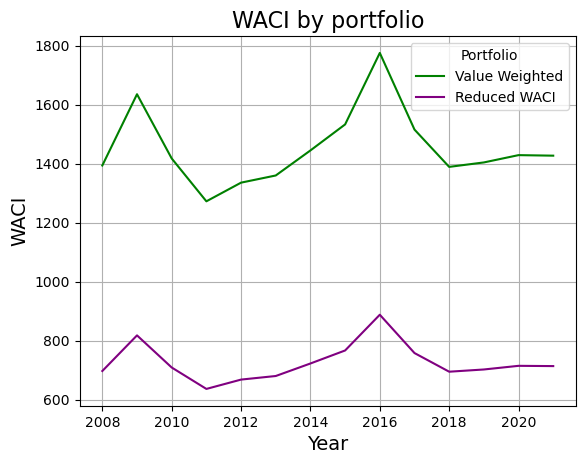

In [172]:
plt.plot(AllWACIs["WACI"], label='Value Weighted', color='green')
plt.plot(AllWACIs["optimized WACI"], label='Reduced WACI', color='purple')

#add legend
plt.legend(title='Portfolio')

#add axes labels and a title
plt.ylabel('WACI', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('WACI by portfolio', fontsize=16)

plt.grid()
plt.show()

In [173]:
# Duplicate the dataframes for later 
combined_ex3_AllWACIs = AllWACIs.copy()

#### Calculate the cumulative return series for both portfolios:

Get the returns of the capitalization weighted portfolio:

In [174]:
capiReturns = pd.DataFrame(returns_1.values*capitalization_weights.iloc[:-1,:].values, columns=capitalization_weights.columns, index=returns_1.index)
capiReturns["Monthly Returns"] = capiReturns.sum(axis = 1)
capiReturns.head()

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2008-01-31    -0.006049    -0.000157    -0.000015    -0.000013     0.000005   
2008-02-29     0.003324     0.000341     0.000027     0.000157     0.000111   
2008-03-31     0.000156    -0.000108    -0.000042    -0.000096     0.000021   
2008-04-30     0.003932     0.000276    -0.000003     0.000019     0.001025   
2008-05-31     0.000155     0.000234      0.00009     0.000221     0.000343   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2008-01-31    -0.000169    -0.000091     0.000023    -0.000185    -0.000016   
2008-02-29    -0.000012    -0.000081     0.000118     0.000119     0.000306   
2008-03-31    -0.000122     0.000031      0.00001    -0.000124     0.000149   
2008-04-30    -0.000032     0.000014     0.000169     0.000026     0.000257   
2008-05-31     0.000181     0.000073    -0.000088     0.000066     0.000283   

            ... US8454671095 US88642R1095 US9026531049 US9026811052  \
Date        ...                                                       
2008-01-31  ...     0.000014    -0.000023       0.0001    -0.000015   
2008-02-29  ...     0.000383     0.000043    -0.000016    -0.000027   
2008-03-31  ...     0.000087    -0.000013     0.000069    -0.000013   
2008-04-30  ...     0.000717     0.000129     0.000035     0.000028   
2008-05-31  ...     0.000155     0.000037    -0.000016     0.000023   

           US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  \
Date                                                                          
2008-01-31     -0.00133    -0.000082    -0.000498    -0.000168    -0.000314   
2008-02-29    -0.000154    -0.000048     0.000592    -0.000096     0.000697   
2008-03-31    -0.001097      0.00001    -0.000408     0.000037      -0.0006   
2008-04-30    -0.000034     0.000099     0.000359     0.000089     0.001485   
2008-05-31     0.000254     0.000022     0.000332     0.000049     0.000701   

           Monthly Returns  
Date                        
2008-01-31       -0.102852  
2008-02-29        0.042401  
2008-03-31       -0.021998  
2008-04-30        0.089831  
2008-05-31        0.041212  

[5 rows x 191 columns]

Cumulative returns:

In [175]:
capiReturnsList = list(capiReturns.loc[:,"Monthly Returns"])
preparationCapi = [1+a for a in capiReturnsList]

cumulatedCapi = list()
cumulatedCapi.append(preparationCapi[0])
for i in range(len(preparationCapi) - 1):
  cumulatedCapi.append(cumulatedCapi[i]*preparationCapi[i+1])

Get the returns of the optimized portfolio:

In [176]:
# Create a dataframe that contains the weights of the optimized
# portfolio, but twelve times the same row:
df_weights12 = pd.DataFrame(columns = df_weights.columns)

for i in range(len(df_weights.iloc[:,1])):
  for j in range(12):
    df_weights12.loc[12*i+j] = df_weights.iloc[i,:]

# Now, calculate the return:
optimizedReturns = pd.DataFrame(returns_1.values*df_weights12.values, columns=returns_1.columns, index=returns_1.index)
optimizedReturns["Monthly Returns"] = optimizedReturns.sum(axis = 1)
optimizedReturns.head()

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31     -0.005945     -0.000311     -0.000122     -0.000030   
2008-02-29      0.003804      0.000649      0.000201      0.000340   
2008-03-31      0.000162     -0.000187     -0.000300     -0.000181   
2008-04-30      0.003965      0.000485     -0.000023      0.000039   
2008-05-31      0.000147      0.000414      0.000807      0.000483   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31      0.000010     -0.000632 -6.658026e-20  1.279044e-21   
2008-02-29      0.000178     -0.000049 -5.901191e-20  5.921837e-21   
2008-03-31      0.000033     -0.000518  2.535823e-20  4.691027e-22   
2008-04-30      0.001550     -0.000156  1.124367e-20  8.056040e-21   
2008-05-31      0.000358      0.000999  6.047111e-20 -4.250731e-21   

            BMG5320C1082  BMG6359F1370  ...  US8454671095  US88642R1095  \
Date                                    ...                               
2008-01-31     -0.000922 -4.664074e-07  ...      0.000017          -0.0   
2008-02-29      0.000730  8.265354e-06  ...      0.000410           0.0   
2008-03-31     -0.000650  3.630310e-06  ...      0.000083          -0.0   
2008-04-30      0.000167  5.704465e-06  ...      0.000645           0.0   
2008-05-31      0.000429  6.125297e-06  ...      0.000121           0.0   

            US9026531049  US9026811052  US91913Y1001  US92939U1060  \
Date                                                                 
2008-01-31  7.653963e-20          -0.0     -0.001706          -0.0   
2008-02-29 -9.474114e-21          -0.0     -0.000216          -0.0   
2008-03-31  4.375069e-20          -0.0     -0.001632           0.0   
2008-04-30  2.030014e-20           0.0     -0.000058           0.0   
2008-05-31 -9.625428e-21           0.0      0.000479           0.0   

            US9694571004  US98389B1008  ZAE000006896  Monthly Returns  
Date                                                                   
2008-01-31     -0.000862          -0.0     -0.000046        -0.103971  
2008-02-29      0.001026          -0.0      0.000096         0.052932  
2008-03-31     -0.000662           0.0     -0.000078        -0.027714  
2008-04-30      0.000619           0.0      0.000204         0.091075  
2008-05-31      0.000579           0.0      0.000088         0.033780  

[5 rows x 191 columns]

Cumulative returns:

In [177]:
optimizedReturnsList = list(optimizedReturns.loc[:,"Monthly Returns"])
preparationOpti = [1+a for a in optimizedReturnsList]

cumulatedOpti = list()
cumulatedOpti.append(preparationOpti[0])
for i in range(len(preparationOpti) - 1):
  cumulatedOpti.append(cumulatedOpti[i]*preparationOpti[i+1])

Create a dataframe with both cumulated returns:

In [178]:
optimizedReturns["Optimized"] = cumulatedOpti
capiReturns["Capitalization Weighted"] = cumulatedCapi

cumulatedReturns = capiReturns.iloc[:,-1].to_frame().join(optimizedReturns.iloc[:,-1])
cumulatedReturns.head(1)

Capitalization Weighted  Optimized
Date                                          
2008-01-31                 0.897148   0.896029

Finally, plot both series:

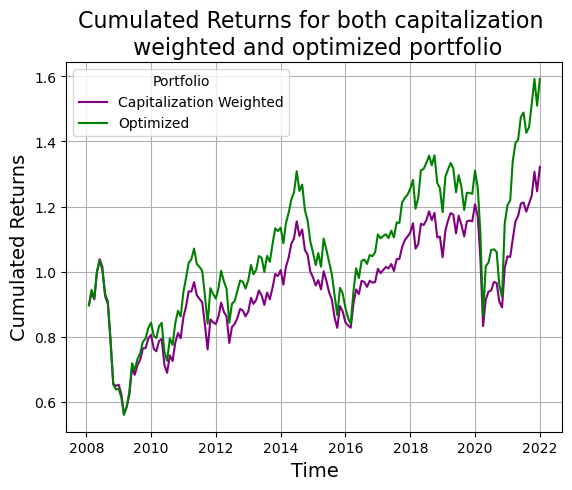

In [179]:
plt.plot(cumulatedReturns["Capitalization Weighted"], label='Capitalization Weighted', color='purple')
plt.plot(cumulatedReturns["Optimized"], label='Optimized', color='green')

#add legend
plt.legend(title='Portfolio')

#add axes labels and a title
plt.ylabel('Cumulated Returns', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Cumulated Returns for both capitalization \n weighted and optimized portfolio', fontsize=16)

plt.grid()
plt.show()

In [180]:
# Make copies of the DataFrames
combined_ex3_2 = cumulatedReturns.copy()

#### Calculate the annual average return:

In [181]:
annualizedAverage = 12*sum(capiReturnsList)/len(capiReturnsList)
print(f"The annualized average return for the capitalization weighted portfolio is {annualizedAverage*100} %.")
annualizedAverage = 12*sum(optimizedReturnsList)/len(optimizedReturnsList)
print(f"The annualized average return for the optimized portfolio is {annualizedAverage*100} %.")

The annualized average return for the capitalization weighted portfolio is 3.5268720417044257 %.
The annualized average return for the optimized portfolio is 5.407435318578906 %.


In [182]:
mini = min(capiReturnsList)
maxi = max(capiReturnsList)
print(f"For the capitalization weighted portfolio, the minimal return is {mini*100} %")
print(f"For the capitalization weighted portfolio, maximal return is {maxi*100} %")

mini = min(optimizedReturnsList)
maxi = max(optimizedReturnsList)
print(f"For the optimized portfolio, the minimal return is {mini*100} %")
print(f"For the optimized portfolio, maximal return is {maxi*100} %")

For the capitalization weighted portfolio, the minimal return is -20.105143773532518 %
For the capitalization weighted portfolio, maximal return is 13.662680953105047 %
For the optimized portfolio, the minimal return is -22.971103600470904 %
For the optimized portfolio, maximal return is 24.577066795827168 %


#### Calculate the volatility:

In [183]:
volatilityCapi = capiReturns["Monthly Returns"].std()*np.sqrt(12)
print(f"The annualized volatility of the capitalization weighted portfolio is {volatilityCapi}.")

volatilityOpti = optimizedReturns["Monthly Returns"].std()*np.sqrt(12)
print(f"The annualized volatility of the optimized portfolio is {volatilityOpti}.")

The annualized volatility of the capitalization weighted portfolio is 0.17370863563799918.
The annualized volatility of the optimized portfolio is 0.20404645837951776.


#### Sharp ratio:

Risk free portfolio:

In [184]:
rf_annualized = 0.016417993079584776

Annualized average returns:

In [185]:
capi_annualized = 12*capiReturns["Monthly Returns"].mean()
print(f"The annualized average return of the capitalization weighted portfolio is {100* capi_annualized} %")
opti_annualized = 12*optimizedReturns["Monthly Returns"].mean()
print(f"The annualized average return of the optimized portfolio is {opti_annualized*100} %")

The annualized average return of the capitalization weighted portfolio is 3.5268720417044257 %
The annualized average return of the optimized portfolio is 5.407435318578906 %


Sharp ratios:

In [186]:
sharpeCapi = (capi_annualized - rf_annualized) / volatilityCapi
print(f"The Sharpe Ratio of the capitalization weighted portfolio is {sharpeCapi}.")
sharpeOpti = (opti_annualized - rf_annualized) / volatilityOpti
print(f"The Sharpe Ratio of the optimized portfolio is {sharpeOpti}.")

The Sharpe Ratio of the capitalization weighted portfolio is 0.10851922973330774.
The Sharpe Ratio of the optimized portfolio is 0.18454797209057677.


#### Comparison with last week:

The returns from last week:

In [187]:
# @title
LWreturns = [-0.09382394859463705,
 0.06945243338577767,
 0.21138204013772377,
 -0.03438205754655691,
 0.12071954503031754,
 -0.159952640616727,
 -0.3197753522696072,
 -0.01197378274728223,
 -0.6031575433446963,
 -1.2334931158729607,
 0.2890875445863054,
 0.37609398682830575,
 -0.18431348891629235,
 -0.608659343825649,
 -0.17678371018498587,
 0.00047168504045881935,
 0.396026504151446,
 0.2582902029914004,
 0.4617614562708027,
 0.11019235679239736,
 0.18175349613635897,
 -0.15511154904472724,
 0.44199253739995004,
 -0.0519821370959338,
 -0.011886115942870935,
 0.26033751469188315,
 0.4342912936623262,
 0.15739014461797765,
 -0.26894853215040293,
 0.32273166530957315,
 0.4232645854785373,
 0.44615696744758127,
 0.1373560688437373,
 0.28636622693250835,
 0.6103811338308082,
 1.0365884818329127,
 -0.02238396247226852,
 0.37246985576747776,
 -0.10011062473078505,
 0.08592062726256355,
 -0.28935597976728933,
 0.8653861492482033,
 0.38305210612910756,
 -0.09025410789853236,
 -0.12621414314083448,
 -0.1843324272378653,
 0.0306894461182992,
 0.37382334601648654,
 -0.00030109561560499783,
 0.20678351331490352,
 0.05393995888536658,
 -0.006702747256004577,
 -0.33084899521008526,
 0.4610311930801867,
 -0.11368234279650369,
 -0.055115363896175676,
 0.29915845859597556,
 -0.1978444579816651,
 0.37866922314388807,
 -0.021127032275024122,
 -0.1557149930300191,
 0.3296937846429025,
 0.7207359891084465,
 0.6158896097481374,
 -0.31213505013298604,
 -0.021650260354793026,
 0.32795477852803234,
 -0.700080473339443,
 0.3633600163942458,
 0.2176113026300478,
 -0.21933332649718965,
 0.07335563854900315,
 -0.35936616680011957,
 0.5454685856080136,
 0.11825140736601636,
 0.07665451549953207,
 0.1195122045691998,
 0.2313249722760996,
 -0.17281048287480272,
 0.35751065287954215,
 -0.4353118071452281,
 0.6507335702666787,
 -0.04960156294890135,
 -0.1714314624977494,
 0.605858357847278,
 -0.26755312682120846,
 -0.3270105984398707,
 0.37163412517416955,
 -0.08233017028787888,
 -0.31344063420082935,
 -0.00943165639570861,
 -0.5537068217375084,
 0.20733246976651107,
 0.41247129513927394,
 -0.6847801623490029,
 0.285787707470098,
 0.11708051977124395,
 -0.4172973201051918,
 0.8419786003517764,
 0.1438182245073546,
 -0.14124444162903893,
 0.7671503806526585,
 0.18690160256960603,
 -0.377182765849323,
 0.23595589708515802,
 -0.19025894662681786,
 -0.4533951359864203,
 -0.02340438260301704,
 0.40823906490523176,
 0.5260492797005345,
 0.12432995761655345,
 0.2304546249924816,
 0.6536522174267664,
 -0.21404078716640595,
 0.7478050279365867,
 -0.023039838798211837,
 -0.06856206558465118,
 0.15212170139975664,
 0.34055799524622304,
 0.8248061503776327,
 -0.0538821304464049,
 -0.3494491009309054,
 0.250672544293032,
 0.5296305278925753,
 -0.045251018941923245,
 -0.029803510673636638,
 0.23244861499127775,
 -0.12697892233110267,
 0.09836948963597412,
 -0.38207943299459113,
 0.061209258961147914,
 -0.283277623148869,
 0.5736981042052374,
 0.33551302854113013,
 0.0621417332000118,
 -0.3383336212702455,
 -0.2218992535260922,
 0.15564350724858114,
 0.14237265617272232,
 -0.36644198862389193,
 0.504987799284256,
 0.06288664854686962,
 -0.14084631500711303,
 0.4613954371529815,
 -0.07784870606051233,
 -0.8260796161009516,
 -0.9369967045407464,
 0.5440192116227539,
 0.10147015996617126,
 -0.2774772750976794,
 0.01559209230038065,
 -0.12087420642940631,
 -0.26399223090903573,
 -0.1716518930572571,
 0.7249057287989129,
 0.2911868276434952,
 -0.17038413918926962,
 0.07623990603232672,
 0.8008222088439363,
 -0.2151820525698418,
 -0.16233042666455955,
 -0.23709497244079464,
 0.2983260663540406,
 0.1967259200596756,
 -0.24658809374764856,
 -0.1579791313006842,
 -0.2863758952887855,
 0.6177777251417371]

Put it all together:

In [188]:
capiReturns = capiReturns.rename(columns = {"Monthly Returns" : "CW"})
optimizedReturns = optimizedReturns.rename(columns = {"Monthly Returns" : "P(0.5)"})

AllReturns = capiReturns.iloc[:,-2].to_frame().join(optimizedReturns.iloc[:,-2])
LWreturns = [a/12 for a in LWreturns]
AllReturns["Out of sample"] = LWreturns
AllReturns.head()

CW    P(0.5)  Out of sample
Date                                         
2008-01-31 -0.102852 -0.103971      -0.007819
2008-02-29  0.042401  0.052932       0.005788
2008-03-31 -0.021998 -0.027714       0.017615
2008-04-30  0.089831  0.091075      -0.002865
2008-05-31  0.041212  0.033780       0.010060

Finally, draw a boxplot:

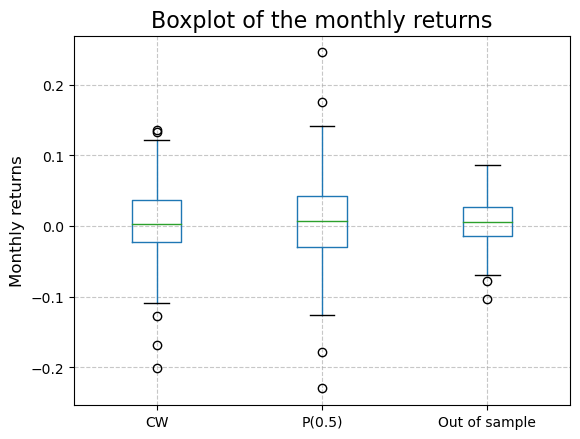

In [189]:
AllReturns.boxplot(column = ["CW", "P(0.5)", "Out of sample"])
plt.title('Boxplot of the monthly returns', fontsize = 16)
plt.ylabel('Monthly returns', fontsize = 12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Exercise 3 extension

We are working with the returns here, given by:

In [190]:
returns_ex_3 = returns.iloc[:,1:].copy()
returns_ex_3.iloc[95,:]


AN8068571086   -0.233506
AT0000746409   -0.067250
AU000000BPT9   -0.060014
AU000000ERA9   -0.017656
AU000000ORG5    0.003576
                  ...   
US91913Y1001   -0.156648
US92939U1060   -0.065285
US9694571004   -0.106484
US98389B1008   -0.080637
ZAE000006896   -0.045586
Name: 95, Length: 190, dtype: float64

Functions for expected return and the covariance matrix:

In [191]:
def expected_return(df,num_rows):
  lowerBound = max(0,num_rows-96)
  mu = 1/(num_rows)*df.iloc[lowerBound:num_rows,:].sum(axis = 0)
  return mu.to_frame().transpose()

def covariance_matrix(df,num_rows):
  mu = expected_return(df,num_rows)
  lowerBound = max(0,num_rows-96)
  vector = returns_ex_3.iloc[lowerBound,:] - mu
  cov_matrix = np.dot(vector.T,vector)
  for i in range(num_rows-1-lowerBound):
    vector = returns_ex_3.iloc[i+1+lowerBound,:] - mu
    cov_matrix += np.dot(vector.T,vector)
  cov_matrix /= num_rows

  return cov_matrix

covar_matrix = covariance_matrix(returns_ex_3,95)

Define a function to get WACI from weights:

In [192]:
def getWACI(x,year):
  carbon_intensity = list(AllCarbon_2007.iloc[year-2008,:])
  return np.sum(list(a*b for a, b in zip(x, carbon_intensity)))

Functions to minimize and to find the weights:

In [193]:
def toMinimize(weights):
  weights = np.array(weights) - capitalization_weights.iloc[year-2008,:]
  #covar_matrix = covariance_matrix(df,num_rows)
  var = np.dot(weights.T, np.dot(covar_matrix * 12, weights))
  #print(f"{covar_matrix.iloc[3,3]}")
  return var

def findWeights(df,num_rows,year,factor):
  #define parameters and constraints
  numAssets = len(df.columns)
  originalWACI = WACIs.iloc[year-2008,0]
  cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
   {'type': 'ineq', 'fun': lambda x: factor*originalWACI - getWACI(x,year)})
  positivity_bounds = tuple((0, 1) for x in range(numAssets))
  initialWeights = np.array(numAssets*[1/numAssets])
  #covar_matrix = covariance_matrix(df,num_rows)
  #print(f"{covar_matrix.iloc[3,3]}")

  #optimize function
  result_max_return_portfolio = sco.minimize(toMinimize, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)

  results = []
  portfolio_weights = []
  current_return = []
  if result_max_return_portfolio.success:  # Check if the optimizer found a solution
        print("minimization successful")
        #results.append((result_max_return_portfolio.fun, current_return,result_max_return_portfolio.x))  # Append (volatility, return)
        #portfolio_weights.append(result_max_return_portfolio.x)
  else:
    print("no success")
  # Convert results to a DataFrame
  #results_df = pd.DataFrame(results, columns=['Volatility', 'Return','Weight portfolio'])
  #weights_df = pd.DataFrame(portfolio_weights)

  return result_max_return_portfolio.x

Bring everything together:

In [194]:
df_weights1st = pd.DataFrame(columns=returns_ex_3.columns)
df_weights2nd = pd.DataFrame(columns=returns_ex_3.columns)
df_weights3rd = pd.DataFrame(columns=returns_ex_3.columns)
num_rows = 95
year = 2008
factor = 0.25
for i in range(3):

  while year < 2022:
    print(f"Year {year}:")
    covar_matrix = covariance_matrix(returns_ex_3,num_rows)
    if i == 0:
      df_weights1st.loc[year] = findWeights(returns_ex_3,num_rows,year,factor)  # adding a row
    elif i == 1:
      df_weights2nd.loc[year] = findWeights(returns_ex_3,num_rows,year,factor)  # adding a row
    elif i == 2:
      df_weights3rd.loc[year] = findWeights(returns_ex_3,num_rows,year,factor)  # adding a row
    #df_weights.index = df_weights.index + 1  # shifting index
    #df_weights = df_weights.sort_index()
    num_rows += 12
    year += 1
  year = 2008
  num_rows = 95
  factor += 0.25

Year 2008:
minimization successful
Year 2009:
minimization successful
Year 2010:
minimization successful
Year 2011:
minimization successful
Year 2012:
minimization successful
Year 2013:
minimization successful
Year 2014:
minimization successful
Year 2015:
minimization successful
Year 2016:
minimization successful
Year 2017:
minimization successful
Year 2018:
minimization successful
Year 2019:
minimization successful
Year 2020:
minimization successful
Year 2021:
minimization successful
Year 2008:
minimization successful
Year 2009:
minimization successful
Year 2010:
minimization successful
Year 2011:
minimization successful
Year 2012:
minimization successful
Year 2013:
minimization successful
Year 2014:
minimization successful
Year 2015:
minimization successful
Year 2016:
minimization successful
Year 2017:
minimization successful
Year 2018:
minimization successful
Year 2019:
minimization successful
Year 2020:
minimization successful
Year 2021:
minimization successful
Year 2008:
minimizat

In [195]:
df_weights3rd.head()

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
2008      0.023699      0.006905      0.001817      0.002339      0.000444   
2009      0.024915      0.014923      0.002408      0.001468      0.006851   
2010      0.026333      0.013880      0.000858      0.002435      0.004260   
2011      0.027008      0.012311      0.003137      0.001687      0.002941   
2012      0.023874      0.005212      0.004435      0.001712      0.002376   

      AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  \
2008  3.058576e-03      0.001468  0.000000e+00      0.003220  1.626303e-19   
2009  4.968295e-04      0.004592  8.131516e-20      0.004984  1.082850e-04   
2010  9.067205e-04      0.001598  0.000000e+00      0.002582  1.689341e-03   
2011  4.575566e-19      0.003163  1.067623e-06      0.001874  3.734894e-03   
2012  2.481781e-04      0.001951  2.755189e-04      0.000665  4.231878e-03   

      ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
2008  ...  0.000000e+00      0.002033      0.000835  1.084202e-19   
2009  ...  1.351133e-05      0.004644      0.000700  5.211645e-05   
2010  ...  1.451605e-05      0.002913      0.001267  8.438181e-04   
2011  ...  5.982170e-21      0.003667      0.004746  0.000000e+00   
2012  ...  3.564899e-05      0.005704      0.003905  0.000000e+00   

      US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2008  1.626303e-19      0.014079  1.355253e-20      0.007044  1.880980e-04   
2009  4.267758e-03      0.010091  0.000000e+00      0.004377  0.000000e+00   
2010  1.355253e-19      0.011740  2.033400e-04      0.004182  0.000000e+00   
2011  3.441443e-03      0.008212  5.399835e-21      0.003498  0.000000e+00   
2012  9.691080e-04      0.008437  0.000000e+00      0.001042  5.188077e-21   

      ZAE000006896  
2008      0.015790  
2009      0.008073  
2010      0.006374  
2011      0.003732  
2012      0.002586  

[5 rows x 190 columns]

In [196]:
betterWACIs1st = pd.DataFrame(columns = ["optimized WACI 0.25"])
betterWACIs2nd = pd.DataFrame(columns = ["optimized WACI 0.5"])
betterWACIs3rd = pd.DataFrame(columns = ["optimized WACI 0.75"])
for i in range(len(WACIs)):
  year = 2008 + i
  weights1st = list(df_weights1st.iloc[i,:])
  weights2nd = list(df_weights2nd.iloc[i,:])
  weights3rd = list(df_weights3rd.iloc[i,:])
  betterWACIs1st.loc[year] = getWACI(weights1st,year)
  betterWACIs2nd.loc[year] = getWACI(weights2nd,year)
  betterWACIs3rd.loc[year] = getWACI(weights3rd,year)
AllWACIs = WACIs.join(betterWACIs1st)
AllWACIs = AllWACIs.join(betterWACIs2nd)
AllWACIs = AllWACIs.join(betterWACIs3rd)
AllWACIs.head()

WACI  optimized WACI 0.25  optimized WACI 0.5  \
2008  1393.633088           348.408272          696.816544   
2009  1635.249403           408.812351          817.624702   
2010  1417.523164           354.380791          708.761582   
2011  1272.186426           318.046606          636.093213   
2012  1335.491895           333.872974          667.745948   

      optimized WACI 0.75  
2008          1045.224816  
2009          1226.437053  
2010          1063.142373  
2011           954.139819  
2012          1001.618922

Now show the WACI of both portfolios:

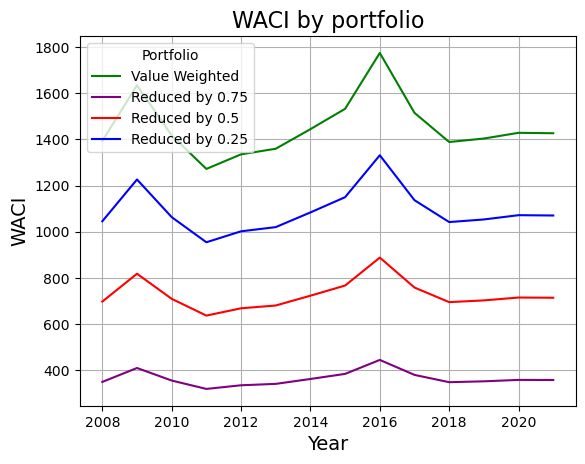

In [197]:
plt.plot(AllWACIs["WACI"], label='Value Weighted', color='green')
plt.plot(AllWACIs["optimized WACI 0.25"], label='Reduced by 0.75', color='purple')
plt.plot(AllWACIs["optimized WACI 0.5"], label='Reduced by 0.5', color='red')
plt.plot(AllWACIs["optimized WACI 0.75"], label='Reduced by 0.25', color='blue')

#add legend
plt.legend(title='Portfolio')

#add axes labels and a title
plt.ylabel('WACI', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('WACI by portfolio', fontsize=16)

plt.grid()
plt.show()

### Calculate the cumulative return series for both portfolios:

Get the returns of the capitalization weighted portfolio:

In [198]:
capiReturns = pd.DataFrame(returns_1.values*capitalization_weights.iloc[:-1,:].values, columns=capitalization_weights.columns, index=returns_1.index)
capiReturns["Monthly Returns"] = capiReturns.sum(axis = 1)
capiReturns.head()

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2008-01-31    -0.006049    -0.000157    -0.000015    -0.000013     0.000005   
2008-02-29     0.003324     0.000341     0.000027     0.000157     0.000111   
2008-03-31     0.000156    -0.000108    -0.000042    -0.000096     0.000021   
2008-04-30     0.003932     0.000276    -0.000003     0.000019     0.001025   
2008-05-31     0.000155     0.000234      0.00009     0.000221     0.000343   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2008-01-31    -0.000169    -0.000091     0.000023    -0.000185    -0.000016   
2008-02-29    -0.000012    -0.000081     0.000118     0.000119     0.000306   
2008-03-31    -0.000122     0.000031      0.00001    -0.000124     0.000149   
2008-04-30    -0.000032     0.000014     0.000169     0.000026     0.000257   
2008-05-31     0.000181     0.000073    -0.000088     0.000066     0.000283   

            ... US8454671095 US88642R1095 US9026531049 US9026811052  \
Date        ...                                                       
2008-01-31  ...     0.000014    -0.000023       0.0001    -0.000015   
2008-02-29  ...     0.000383     0.000043    -0.000016    -0.000027   
2008-03-31  ...     0.000087    -0.000013     0.000069    -0.000013   
2008-04-30  ...     0.000717     0.000129     0.000035     0.000028   
2008-05-31  ...     0.000155     0.000037    -0.000016     0.000023   

           US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  \
Date                                                                          
2008-01-31     -0.00133    -0.000082    -0.000498    -0.000168    -0.000314   
2008-02-29    -0.000154    -0.000048     0.000592    -0.000096     0.000697   
2008-03-31    -0.001097      0.00001    -0.000408     0.000037      -0.0006   
2008-04-30    -0.000034     0.000099     0.000359     0.000089     0.001485   
2008-05-31     0.000254     0.000022     0.000332     0.000049     0.000701   

           Monthly Returns  
Date                        
2008-01-31       -0.102852  
2008-02-29        0.042401  
2008-03-31       -0.021998  
2008-04-30        0.089831  
2008-05-31        0.041212  

[5 rows x 191 columns]

Cumulative returns:

In [199]:
capiReturnsList = list(capiReturns.loc[:,"Monthly Returns"])
preparationCapi = [1+a for a in capiReturnsList]

cumulatedCapi = list()
cumulatedCapi.append(preparationCapi[0])
for i in range(len(preparationCapi) - 1):
  cumulatedCapi.append(cumulatedCapi[i]*preparationCapi[i+1])

Get the returns of the optimized portfolio:

In [200]:
# Create a dataframe that contains the weights of the optimized
# portfolio, but twelve times the same row:
df_weights12_1st = pd.DataFrame(columns = df_weights1st.columns)
df_weights12_2nd = pd.DataFrame(columns = df_weights2nd.columns)
df_weights12_3rd = pd.DataFrame(columns = df_weights3rd.columns)

for i in range(len(df_weights1st.iloc[:,1])):
  for j in range(12):
    df_weights12_1st.loc[12*i+j] = df_weights1st.iloc[i,:]

for i in range(len(df_weights2nd.iloc[:,1])):
  for j in range(12):
    df_weights12_2nd.loc[12*i+j] = df_weights2nd.iloc[i,:]

for i in range(len(df_weights2nd.iloc[:,1])):
  for j in range(12):
    df_weights12_3rd.loc[12*i+j] = df_weights3rd.iloc[i,:]

# Now, calculate the return:
optimizedReturns1st = pd.DataFrame(returns_1.values*df_weights12_1st.values, columns=returns_1.columns, index=returns_1.index)
optimizedReturns1st["Monthly Returns"] = optimizedReturns1st.sum(axis = 1)
optimizedReturns2nd = pd.DataFrame(returns_1.values*df_weights12_2nd.values, columns=returns_1.columns, index=returns_1.index)
optimizedReturns2nd["Monthly Returns"] = optimizedReturns2nd.sum(axis = 1)
optimizedReturns3rd = pd.DataFrame(returns_1.values*df_weights12_3rd.values, columns=returns_1.columns, index=returns_1.index)
optimizedReturns3rd["Monthly Returns"] = optimizedReturns3rd.sum(axis = 1)

Cumulative returns:

In [201]:
optimizedReturnsList1st = list(optimizedReturns1st.loc[:,"Monthly Returns"])
preparationOpti1st = [1+a for a in optimizedReturnsList1st]

cumulatedOpti1st = list()
cumulatedOpti1st.append(preparationOpti1st[0])
for i in range(len(preparationOpti1st) - 1):
  cumulatedOpti1st.append(cumulatedOpti1st[i]*preparationOpti1st[i+1])

optimizedReturnsList2nd = list(optimizedReturns2nd.loc[:,"Monthly Returns"])
preparationOpti2nd = [1+a for a in optimizedReturnsList2nd]

cumulatedOpti2nd = list()
cumulatedOpti2nd.append(preparationOpti2nd[0])
for i in range(len(preparationOpti2nd) - 1):
  cumulatedOpti2nd.append(cumulatedOpti2nd[i]*preparationOpti2nd[i+1])

optimizedReturnsList3rd = list(optimizedReturns3rd.loc[:,"Monthly Returns"])
preparationOpti3rd = [1+a for a in optimizedReturnsList3rd]

cumulatedOpti3rd = list()
cumulatedOpti3rd.append(preparationOpti3rd[0])
for i in range(len(preparationOpti3rd) - 1):
  cumulatedOpti3rd.append(cumulatedOpti3rd[i]*preparationOpti3rd[i+1])

In [202]:
cumulatedOpti2nd

[0.8960286192689828,
 0.943457393223883,
 0.9173099836025315,
 1.000854094153218,
 1.034662741287138,
 1.0033326273606367,
 0.9311778124329756,
 0.909085252842024,
 0.7945281039145666,
 0.6529185881764988,
 0.6377604530205292,
 0.6397567070144266,
 0.611799225547249,
 0.5593232364673482,
 0.5837480003054238,
 0.6295877480199378,
 0.7183879207054988,
 0.6972387648997594,
 0.7310255930351578,
 0.7488091184900955,
 0.7841536994309558,
 0.7941575541234134,
 0.8261515056471098,
 0.8430972081672579,
 0.8018547363574865,
 0.7958830003563641,
 0.8315120603831114,
 0.8425058400911799,
 0.7521572719264563,
 0.7252609444175137,
 0.7944919350668612,
 0.7745880714934201,
 0.8410459298717716,
 0.8793479413949156,
 0.8620615408020519,
 0.9377333423188109,
 0.9828183813305879,
 1.0262929348922671,
 1.0384521564424036,
 1.0707453462014276,
 1.023303403180318,
 1.0143778480479833,
 1.0025183710878751,
 0.9248122430130203,
 0.8397430208711211,
 0.9490181516874311,
 0.9314653229410135,
 0.9169426029955935

In [203]:
optimizedReturns1st.columns

Index(['AN8068571086', 'AT0000746409', 'AU000000BPT9', 'AU000000ERA9',
       'AU000000ORG5', 'AU0000088338', 'BMG2108M2182', 'BMG2178K1009',
       'BMG5320C1082', 'BMG6359F1370',
       ...
       'US8454671095', 'US88642R1095', 'US9026531049', 'US9026811052',
       'US91913Y1001', 'US92939U1060', 'US9694571004', 'US98389B1008',
       'ZAE000006896', 'Monthly Returns'],
      dtype='object', name='', length=191)

In [204]:
optimizedReturns1st["Reduced by 0.75"] = cumulatedOpti1st
optimizedReturns1st["Reduced by 0.5"] = cumulatedOpti2nd
optimizedReturns1st["Reduced by 0.25"] = cumulatedOpti3rd
optimizedReturns1st["Reduced by end"] = cumulatedOpti3rd
capiReturns["Capitalization Weighted"] = cumulatedCapi

cumulatedReturns = capiReturns.iloc[:,-1].to_frame().join(optimizedReturns1st.iloc[:,-4:-1])
cumulatedReturns.head(1)

Capitalization Weighted  Reduced by 0.75  Reduced by 0.5  \
Date                                                                   
2008-01-31                 0.897148         0.894392        0.896029   

            Reduced by 0.25  
Date                         
2008-01-31         0.899265

Finally, plot both series:

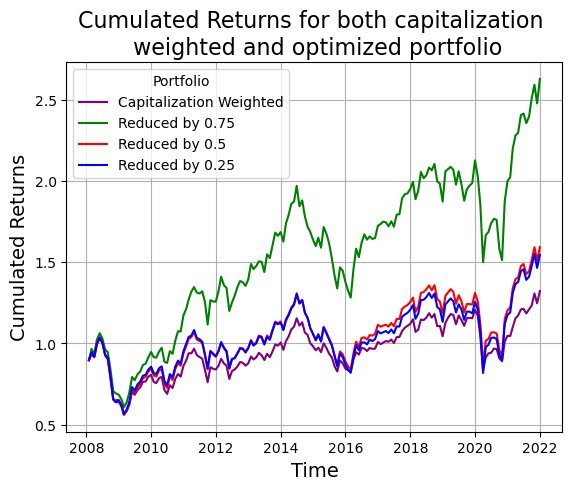

In [205]:
plt.plot(cumulatedReturns["Capitalization Weighted"], label='Capitalization Weighted', color='purple')
plt.plot(cumulatedReturns["Reduced by 0.75"], label='Reduced by 0.75', color='green')
plt.plot(cumulatedReturns["Reduced by 0.5"], label='Reduced by 0.5', color='red')
plt.plot(cumulatedReturns["Reduced by 0.25"], label='Reduced by 0.25', color='blue')

#add legend
plt.legend(title='Portfolio')

#add axes labels and a title
plt.ylabel('Cumulated Returns', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Cumulated Returns for both capitalization \n weighted and optimized portfolio', fontsize=16)

plt.grid()
plt.show()

### Calculate the annual average return:

In [206]:
annualizedAverage = 12*sum(capiReturnsList)/len(capiReturnsList)
print(f"The annualized average return for the capitalization weighted portfolio is {annualizedAverage*100} %.")
annualizedAverage = 12*sum(optimizedReturnsList)/len(optimizedReturnsList)
print(f"The annualized average return for the optimized portfolio is {annualizedAverage*100} %.")

The annualized average return for the capitalization weighted portfolio is 3.5268720417044257 %.
The annualized average return for the optimized portfolio is 5.407435318578906 %.


In [207]:
mini = min(capiReturnsList)
maxi = max(capiReturnsList)
print(f"For the capitalization weighted portfolio, the minimal return is {mini*100} %")
print(f"For the capitalization weighted portfolio, maximal return is {maxi*100} %")

mini = min(optimizedReturnsList)
maxi = max(optimizedReturnsList)
print(f"For the optimized portfolio, the minimal return is {mini*100} %")
print(f"For the optimized portfolio, maximal return is {maxi*100} %")

For the capitalization weighted portfolio, the minimal return is -20.105143773532518 %
For the capitalization weighted portfolio, maximal return is 13.662680953105047 %
For the optimized portfolio, the minimal return is -22.971103600470904 %
For the optimized portfolio, maximal return is 24.577066795827168 %


## Exercice 4

### Variables Ex4

#### market value 2007-2021

In [209]:
#Reading and filtering by period the market value data
mv_ex_2 = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
mv_ex_2 = mv_ex_2[(mv_ex_2['Date'] >= '2007-12-01') & (mv_ex_2['Date'] <= '2022-12-31')]
mv_ex_2['Date'] = pd.to_datetime(mv_ex_2['Date'])
print(mv_ex_2.shape)
mv_ex_2.head(1)

(181, 191)


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
95 2007-12-31      117637.4       10571.3        1171.1       3265.83   

    AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  ...  \
95       6803.47       4592.15       4177.58       8427.19       3100.59  ...   

    US8425871071  US8454671095  US88642R1095  US9026531049  US9026811052  \
95       29429.8       9496.63       3009.89       2663.35       2907.14   

    US91913Y1001  US92939U1060  US9694571004  US98389B1008  ZAE000006896  
95      38547.03       5696.29      21236.39       9477.81      31281.12  

[1 rows x 191 columns]

#### market value 2022 (mv_2022)

In [210]:
mv_2022 = pd.read_csv('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Market_value.csv')
mv_2022 = mv_ex_2[(mv_2022['Date'] >= '2021-12-31') & (mv_2022['Date'] <= '2022-12-31')]
mv_2022['Date'] = pd.to_datetime(mv_2022['Date'])
print(mv_2022.shape)
mv_2022.head(1)

(13, 191)


C:\Users\castr\AppData\Local\Temp\ipykernel_16828\1415168081.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mv_2022 = mv_ex_2[(mv_2022['Date'] >= '2021-12-31') & (mv_2022['Date'] <= '2022-12-31')]
C:\Users\castr\AppData\Local\Temp\ipykernel_16828\1415168081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_2022['Date'] = pd.to_datetime(mv_2022['Date'])


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
263 2021-12-31      42031.31      19145.95       2089.88        912.49   

     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  \
263       6709.72       5138.79        699.79      16045.89        8118.7   

     ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
263  ...      72681.31        4729.8         442.1      19085.79   

     US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
263       9605.38      30707.64      30619.23      31639.39      36468.33   

     ZAE000006896  
263      10209.11  

[1 rows x 191 columns]

#### creation of returns (returns)

In [211]:
#Just using a simpler name for this dataset:
RI = pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/DS_RI_T_USD_M.csv')
sectors = pd.read_csv('https://raw.githubusercontent.com/Timiboylebg/finance/4dca1b79136eed4def2118dd5fd4715d50bd739c/Static_Carbon.csv', sep=';')
RI = pd.merge(RI, sectors, on='ISIN')
RI.head(1)

ISIN          NAME  2000-01-31 00:00:00  2000-02-29 00:00:00  \
0  AN8068571086  SCHLUMBERGER              1858.26              2254.15   

   2000-03-31 00:00:00  2000-04-30 00:00:00  2000-05-31 00:00:00  \
0              2334.75              2336.65              2245.09   

   2000-06-30 00:00:00  2000-07-31 00:00:00  2000-08-31 00:00:00  ...  \
0               2283.7              2262.67              2610.77  ...   

   2022-07-31 00:00:00  2022-08-31 00:00:00  2022-09-30 00:00:00  \
0              3433.33              3537.17              3344.15   

   2022-10-31 00:00:00  2022-11-30 00:00:00  2022-12-31 00:00:00  \
0              4846.68              4801.97              4997.02   

                Company  GICSSectorName        Country  Region  
0  Schlumberger Limited          Energy  UNITED STATES    AMER  

[1 rows x 282 columns]

In [212]:
# Take only Energy and Utilities Sector
RI = RI[RI['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (RI == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(RI.dtypes)

# We will keep ISIN and transpose the dataframe
RI = RI.rename(columns={'ISIN': ''})
RI.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
RI = RI.transpose()
RI.columns = RI.iloc[0]
RI = RI.drop(RI.index[0])
print(RI.shape)
RI.head(1)

Number of zero values in the DataFrame: 0
ISIN                    object
NAME                    object
2000-01-31 00:00:00    float64
2000-02-29 00:00:00    float64
2000-03-31 00:00:00    float64
                        ...   
2022-12-31 00:00:00    float64
Company                 object
GICSSectorName          object
Country                 object
Region                  object
Length: 282, dtype: object
(276, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9  \
2000-01-31 00:00:00      1858.26        524.6         14.4         15.4   

                    AU000000ORG5 AU0000088338 BMG2108M2182 BMG2178K1009  \
2000-01-31 00:00:00      1354.72       243.08        15.94        14.74   

                    BMG5320C1082 BMG6359F1370  ... US8425871071 US8454671095  \
2000-01-31 00:00:00         66.1      1526.85  ...       2678.1      1784.97   

                    US88642R1095 US9026531049 US9026811052 US91913Y1001  \
2000-01-31 00:00:00       432.56      1240.52      1873.77       592.12   

                    US92939U1060 US9694571004 US98389B1008 ZAE000006896  
2000-01-31 00:00:00      2303.25      2379.91       1760.3        576.3  

[1 rows x 190 columns]

In [213]:
#We need to have the returns for each period, we sill use .pct_change()
returns = RI.pct_change()
returns = returns.dropna(axis=0, how ='all') #Remove the first line that has missing values by construction
returns = returns.dropna(axis=1) # Remove the columns that have a missing value
print(returns.shape)
returns

(275, 190)


AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
2000-02-29 00:00:00      0.213043      0.076230     -0.146528     -0.068831   
2000-03-31 00:00:00      0.035756     -0.081528      0.168430     -0.045328   
2000-04-30 00:00:00      0.000814     -0.106429     -0.230501     -0.108108   
2000-05-31 00:00:00     -0.039184      0.074843     -0.193665     -0.039312   
2000-06-30 00:00:00      0.017198      0.000964     -0.139169      0.363171   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.030245     -0.125302     -0.073466      0.042934   
2022-09-30 00:00:00     -0.054569     -0.106440     -0.184632     -0.260720   
2022-10-31 00:00:00      0.449301     -0.085763      0.065999     -0.004640   
2022-11-30 00:00:00     -0.009225      0.131216      0.173619      0.097902   
2022-12-31 00:00:00      0.040619     -0.052602     -0.091739      0.023355   

                     AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
2000-02-29 00:00:00     -0.350397     -0.130739     -0.131744     -0.231343   
2000-03-31 00:00:00      0.143188      0.043445      0.000000      0.342454   
2000-04-30 00:00:00     -0.132082     -0.022678     -0.166908     -0.140039   
2000-05-31 00:00:00      0.064650      0.042324     -0.354727      0.084862   
2000-06-30 00:00:00      0.237971      0.267231      0.280914     -0.041579   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.047230      0.017171      0.069614     -0.028321   
2022-09-30 00:00:00     -0.228253     -0.216813     -0.108387     -0.149375   
2022-10-31 00:00:00      0.076060     -0.053864     -0.310621     -0.068626   
2022-11-30 00:00:00      0.483098      0.104944      0.593452      0.059574   
2022-12-31 00:00:00     -0.002207      0.006531      0.120091      0.039554   

                     BMG5320C1082  BMG6359F1370  ...  US8425871071  \
2000-02-29 00:00:00     -0.034342      0.210970  ...     -0.124618   
2000-03-31 00:00:00     -0.165126      0.081883  ...     -0.019720   
2000-04-30 00:00:00     -0.070745      0.016102  ...      0.161322   
2000-05-31 00:00:00     -0.076131      0.090333  ...      0.040103   
2000-06-30 00:00:00      0.081530     -0.033431  ...     -0.101207   
...                           ...           ...  ...           ...   
2022-08-31 00:00:00      0.185281     -0.070060  ...      0.011066   
2022-09-30 00:00:00     -0.172372     -0.234397  ...     -0.117685   
2022-10-31 00:00:00     -0.172840      0.715424  ...     -0.037059   
2022-11-30 00:00:00      0.286589     -0.090213  ...      0.043700   
2022-12-31 00:00:00     -0.071599     -0.021842  ...      0.055736   

                     US8454671095  US88642R1095  US9026531049  US9026811052  \
2000-02-29 00:00:00      0.230771     -0.004392      0.038959     -0.100172   
2000-03-31 00:00:00     -0.053571      0.123624      0.006246      0.153333   
2000-04-30 00:00:00      0.292714     -0.064827      0.020379     -0.054916   
2000-05-31 00:00:00      0.088235      0.306720      0.075000      0.101637   
2000-06-30 00:00:00     -0.324325     -0.070282      0.023254     -0.073447   
...                           ...           ...           ...           ...   
2022-08-31 00:00:00      0.060906      0.006057     -0.072934     -0.084801   
2022-09-30 00:00:00     -0.182910     -0.020736     -0.070426     -0.173858   
2022-10-31 00:00:00      0.132353      0.562158     -0.037229      0.092793   
2022-11-30 00:00:00     -0.001443     -0.103192      0.043008      0.093971   
2022-12-31 00:00:00     -0.154624      0.212092     -0.066072     -0.031989   

                     US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2000-02-29 00:00:00      0.124856     -0.086348      0.072112     -0.087661   
2000-03-31 00:00:00      0.203423      0.127211      0.054242      0.131676   
2000-04-30 00:00:00     -0.054994      0.072097     -0.146517      0.116712   
2000-05-31 00:00:

In [214]:
returns.reset_index(inplace=True)
returns.rename(columns={'index': 'Date'}, inplace=True)
returns['Date'] = pd.to_datetime(returns['Date'])
print(returns.shape)
returns.head(1)

(275, 191)


Date  AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
0 2000-02-29      0.213043       0.07623     -0.146528     -0.068831   

   AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  ...  \
0     -0.350397     -0.130739     -0.131744     -0.231343     -0.034342  ...   

   US8425871071  US8454671095  US88642R1095  US9026531049  US9026811052  \
0     -0.124618      0.230771     -0.004392      0.038959     -0.100172   

   US91913Y1001  US92939U1060  US9694571004  US98389B1008  ZAE000006896  
0      0.124856     -0.086348      0.072112     -0.087661     -0.189138  

[1 rows x 191 columns]

#### return 2008-2021 (returns_1)

In [215]:
returns_1 = returns[(returns['Date'] >= '2008-01-31') & (returns['Date'] <= '2021-12-31')]
returns_1.set_index('Date', inplace =True)
returns_1.head(1)

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31     -0.233506      -0.06725     -0.060014     -0.017656   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31      0.003576     -0.167531     -0.098749      0.012178   

            BMG5320C1082  BMG6359F1370  ...  US8425871071  US8454671095  \
Date                                    ...                               
2008-01-31     -0.270438     -0.009128  ...     -0.051161       0.00682   

            US88642R1095  US9026531049  US9026811052  US91913Y1001  \
Date                                                                 
2008-01-31     -0.034631      0.169853     -0.023119     -0.156648   

            US92939U1060  US9694571004  US98389B1008  ZAE000006896  
Date                                                                
2008-01-31     -0.065285     -0.106484     -0.080637     -0.045586  

[1 rows x 190 columns]

#### Risk Free asset

In [216]:
rf = pd.read_excel('https://github.com/MarianaLeonS/Sustainable-Finance/raw/main/Risk_Free_Rate.xlsx')
rf.head(1)

Unnamed: 0    RF
0      200001  0.41

In [217]:
# Name the Column Date
rf.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' to datetime with the last day of each month
rf['Date'] = pd.to_datetime(rf['Date'], format='%Y%m') + pd.offsets.MonthEnd(1)

# Correct RF because 0.41 is in reality 0.41%
rf['RF'] = rf['RF'] / 100
# Display the first few rows to verify the changes
rf.head()

Date      RF
0 2000-01-31  0.0041
1 2000-02-29  0.0043
2 2000-03-31  0.0047
3 2000-04-30  0.0046
4 2000-05-31  0.0050

In [218]:
rf_1 = rf[(rf['Date'] >= '2008-01-31') & (rf['Date'] <= '2021-12-31')].copy()
rf_1.set_index('Date', inplace =True)
rf_1.head(1)

RF
Date              
2008-01-31  0.0021

#### Carbon emission (carbon_Scope3_intensity)

In [219]:
carbon_Scope3_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope3Intensity.csv')

carbon_Scope3_intensity = pd.merge(carbon_Scope3_intensity, sectors, on='ISIN')
carbon_Scope3_intensity.head(1)

ISIN                  NAME  1999  2000  2001  2002  2003  2004  \
0  AN8068571086  Schlumberger Limited   NaN   NaN   NaN   NaN   NaN   NaN   

         2005        2006  ...     2016        2017        2018     2019  \
0  291.288061  261.553292  ...  248.277  284.127401  265.636878  246.607   

      2020     2021               Company  GICSSectorName        Country  \
0  285.545  298.385  Schlumberger Limited          Energy  UNITED STATES   

   Region  
0    AMER  

[1 rows x 29 columns]

In [220]:
# Take only Energy and Utilities Sector
carbon_Scope3_intensity = carbon_Scope3_intensity[carbon_Scope3_intensity['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (carbon_Scope3_intensity == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(carbon_Scope3_intensity.dtypes)

# We will keep ISIN and transpose the dataframe
carbon_Scope3_intensity = carbon_Scope3_intensity.rename(columns={'ISIN': ''})
carbon_Scope3_intensity.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
carbon_Scope3_intensity = carbon_Scope3_intensity.transpose()
carbon_Scope3_intensity.columns = carbon_Scope3_intensity.iloc[0]
carbon_Scope3_intensity = carbon_Scope3_intensity.drop(carbon_Scope3_intensity.index[0])
print(carbon_Scope3_intensity.shape)
carbon_Scope3_intensity.head(1)

Number of zero values in the DataFrame: 0
ISIN               object
NAME               object
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Company            object
GICSSectorName     object
Country            object
Region             object
dtype: object
(23, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
1999          NaN          NaN          NaN          NaN          NaN   

     AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  ...  \
1999          NaN          NaN          NaN          NaN          NaN  ...   

     US8425871071 US8454671095 US88642R1095 US9026531049 US9026811052  \
1999          NaN          NaN          NaN          NaN          NaN   

     US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  
1999          NaN          NaN          NaN          NaN          NaN  

[1 rows x 190 columns]

In [221]:
carbon_Scope3_intensity.reset_index(inplace=True)
carbon_Scope3_intensity.rename(columns={'index': 'Date'}, inplace=True)
carbon_Scope3_intensity['Date'] = pd.to_datetime(carbon_Scope3_intensity['Date'])
print(carbon_Scope3_intensity.shape)
carbon_Scope3_intensity.head(1)

(23, 191)


Date AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
0 1999-01-01          NaN          NaN          NaN          NaN          NaN   

  AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082  ... US8425871071  \
0          NaN          NaN          NaN          NaN  ...          NaN   

  US8454671095 US88642R1095 US9026531049 US9026811052 US91913Y1001  \
0          NaN          NaN          NaN          NaN          NaN   

  US92939U1060 US9694571004 US98389B1008 ZAE000006896  
0          NaN          NaN          NaN          NaN  

[1 rows x 191 columns]

#### carbon 2007-2021 (Carbon_2007)

In [222]:
Carbon_2007 = carbon_Scope3_intensity[(carbon_Scope3_intensity['Date'] >= '2008-01-31') & (carbon_Scope3_intensity['Date'] <= '2021-12-31')]
Carbon_2007.set_index('Date', inplace =True)
Carbon_2007

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2009-01-01    247.48746    90.343686   111.371012    142.13302   133.866217   
2010-01-01   255.763591   129.489191    105.32215   135.680091   133.256363   
2011-01-01   254.493988    95.104584    102.17484   137.103743   208.770047   
2012-01-01   240.653574    90.360207    98.547311   129.589218   261.311791   
2013-01-01   237.043771    80.038155    97.108757   127.645379   255.477978   
2014-01-01   236.346116    67.789005    98.434403   121.998335   267.856532   
2015-01-01   236.880165    61.736447    97.454469   121.399551   333.285703   
2016-01-01      248.277    68.984175   109.644382   134.749895   383.931313   
2017-01-01   284.127401      70.4078   115.544741   140.902653       410.24   
2018-01-01   265.636878    62.036421   108.311266   137.115957   447.862864   
2019-01-01      246.607       57.449       99.062   125.564695      406.705   
2020-01-01      285.545       53.143      102.149      125.685      383.446   
2021-01-01      298.385       56.433      110.171      130.745      400.884   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2009-01-01   477.799017   128.426122      371.498   190.733838   385.402451   
2010-01-01   411.954425   132.332569    350.36478   193.101365    357.61534   
2011-01-01   344.354515    48.957619   316.024903   190.166125   340.386505   
2012-01-01   386.975986    77.812283   322.883863    207.39729   317.374715   
2013-01-01   381.171346   142.700319   293.646084   218.244737   315.945763   
2014-01-01   372.966635    67.866412   289.102443   216.849567   320.235891   
2015-01-01   361.104135    45.259498   186.669197   215.212898   351.063416   
2016-01-01   531.079185   161.474517   209.853257   317.185539   384.037012   
2017-01-01   579.597638   145.168827      219.861   348.143408   390.331488   
2018-01-01   514.614767        84.82   184.276185   314.092611   368.428514   
2019-01-01   450.952813       30.397   171.614836    278.29733    341.86893   
2020-01-01      398.132       28.605      189.569       305.87       345.87   
2021-01-01      512.559       60.196      191.521      367.516      359.205   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
Date        ...                                                       
2009-01-01  ...   591.447025   163.010375   129.259199    33.197764   
2010-01-01  ...   606.101758    152.31143   122.384091    32.188728   
2011-01-01  ...   569.486331   139.126048    123.66375    31.072726   
2012-01-01  ...   445.316781   142.272453   113.097045    30.830389   
2013-01-01  ...    452.48749   141.157394   111.400589    30.367933   
2014-01-01  ...   452.677317   142.244414    111.45293    30.459494   
2015-01-01  ...   367.611245   144.524581   112.483003    29.677929   
2016-01-01  ...   400.388223   203.089204   120.391175    32.182047   
2017-01-01  ...   385.441639   200.547624    125.86385     33.67746   
2018-01-01  ...   366.344046      238.218   119.054446    32.708122   
2019-01-01  ...   239.967604      180.002   109.714708       30.416   
2020-01-01  ...      231.968      189.234      110.877       30.448   
2021-01-01  ...      276.032      192.309      115.959       31.364   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
Date                                                                          
2009-01-01   301.413677   429.814582     455.3555   183.403703   352.598299   
2010-01-01   290.456484    368.55352   472.528219   151.490064   398.420723   
2011-01-01   230.314005   311.815889   511.654875   212.286022   428.170282   
2012-01-01   236.523194   353.109541   425.675487    164.88767    399.35278   
2013-01-01   233.241299   363.164274   417.110045   162.948164   371.775865   
2014-01-01   229.291

#### All carbon emissions (carbon_AllScopes_intensity)

In [223]:
carbon_Scope1_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope1Intensity.csv')
carbon_Scope2_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope2Intensity.csv')
carbon_Scope3_intensity= pd.read_csv('https://raw.githubusercontent.com/juliw9/SustainableFinance/main/TC_Scope3Intensity.csv')

In [224]:
carbon_Scopes12_intensity = carbon_Scope1_intensity.add(carbon_Scope2_intensity)
carbon_AllScopes_intensity = carbon_Scopes12_intensity.add(carbon_Scope3_intensity)
carbon_AllScopes_intensity.head(1)

ISIN  \
0  AN8068571086AN8068571086AN8068571086   

                                                NAME  1999  2000  2001  2002  \
0  Schlumberger LimitedSchlumberger LimitedSchlum...   NaN   NaN   NaN   NaN   

   2003  2004        2005        2006  ...        2012        2013  \
0   NaN   NaN  442.285565  379.073168  ...  306.074613  286.260868   

         2014        2015     2016        2017       2018     2019     2020  \
0  295.109248  292.850836  314.452  347.169447  328.56542  314.002  350.491   

      2021  
0  369.175  

[1 rows x 25 columns]

In [225]:
carbon_AllScopes_intensity["ISIN"] = carbon_Scope2_intensity["ISIN"]
carbon_AllScopes_intensity["NAME"] = carbon_Scope2_intensity["NAME"]
carbon_AllScopes_intensity = pd.merge(carbon_AllScopes_intensity, sectors, on='ISIN')
carbon_AllScopes_intensity.head(1)

ISIN                  NAME  1999  2000  2001  2002  2003  2004  \
0  AN8068571086  Schlumberger Limited   NaN   NaN   NaN   NaN   NaN   NaN   

         2005        2006  ...     2016        2017       2018     2019  \
0  442.285565  379.073168  ...  314.452  347.169447  328.56542  314.002   

      2020     2021               Company  GICSSectorName        Country  \
0  350.491  369.175  Schlumberger Limited          Energy  UNITED STATES   

   Region  
0    AMER  

[1 rows x 29 columns]

In [226]:
# Take only Energy and Utilities Sector
carbon_AllScopes_intensity = carbon_AllScopes_intensity[carbon_AllScopes_intensity['GICSSectorName'].isin(['Energy','Utilities'])]

# See if we have null values
zero_count = (carbon_AllScopes_intensity == 0).sum().sum()
print(f"Number of zero values in the DataFrame: {zero_count}")

#CHecking the types
print(carbon_AllScopes_intensity.dtypes)

# We will keep ISIN and transpose the dataframe
carbon_AllScopes_intensity = carbon_AllScopes_intensity.rename(columns={'ISIN': ''})
carbon_AllScopes_intensity.drop(["NAME", 'Company', 'GICSSectorName', 'Country', 'Region'], axis=1, inplace=True)
carbon_AllScopes_intensity = carbon_AllScopes_intensity.transpose()
carbon_AllScopes_intensity.columns = carbon_AllScopes_intensity.iloc[0]
carbon_AllScopes_intensity = carbon_AllScopes_intensity.drop(carbon_AllScopes_intensity.index[0])
print(carbon_AllScopes_intensity.shape)
carbon_AllScopes_intensity.head(1)

Number of zero values in the DataFrame: 0
ISIN               object
NAME               object
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Company            object
GICSSectorName     object
Country            object
Region             object
dtype: object
(23, 190)


AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
1999          NaN          NaN          NaN          NaN          NaN   

     AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  ...  \
1999          NaN          NaN          NaN          NaN          NaN  ...   

     US8425871071 US8454671095 US88642R1095 US9026531049 US9026811052  \
1999          NaN          NaN          NaN          NaN          NaN   

     US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  
1999          NaN          NaN          NaN          NaN          NaN  

[1 rows x 190 columns]

In [227]:
carbon_AllScopes_intensity.reset_index(inplace=True)
carbon_AllScopes_intensity.rename(columns={'index': 'Date'}, inplace=True)
carbon_AllScopes_intensity['Date'] = pd.to_datetime(carbon_AllScopes_intensity['Date'])
print(carbon_AllScopes_intensity.shape)
carbon_AllScopes_intensity.head(1)

(23, 191)


Date AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
0 1999-01-01          NaN          NaN          NaN          NaN          NaN   

  AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082  ... US8425871071  \
0          NaN          NaN          NaN          NaN  ...          NaN   

  US8454671095 US88642R1095 US9026531049 US9026811052 US91913Y1001  \
0          NaN          NaN          NaN          NaN          NaN   

  US92939U1060 US9694571004 US98389B1008 ZAE000006896  
0          NaN          NaN          NaN          NaN  

[1 rows x 191 columns]

print(carbon_AllScopes_intensity.to_string())

#### All carbon 2007-2021 (AllCarbon_2007)

In [228]:
AllCarbon_2007 = carbon_AllScopes_intensity[(carbon_AllScopes_intensity['Date'] >= '2008-01-01') & (carbon_AllScopes_intensity['Date'] <= '2021-12-31')]
AllCarbon_2007.set_index('Date', inplace =True)
AllCarbon_2007.head(1)

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2008-01-01   339.962406   666.401141   371.056683   847.367245    527.90725   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2008-01-01   468.215942   137.197265  3344.917134   371.056683   472.534896   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
Date        ...                                                       
2008-01-01  ...  9479.907588   387.482655  1609.310914   102.533507   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
Date                                                                          
2008-01-01   734.607104   566.750937  5207.738249  1503.092318  5690.578957   

           ZAE000006896  
Date                     
2008-01-01  4731.819461  

[1 rows x 190 columns]

Are there any nan values left?

In [229]:
AllCarbon_2007.isna().sum().sum()

0

### Exercise

#### Value weigted portfolio

In [230]:
# Creating a dataframe with all weights:
capitalization_weights = pd.DataFrame(columns = mv_ex_2.columns)

# Get the capitalization at the end of year Y:
mv_ex_2_Y = mv_ex_2.iloc[0::12,:]

# Loop through each date in the Market Value dataframe, excluding the last value
for i in range(len(mv_ex_2) -1):
    # Get market values at time T
    market_values_T = mv_ex_2.iloc[i, 1:]
    total_market_value_T = market_values_T.sum()
    weights_T = market_values_T / total_market_value_T

    capitalization_weights.loc[mv_ex_2.iloc[i, 0]] = weights_T

time serie 2007-2021

In [231]:
capitalization_weights = capitalization_weights.iloc[:169,1:]
capitalization_weights

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
2007-12-31     0.025903     0.002328     0.000258     0.000719     0.001498   
2008-01-31     0.022246     0.002429     0.000271      0.00079     0.001678   
2008-02-29     0.024541     0.002665     0.000286      0.00091     0.001718   
2008-03-31     0.025247     0.002624      0.00025     0.000834     0.001781   
2008-04-30     0.026809     0.002613     0.000227     0.000783      0.00258   
...                 ...          ...          ...          ...          ...   
2021-08-31     0.010871     0.005167     0.000485     0.000191     0.001588   
2021-09-30     0.011335     0.004718     0.000672     0.000251     0.001641   
2021-10-31     0.011629     0.004562     0.000614     0.000292     0.001717   
2021-11-30     0.010891     0.004799     0.000519     0.000262     0.001623   
2021-12-31     0.010753     0.004898     0.000535     0.000233     0.001717   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
2007-12-31     0.001011      0.00092     0.001856     0.000683     0.001707   
2008-01-31     0.000937     0.000927     0.002101     0.000557     0.001893   
2008-02-29     0.000886     0.000814     0.002136     0.000651     0.002098   
2008-03-31      0.00078     0.000866     0.002202     0.000541     0.002305   
2008-04-30     0.000683     0.000809     0.002178     0.000521     0.002362   
...                 ...          ...          ...          ...          ...   
2021-08-31     0.001331     0.000192     0.004465     0.002543     0.000193   
2021-09-30     0.001312     0.000194     0.004038     0.002462     0.000217   
2021-10-31     0.001405     0.000238     0.004107     0.002037     0.000217   
2021-11-30     0.001312     0.000256     0.004156     0.002207     0.000182   
2021-12-31     0.001315     0.000179     0.004105     0.002077     0.000171   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
2007-12-31  ...      0.00648     0.002091     0.000663     0.000586   
2008-01-31  ...      0.00685     0.002355     0.000686     0.000755   
2008-02-29  ...     0.006259     0.002643       0.0007     0.000706   
2008-03-31  ...     0.006624     0.002802     0.000705     0.000772   
2008-04-30  ...     0.006362     0.003233     0.000766     0.000731   
...         ...          ...          ...          ...          ...   
2021-08-31  ...     0.019313     0.000854     0.000131     0.004446   
2021-09-30  ...     0.017906     0.001533     0.000136     0.004453   
2021-10-31  ...     0.016974     0.001273     0.000129     0.004412   
2021-11-30  ...     0.017532     0.001231     0.000117     0.004749   
2021-12-31  ...     0.018594      0.00121     0.000113     0.004883   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
2007-12-31      0.00064     0.008488     0.001254     0.004676     0.002087   
2008-01-31       0.0007     0.007778     0.001311     0.004674     0.002146   
2008-02-29     0.000648     0.007321     0.001209     0.004994     0.002016   
2008-03-31     0.000647     0.006387     0.001251     0.004693     0.002082   
2008-04-30     0.000621     0.005769      0.00124     0.004636     0.002003   
...                 ...          ...          ...          ...          ...   
2021-08-31     0.002685     0.007516     0.008262     0.008316     0.010263   
2021-09-30      0.00243     0.007866     0.007585     0.008593     0.009175   
2021-10-31     0.002333     0.008125     0.007301     0.008771     0.008942   
2021-11-30     0.002337      0.00741     0.007424     0.008813     0.009294   
2021-12-31     0.002457     0.007856     0.007833     0.008094      0.00933   

           ZAE000006896  
2007-12-31     0.006888  
2008-01-31     0.007355  
2008-02-29     0.007748  
2008-03-31     0.007342  
2008-04-30     0.008044  
...                 ...  
2021-08-31     0.002696  
2021-09-30     0.003252  
2021-10-31     0.002729  
2021-11-30      0.00282  
2021-12-31     0.002612  

Pourquoi on va que jusqu'à 2020 ?

In [232]:
capitalization_Y = capitalization_weights.iloc[0:-2:12,:]
capitalization_Y

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
2007-12-31     0.025903     0.002328     0.000258     0.000719     0.001498   
2008-12-31     0.017802     0.002403     0.000243     0.000888     0.003456   
2009-12-31     0.022974     0.001892     0.000263     0.001205     0.003905   
2010-12-31     0.031447     0.001758     0.000269     0.000601     0.004171   
2011-12-31     0.026773     0.001338     0.000411      0.00019     0.004338   
2012-12-31     0.026778     0.001225     0.000565     0.000199      0.00384   
2013-12-31     0.031097     0.000961     0.000432     0.000154     0.003659   
2014-12-31     0.030798     0.000891     0.000314     0.000156     0.002987   
2015-12-31     0.029908     0.000749     0.000159     0.000046     0.002042   
2016-12-31     0.033941     0.000792     0.000334     0.000047     0.002433   
2017-12-31     0.024835     0.001096      0.00059     0.000098     0.003446   
2018-12-31      0.01467     0.002131     0.000634     0.000026     0.002356   
2019-12-31     0.014649      0.00225     0.001059     0.000113     0.002753   
2020-12-31     0.009576     0.004584     0.001001     0.000296     0.002038   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
2007-12-31     0.001011      0.00092     0.001856     0.000683     0.001707   
2008-12-31     0.000476     0.000829     0.002981     0.000485     0.001198   
2009-12-31     0.000664     0.000979     0.002525     0.001931     0.001823   
2010-12-31     0.001098      0.00087      0.00285     0.002122     0.001848   
2011-12-31     0.000951     0.000897     0.004001     0.002982     0.001456   
2012-12-31     0.001567     0.000937      0.00445      0.00489     0.001221   
2013-12-31     0.001278     0.001565     0.004159     0.003749     0.001324   
2014-12-31     0.002137     0.001662     0.005106     0.002157     0.001062   
2015-12-31     0.002528     0.002184     0.007967     0.002453     0.000823   
2016-12-31     0.001672     0.000964      0.00613     0.001755     0.001351   
2017-12-31     0.001848     0.000818     0.006057     0.002236     0.000578   
2018-12-31     0.001375     0.000609     0.005903     0.002516      0.00021   
2019-12-31     0.001568     0.000398     0.004965     0.002012     0.000275   
2020-12-31     0.001725     0.000293     0.004486     0.002357     0.000134   

            ... US8425871071 US8454671095 US88642R1095 US9026531049  \
2007-12-31  ...      0.00648     0.002091     0.000663     0.000586   
2008-12-31  ...     0.010076     0.003497      0.00073      0.00066   
2009-12-31  ...     0.007837     0.004892     0.000729     0.000739   
2010-12-31  ...      0.00885     0.003583     0.000764     0.001182   
2011-12-31  ...     0.011652     0.003249     0.000747     0.001606   
2012-12-31  ...     0.010886     0.003405     0.000648      0.00173   
2013-12-31  ...     0.009636     0.003652     0.000776     0.001546   
2014-12-31  ...     0.012581     0.002725     0.000456     0.002223   
2015-12-31  ...     0.014515     0.000933     0.000112      0.00336   
2016-12-31  ...     0.014008     0.001558     0.000047     0.002833   
2017-12-31  ...      0.01284     0.000761     0.000142     0.002744   
2018-12-31  ...     0.013286     0.000583     0.000204      0.00321   
2019-12-31  ...     0.017583     0.000345     0.000199     0.003621   
2020-12-31  ...     0.020447     0.000632      0.00011     0.003566   

           US9026811052 US91913Y1001 US92939U1060 US9694571004 US98389B1008  \
2007-12-31      0.00064     0.008488     0.001254     0.004676     0.002087   
2008-12-31     0.000926     0.003926     0.001726     0.002946     0.002929   
2009-12-31     0.000774     0.002779     0.001712     0.003613     0.002848   
2010-12-31     0.000963     0.003614     0.001899      0.00399     0.002991   
2011-12-31     0.000991     0.003441     0.002361     0.005684     0.003914   
2012-12-31     0.001072     0.005495     0.002466      0.00642     0.003789   
2013-12-31     0.001

#### Waci

In [233]:
WACIs = pd.DataFrame(columns = ["WACI"])
for i in range(len(capitalization_Y)):
  weights = list(capitalization_Y.iloc[i,:])
  carbon_intensity = list(AllCarbon_2007.iloc[i,:])
  WACIs.loc[2008+i] = np.sum(list(a*b for a, b in zip(weights, carbon_intensity)))

In [234]:
WACIs

WACI
2008  1393.633088
2009  1635.249403
2010  1417.523164
2011  1272.186426
2012  1335.491895
2013  1359.761829
2014  1444.706377
2015  1532.920645
2016  1775.310596
2017  1515.394420
2018  1388.937222
2019  1404.005821
2020  1428.771684
2021  1426.961598

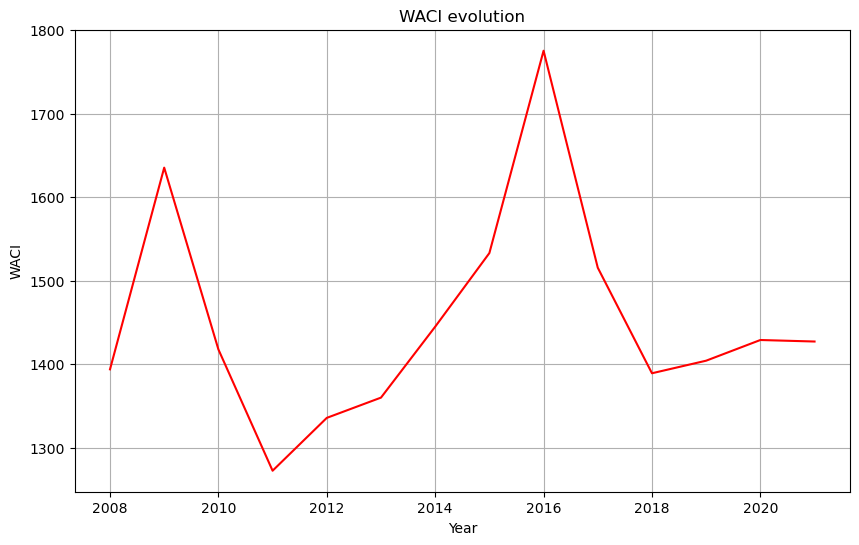

In [235]:
DisplayWACIs = WACIs.reset_index(drop=False).rename(columns = {"index" : "Year"})
plt.figure(figsize=(10, 6))
plt.plot(DisplayWACIs['Year'], DisplayWACIs['WACI'], color='red')
plt.title('WACI evolution')
plt.xlabel('Year')
plt.ylabel('WACI')
plt.grid(True)
plt.show()

#### Net Zero Portfolio

In [236]:
returns_ex_3 = returns.iloc[:,1:].copy()
returns_ex_3.iloc[95,:]


AN8068571086   -0.233506
AT0000746409   -0.067250
AU000000BPT9   -0.060014
AU000000ERA9   -0.017656
AU000000ORG5    0.003576
                  ...   
US91913Y1001   -0.156648
US92939U1060   -0.065285
US9694571004   -0.106484
US98389B1008   -0.080637
ZAE000006896   -0.045586
Name: 95, Length: 190, dtype: float64

#### Functions for expected return and the covariance matrix

In [237]:
def expected_return(df,num_rows):
  lowerBound = max(0,num_rows-96)
  mu = 1/(num_rows)*df.iloc[lowerBound:num_rows,:].sum(axis = 0)
  return mu.to_frame().transpose()

def covariance_matrix(df,num_rows):
  mu = expected_return(df,num_rows)
  lowerBound = max(0,num_rows-96)
  vector = returns_ex_3.iloc[lowerBound,:] - mu
  cov_matrix = np.dot(vector.T,vector)
  for i in range(num_rows-1-lowerBound):
    vector = returns_ex_3.iloc[i+1+lowerBound,:] - mu
    cov_matrix += np.dot(vector.T,vector)
  cov_matrix /= num_rows

  return cov_matrix

covar_matrix = covariance_matrix(returns_ex_3,95)

Define a function to get WACI from weights:

In [238]:
def getWACI(x,year):
  carbon_intensity = list(AllCarbon_2007.iloc[year-2008,:])
  return np.sum(list(a*b for a, b in zip(x, carbon_intensity)))

In [239]:
def targetWACI(year):
    return WACIs.iloc[0,0] * (0.9) ** (year-2008) #Compute the target WACI which is 10% less of the initial one each year

Functions to minimize and to find the weights:

In [240]:
def toMinimize(weights):
  weights = np.array(weights) - capitalization_weights.iloc[year-2008,:]
  #covar_matrix = covariance_matrix(df,num_rows)
  var = np.dot(weights.T, np.dot(covar_matrix * 12, weights))
  #print(f"{covar_matrix.iloc[3,3]}")
  return var

def findWeights(df,num_rows,year):
  #define parameters and constraints
  numAssets = len(df.columns)
  cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
   {'type': 'ineq', 'fun': lambda x: targetWACI(year) - getWACI(x,year)})
  positivity_bounds = tuple((0, 1) for x in range(numAssets))
  initialWeights = np.array(numAssets*[1/numAssets])
  #covar_matrix = covariance_matrix(df,num_rows)
  #print(f"{covar_matrix.iloc[3,3]}")

  #optimize function
  result_max_return_portfolio = sco.minimize(toMinimize, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)

  results = []
  portfolio_weights = []
  current_return = []
  if result_max_return_portfolio.success:  # Check if the optimizer found a solution
        print("minimization successful")
        #results.append((result_max_return_portfolio.fun, current_return,result_max_return_portfolio.x))  # Append (volatility, return)
        #portfolio_weights.append(result_max_return_portfolio.x)
  else:
    print("no success")
  # Convert results to a DataFrame
  #results_df = pd.DataFrame(results, columns=['Volatility', 'Return','Weight portfolio'])
  #weights_df = pd.DataFrame(portfolio_weights)

  return result_max_return_portfolio.x

#### Minimization 🤯 🚡

In [241]:
df_weights = pd.DataFrame(columns=returns_ex_3.columns)
num_rows = 95
year = 2008
while year < 2022:
  print(f"Year {year}:")
  covar_matrix = covariance_matrix(returns_ex_3,num_rows)
  df_weights.loc[year] = findWeights(returns_ex_3,num_rows,year)  # adding a row
  #df_weights.index = df_weights.index + 1  # shifting index
  #df_weights = df_weights.sort_index()
  num_rows += 12
  year += 1

Year 2008:
minimization successful
Year 2009:
minimization successful
Year 2010:
minimization successful
Year 2011:
minimization successful
Year 2012:
minimization successful
Year 2013:
minimization successful
Year 2014:
minimization successful
Year 2015:
minimization successful
Year 2016:
minimization successful
Year 2017:
minimization successful
Year 2018:
minimization successful
Year 2019:
minimization successful
Year 2020:
minimization successful
Year 2021:
minimization successful


In [242]:
df_weights.head()

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
2008      0.024084      0.006898      0.003016      0.001474      0.000020   
2009      0.025269      0.014935      0.002469      0.001441      0.006670   
2010      0.026774      0.014380      0.000437      0.002614      0.003872   
2011      0.027078      0.013073      0.003656      0.001475      0.001961   
2012      0.023349      0.004766      0.004833      0.001722      0.002328   

      AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  \
2008      0.002895      0.001808  0.000000e+00      0.003369      0.000000   
2009      0.000400      0.004626  3.049319e-19      0.004997      0.000080   
2010      0.000927      0.001863  1.863472e-20      0.002641      0.001088   
2011      0.000000      0.003124  7.649766e-21      0.002114      0.002986   
2012      0.000319      0.002145  1.360457e-04      0.000409      0.004232   

      ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
2008  ...  1.355253e-20      0.000433      0.001689  2.710505e-20   
2009  ...  4.123830e-05      0.004283      0.000908  5.298496e-05   
2010  ...  3.330003e-05      0.003606      0.001062  1.145648e-03   
2011  ...  1.903539e-05      0.004047      0.005614  7.084548e-04   
2012  ...  3.388132e-21      0.005308      0.002773  3.049319e-20   

      US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2008      0.000180      0.013667  2.710505e-20      0.006716  2.710505e-20   
2009      0.004074      0.009866  2.032879e-20      0.004390  0.000000e+00   
2010      0.000000      0.011338  2.471024e-04      0.004022  2.815607e-05   
2011      0.003055      0.007461  2.468307e-20      0.003771  4.235165e-22   
2012      0.002128      0.008737  5.929231e-20      0.000209  6.776264e-20   

      ZAE000006896  
2008      0.017916  
2009      0.008440  
2010      0.007454  
2011      0.005134  
2012      0.000172  

[5 rows x 190 columns]

In [243]:
# Création d'un DataFrame pour stocker les target WACI
target_wacis = pd.DataFrame(columns=["Target WACI"])

for year in range(2008, 2022):
    target_waci = targetWACI(year)
    target_wacis.loc[year] = target_waci

In [244]:
betterWACIs = pd.DataFrame(columns = ["NetZero WACI"])
for i in range(len(WACIs)):
  year = 2008 + i
  weights = list(df_weights.iloc[i,:])
  betterWACIs.loc[year] = getWACI(weights,year)
AllWACIs = WACIs.join(betterWACIs).join(target_wacis)
AllWACIs.head()

WACI  NetZero WACI  Target WACI
2008  1393.633088   1275.529787  1393.633088
2009  1635.249403   1254.269779  1254.269779
2010  1417.523164   1127.216773  1128.842801
2011  1272.186426   1015.958521  1015.958521
2012  1335.491895    914.362669   914.362669

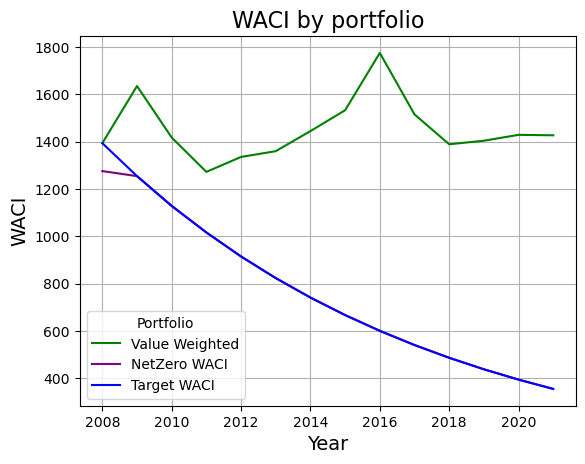

In [245]:
plt.plot(AllWACIs["WACI"], label='Value Weighted', color='green')
plt.plot(AllWACIs["NetZero WACI"], label='NetZero WACI', color='purple')
plt.plot(AllWACIs["Target WACI"], label='Target WACI', color='blue')

#add legend
plt.legend(title='Portfolio')

#add axes labels and a title
plt.ylabel('WACI', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('WACI by portfolio', fontsize=16)

plt.grid()
plt.show()

In [246]:
# Make copies of the DataFrame
combined_ex4 = AllWACIs.copy()

#### Calculate the cumulative return series for both portfolios P(VW) & P(NZ):

Get the monthly returns of the capitalization weighted portfolio:

In [247]:
capiReturns = pd.DataFrame(returns_1.values*capitalization_weights.iloc[:-1,:].values, columns=capitalization_weights.columns, index=returns_1.index)
capiReturns["Monthly Returns"] = capiReturns.sum(axis = 1)
capiReturns.head()

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                          
2008-01-31    -0.006049    -0.000157    -0.000015    -0.000013     0.000005   
2008-02-29     0.003324     0.000341     0.000027     0.000157     0.000111   
2008-03-31     0.000156    -0.000108    -0.000042    -0.000096     0.000021   
2008-04-30     0.003932     0.000276    -0.000003     0.000019     0.001025   
2008-05-31     0.000155     0.000234      0.00009     0.000221     0.000343   

           AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  \
Date                                                                          
2008-01-31    -0.000169    -0.000091     0.000023    -0.000185    -0.000016   
2008-02-29    -0.000012    -0.000081     0.000118     0.000119     0.000306   
2008-03-31    -0.000122     0.000031      0.00001    -0.000124     0.000149   
2008-04-30    -0.000032     0.000014     0.000169     0.000026     0.000257   
2008-05-31     0.000181     0.000073    -0.000088     0.000066     0.000283   

            ... US8454671095 US88642R1095 US9026531049 US9026811052  \
Date        ...                                                       
2008-01-31  ...     0.000014    -0.000023       0.0001    -0.000015   
2008-02-29  ...     0.000383     0.000043    -0.000016    -0.000027   
2008-03-31  ...     0.000087    -0.000013     0.000069    -0.000013   
2008-04-30  ...     0.000717     0.000129     0.000035     0.000028   
2008-05-31  ...     0.000155     0.000037    -0.000016     0.000023   

           US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  \
Date                                                                          
2008-01-31     -0.00133    -0.000082    -0.000498    -0.000168    -0.000314   
2008-02-29    -0.000154    -0.000048     0.000592    -0.000096     0.000697   
2008-03-31    -0.001097      0.00001    -0.000408     0.000037      -0.0006   
2008-04-30    -0.000034     0.000099     0.000359     0.000089     0.001485   
2008-05-31     0.000254     0.000022     0.000332     0.000049     0.000701   

           Monthly Returns  
Date                        
2008-01-31       -0.102852  
2008-02-29        0.042401  
2008-03-31       -0.021998  
2008-04-30        0.089831  
2008-05-31        0.041212  

[5 rows x 191 columns]

Cumulative returns Value Weigted portfolio

In [248]:
capiReturnsList = list(capiReturns.loc[:,"Monthly Returns"])
preparationCapi = [1+a for a in capiReturnsList]

cumulatedCapi = list()
cumulatedCapi.append(preparationCapi[0])
for i in range(len(preparationCapi) - 1):
  cumulatedCapi.append(cumulatedCapi[i]*preparationCapi[i+1])

Get the return from the NetZero portfolio

In [249]:
# Create a dataframe that contains the weights of the optimized
# portfolio, but twelve times the same row:
df_weights12 = pd.DataFrame(columns = df_weights.columns)

for i in range(len(df_weights.iloc[:,1])):
  for j in range(12):
    df_weights12.loc[12*i+j] = df_weights.iloc[i,:]

# Now, calculate the return:
NetZeroReturns = pd.DataFrame(returns_1.values*df_weights12.values, columns=returns_1.columns, index=returns_1.index)
NetZeroReturns["Monthly Returns"] = NetZeroReturns.sum(axis = 1)
NetZeroReturns.head()

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31     -0.005624     -0.000464     -0.000181     -0.000026   
2008-02-29      0.003599      0.000969      0.000299      0.000293   
2008-03-31      0.000153     -0.000279     -0.000445     -0.000156   
2008-04-30      0.003751      0.000724     -0.000034      0.000033   
2008-05-31      0.000139      0.000618      0.001200      0.000417   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31  7.147383e-08     -0.000485     -0.000178           0.0   
2008-02-29  1.318432e-06     -0.000038     -0.000158           0.0   
2008-03-31  2.429153e-07     -0.000398      0.000068           0.0   
2008-04-30  1.149921e-05     -0.000120      0.000030           0.0   
2008-05-31  2.658159e-06      0.000767      0.000162          -0.0   

            BMG5320C1082  BMG6359F1370  ...  US8454671095  US88642R1095  \
Date                                    ...                               
2008-01-31     -0.000911          -0.0  ...      0.000003     -0.000058   
2008-02-29      0.000721           0.0  ...      0.000070      0.000107   
2008-03-31     -0.000643           0.0  ...      0.000014     -0.000031   
2008-04-30      0.000165           0.0  ...      0.000111      0.000310   
2008-05-31      0.000424           0.0  ...      0.000021      0.000081   

            US9026531049  US9026811052  US91913Y1001  US92939U1060  \
Date                                                                 
2008-01-31  4.603887e-21     -0.000004     -0.002141 -1.769541e-21   
2008-02-29 -5.698715e-22     -0.000007     -0.000271 -9.842342e-22   
2008-03-31  2.631621e-21     -0.000004     -0.002049  2.299023e-22   
2008-04-30  1.221061e-21      0.000008     -0.000072  2.138067e-21   
2008-05-31 -5.789731e-22      0.000007      0.000601  4.853240e-22   

            US9694571004  US98389B1008  ZAE000006896  Monthly Returns  
Date                                                                   
2008-01-31     -0.000715 -2.185673e-21     -0.000817        -0.100732  
2008-02-29      0.000851 -1.214819e-21      0.001698         0.047466  
2008-03-31     -0.000549  4.925026e-22     -0.001387        -0.027969  
2008-04-30      0.000513  1.154771e-21      0.003624         0.086057  
2008-05-31      0.000481  6.646064e-22      0.001560         0.037865  

[5 rows x 191 columns]

Cumulative return NetZero portfolio

In [250]:
NetZeroReturnsList = list(NetZeroReturns.loc[:,"Monthly Returns"])
preparationOpti = [1+a for a in NetZeroReturnsList]

cumulatedOpti = list()
cumulatedOpti.append(preparationOpti[0])
for i in range(len(preparationOpti) - 1):
  cumulatedOpti.append(cumulatedOpti[i]*preparationOpti[i+1])

Dataframe with both returns

In [251]:
NetZeroReturns["NetZero"] = cumulatedOpti
capiReturns["Capitalization Weighted"] = cumulatedCapi

cumulatedReturns = capiReturns.iloc[:,-1].to_frame().join(NetZeroReturns.iloc[:,-1])
cumulatedReturns.head(1)

Capitalization Weighted   NetZero
Date                                         
2008-01-31                 0.897148  0.899268

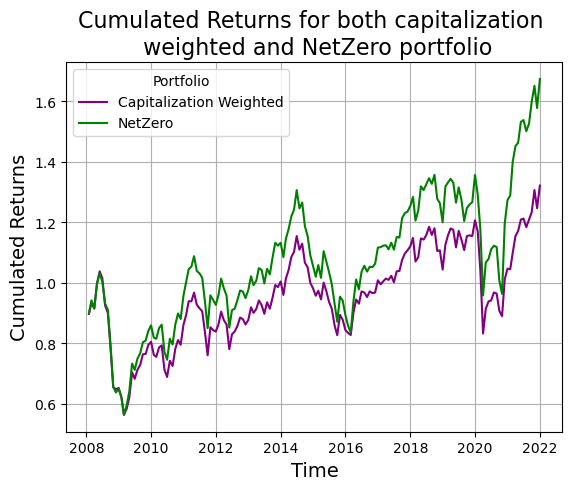

In [252]:
plt.plot(cumulatedReturns["Capitalization Weighted"], label='Capitalization Weighted', color='purple')
plt.plot(cumulatedReturns["NetZero"], label='NetZero', color='green')

#add legend
plt.legend(title='Portfolio')

#add axes labels and a title
plt.ylabel('Cumulated Returns', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Cumulated Returns for both capitalization \n weighted and NetZero portfolio', fontsize=16)

plt.grid()
plt.show()

In [253]:
# Make copies of the DataFrame
combined_ex4_2 = cumulatedReturns.copy()

#### Calculate summary statistics 🏖 🐡


Calculate the annual average return:

In [254]:
annualizedAverage = 12*sum(capiReturnsList)/len(capiReturnsList)
print(f"The annualized average return for the capitalization weighted portfolio is {annualizedAverage*100} %.")
annualizedAverage = 12*sum(NetZeroReturnsList)/len(NetZeroReturnsList)
print(f"The annualized average return for the NetZero portfolio is {annualizedAverage*100} %.")

The annualized average return for the capitalization weighted portfolio is 3.5268720417044257 %.
The annualized average return for the NetZero portfolio is 5.585244482932874 %.


Calculate Min Max return

In [255]:
mini = min(capiReturnsList)
maxi = max(capiReturnsList)
print(f"For the capitalization weighted portfolio, the minimal return is {mini*100} %")
print(f"For the capitalization weighted portfolio, maximal return is {maxi*100} %")

mini = min(NetZeroReturnsList)
maxi = max(NetZeroReturnsList)
print(f"For the optimized portfolio, the minimal return is {mini*100} %")
print(f"For the optimized portfolio, maximal return is {maxi*100} %")

For the capitalization weighted portfolio, the minimal return is -20.105143773532518 %
For the capitalization weighted portfolio, maximal return is 13.662680953105047 %
For the optimized portfolio, the minimal return is -18.59859735403296 %
For the optimized portfolio, maximal return is 24.095205541398983 %


Calculate the Volatility 🐮

In [256]:
volatilityCapi = capiReturns["Monthly Returns"].std()*np.sqrt(12)
print(f"The annualized volatility of the capitalization weighted portfolio is {volatilityCapi}.")

volatility_netzero = NetZeroReturns["Monthly Returns"].std()*np.sqrt(12)
print(f"The annualized volatility of the optimized portfolio is {volatility_netzero}.")

The annualized volatility of the capitalization weighted portfolio is 0.17370863563799918.
The annualized volatility of the optimized portfolio is 0.1954230579678567.


Calculate the Sharpe ratio

Risk free portfolio:

In [257]:
rf_annualized = 0.016417993079584776

Annualized average returns:

In [258]:
capi_annualized = 12*capiReturns["Monthly Returns"].mean()
print(f"The annualized average return of the capitalization weighted portfolio is {100* capi_annualized} %")
net_zero_annualized = 12*NetZeroReturns["Monthly Returns"].mean()
print(f"The annualized average return of the optimized portfolio is {net_zero_annualized*100} %")

The annualized average return of the capitalization weighted portfolio is 3.5268720417044257 %
The annualized average return of the optimized portfolio is 5.585244482932874 %


Sharp ratios:

In [259]:
sharpeCapi = (capi_annualized - rf_annualized) / volatilityCapi
print(f"The Sharpe Ratio of the capitalization weighted portfolio is {sharpeCapi}.")
sharpe_netzero = (net_zero_annualized - rf_annualized) / volatility_netzero
print(f"The Sharpe Ratio of the optimized portfolio is {sharpe_netzero}.")

The Sharpe Ratio of the capitalization weighted portfolio is 0.10851922973330774.
The Sharpe Ratio of the optimized portfolio is 0.20179016826269375.


#### Compare with homework 1

In [260]:
# @title
LWreturns = [-0.09382394859463705,
 0.06945243338577767,
 0.21138204013772377,
 -0.03438205754655691,
 0.12071954503031754,
 -0.159952640616727,
 -0.3197753522696072,
 -0.01197378274728223,
 -0.6031575433446963,
 -1.2334931158729607,
 0.2890875445863054,
 0.37609398682830575,
 -0.18431348891629235,
 -0.608659343825649,
 -0.17678371018498587,
 0.00047168504045881935,
 0.396026504151446,
 0.2582902029914004,
 0.4617614562708027,
 0.11019235679239736,
 0.18175349613635897,
 -0.15511154904472724,
 0.44199253739995004,
 -0.0519821370959338,
 -0.011886115942870935,
 0.26033751469188315,
 0.4342912936623262,
 0.15739014461797765,
 -0.26894853215040293,
 0.32273166530957315,
 0.4232645854785373,
 0.44615696744758127,
 0.1373560688437373,
 0.28636622693250835,
 0.6103811338308082,
 1.0365884818329127,
 -0.02238396247226852,
 0.37246985576747776,
 -0.10011062473078505,
 0.08592062726256355,
 -0.28935597976728933,
 0.8653861492482033,
 0.38305210612910756,
 -0.09025410789853236,
 -0.12621414314083448,
 -0.1843324272378653,
 0.0306894461182992,
 0.37382334601648654,
 -0.00030109561560499783,
 0.20678351331490352,
 0.05393995888536658,
 -0.006702747256004577,
 -0.33084899521008526,
 0.4610311930801867,
 -0.11368234279650369,
 -0.055115363896175676,
 0.29915845859597556,
 -0.1978444579816651,
 0.37866922314388807,
 -0.021127032275024122,
 -0.1557149930300191,
 0.3296937846429025,
 0.7207359891084465,
 0.6158896097481374,
 -0.31213505013298604,
 -0.021650260354793026,
 0.32795477852803234,
 -0.700080473339443,
 0.3633600163942458,
 0.2176113026300478,
 -0.21933332649718965,
 0.07335563854900315,
 -0.35936616680011957,
 0.5454685856080136,
 0.11825140736601636,
 0.07665451549953207,
 0.1195122045691998,
 0.2313249722760996,
 -0.17281048287480272,
 0.35751065287954215,
 -0.4353118071452281,
 0.6507335702666787,
 -0.04960156294890135,
 -0.1714314624977494,
 0.605858357847278,
 -0.26755312682120846,
 -0.3270105984398707,
 0.37163412517416955,
 -0.08233017028787888,
 -0.31344063420082935,
 -0.00943165639570861,
 -0.5537068217375084,
 0.20733246976651107,
 0.41247129513927394,
 -0.6847801623490029,
 0.285787707470098,
 0.11708051977124395,
 -0.4172973201051918,
 0.8419786003517764,
 0.1438182245073546,
 -0.14124444162903893,
 0.7671503806526585,
 0.18690160256960603,
 -0.377182765849323,
 0.23595589708515802,
 -0.19025894662681786,
 -0.4533951359864203,
 -0.02340438260301704,
 0.40823906490523176,
 0.5260492797005345,
 0.12432995761655345,
 0.2304546249924816,
 0.6536522174267664,
 -0.21404078716640595,
 0.7478050279365867,
 -0.023039838798211837,
 -0.06856206558465118,
 0.15212170139975664,
 0.34055799524622304,
 0.8248061503776327,
 -0.0538821304464049,
 -0.3494491009309054,
 0.250672544293032,
 0.5296305278925753,
 -0.045251018941923245,
 -0.029803510673636638,
 0.23244861499127775,
 -0.12697892233110267,
 0.09836948963597412,
 -0.38207943299459113,
 0.061209258961147914,
 -0.283277623148869,
 0.5736981042052374,
 0.33551302854113013,
 0.0621417332000118,
 -0.3383336212702455,
 -0.2218992535260922,
 0.15564350724858114,
 0.14237265617272232,
 -0.36644198862389193,
 0.504987799284256,
 0.06288664854686962,
 -0.14084631500711303,
 0.4613954371529815,
 -0.07784870606051233,
 -0.8260796161009516,
 -0.9369967045407464,
 0.5440192116227539,
 0.10147015996617126,
 -0.2774772750976794,
 0.01559209230038065,
 -0.12087420642940631,
 -0.26399223090903573,
 -0.1716518930572571,
 0.7249057287989129,
 0.2911868276434952,
 -0.17038413918926962,
 0.07623990603232672,
 0.8008222088439363,
 -0.2151820525698418,
 -0.16233042666455955,
 -0.23709497244079464,
 0.2983260663540406,
 0.1967259200596756,
 -0.24658809374764856,
 -0.1579791313006842,
 -0.2863758952887855,
 0.6177777251417371]

⚠⚠⚠ Je sais pas si il faut diviser par 12 LWreturns

*   LWreturns = [a/12 for a in LWreturns]


In [261]:
capiReturns = capiReturns.rename(columns = {"Monthly Returns" : "CW"})
NetZeroReturns = NetZeroReturns.rename(columns = {"Monthly Returns" : "P(NZ)"})

AllReturns = capiReturns.iloc[:,-2].to_frame().join(NetZeroReturns.iloc[:,-2])
#LWreturns = [a/12 for a in LWreturns]
AllReturns["Out of sample"] = LWreturns
AllReturns.head()

CW     P(NZ)  Out of sample
Date                                         
2008-01-31 -0.102852 -0.100732      -0.093824
2008-02-29  0.042401  0.047466       0.069452
2008-03-31 -0.021998 -0.027969       0.211382
2008-04-30  0.089831  0.086057      -0.034382
2008-05-31  0.041212  0.037865       0.120720

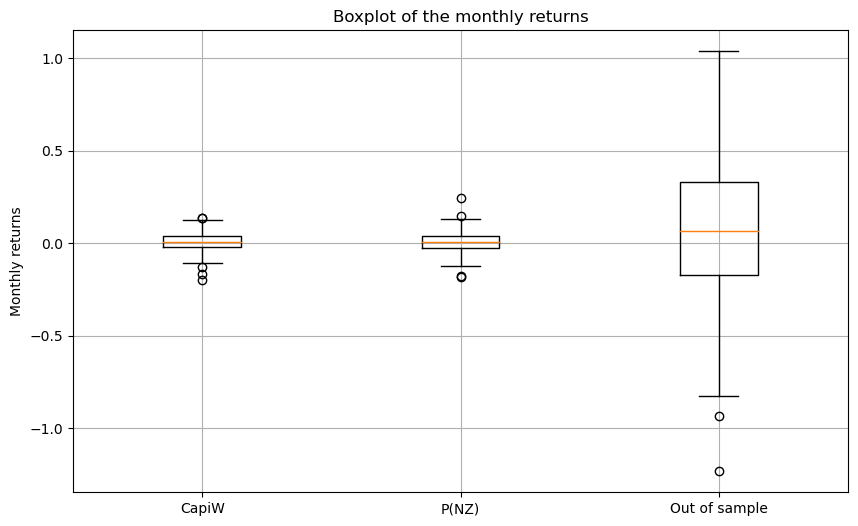

In [262]:
# Préparation des données
data = [AllReturns['CW'].dropna(), AllReturns['P(NZ)'].dropna(), AllReturns['Out of sample'].dropna()]

# Création du boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['CapiW', 'P(NZ)', 'Out of sample'])
plt.title('Boxplot of the monthly returns')
plt.ylabel('Monthly returns')
plt.grid(True)
plt.show()

#### Bonus Portfolio MIN VAR sc. Waci

In [263]:
def toMinimize_Bonus(weights):
  weights = np.array(weights)
  #covar_matrix = covariance_matrix(df,num_rows)
  var = np.dot(weights.T, np.dot(covar_matrix * 12, weights))
  #print(f"{covar_matrix.iloc[3,3]}")
  return var

In [264]:
def findWeights(df,num_rows):
  #define parameters and constraints
  numAssets = len(df.columns)
  cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
   {'type': 'ineq', 'fun': lambda x: targetWACI(year) - getWACI(x,year)})
  positivity_bounds = tuple((0, 1) for x in range(numAssets))
  initialWeights = np.array(numAssets*[1/numAssets])
  #covar_matrix = covariance_matrix(df,num_rows)
  #print(f"{covar_matrix.iloc[3,3]}")

  #optimize function
  result_min_var_portfolio = sco.minimize(toMinimize_Bonus, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)

  results = []
  portfolio_weights = []
  current_return = []
  if result_min_var_portfolio.success:  # Check if the optimizer found a solution
        print("minimization successful")
        #results.append((result_max_return_portfolio.fun, current_return,result_max_return_portfolio.x))  # Append (volatility, return)
        #portfolio_weights.append(result_max_return_portfolio.x)
  else:
    print("no success")
  # Convert results to a DataFrame
  #results_df = pd.DataFrame(results, columns=['Volatility', 'Return','Weight portfolio'])
  #weights_df = pd.DataFrame(portfolio_weights)

  return result_min_var_portfolio.x

In [265]:
df_GMV = pd.DataFrame(columns=returns_ex_3.columns)
num_rows = 95
year = 2008
while year < 2022:
  print(f"Year {year}:")
  covar_matrix = covariance_matrix(returns_ex_3,num_rows)
  df_GMV.loc[year] = findWeights(returns_ex_3,num_rows)  # adding a row
  #df_weights.index = df_weights.index + 1  # shifting index
  #df_weights = df_weights.sort_index()
  num_rows += 12
  year += 1

Year 2008:
minimization successful
Year 2009:
minimization successful
Year 2010:
minimization successful
Year 2011:
minimization successful
Year 2012:
minimization successful
Year 2013:
minimization successful
Year 2014:
minimization successful
Year 2015:
minimization successful
Year 2016:
minimization successful
Year 2017:
minimization successful
Year 2018:
minimization successful
Year 2019:
minimization successful
Year 2020:
minimization successful
Year 2021:
minimization successful


In [266]:
GMVWACIs = pd.DataFrame(columns = ["GMV"])
for i in range(len(WACIs)):
  year = 2008 + i
  weights = list(df_GMV.iloc[i,:])
  GMVWACIs.loc[year] = getWACI(weights,year)
AllWACIs = WACIs.join(betterWACIs).join(target_wacis).join(GMVWACIs)
AllWACIs.head()

WACI  NetZero WACI  Target WACI          GMV
2008  1393.633088   1275.529787  1393.633088  1393.633088
2009  1635.249403   1254.269779  1254.269779  1254.269779
2010  1417.523164   1127.216773  1128.842801  1128.842801
2011  1272.186426   1015.958521  1015.958521  1015.958521
2012  1335.491895    914.362669   914.362669   914.362669

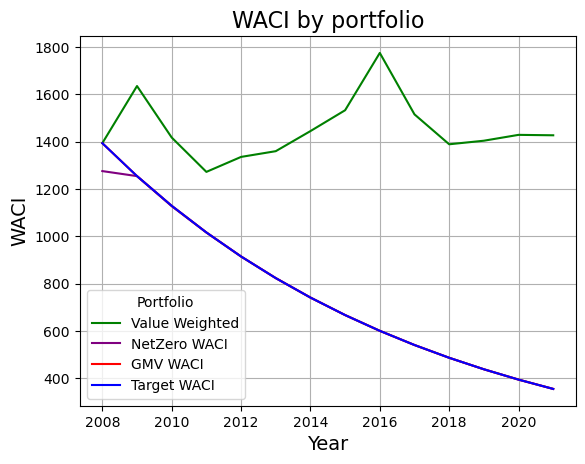

In [267]:
plt.plot(AllWACIs["WACI"], label='Value Weighted', color='green')
plt.plot(AllWACIs["NetZero WACI"], label='NetZero WACI', color='purple')
plt.plot(AllWACIs["GMV"], label='GMV WACI', color='red')
plt.plot(AllWACIs["Target WACI"], label='Target WACI', color='blue')


#add legend
plt.legend(title='Portfolio')

#add axes labels and a title
plt.ylabel('WACI', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('WACI by portfolio', fontsize=16)

plt.grid()
plt.show()

get the cumulative return GMV

In [268]:
# Create a dataframe that contains the weights of the optimized
# portfolio, but twelve times the same row:
df_weights12 = pd.DataFrame(columns = df_GMV.columns)

for i in range(len(df_GMV.iloc[:,1])):
  for j in range(12):
    df_weights12.loc[12*i+j] = df_GMV.iloc[i,:]

# Now, calculate the return:
GMV_Returns = pd.DataFrame(returns_1.values*df_weights12.values, columns=returns_1.columns, index=returns_1.index)
GMV_Returns["Monthly Returns"] = GMV_Returns.sum(axis = 1)
GMV_Returns.head()

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  \
Date                                                                 
2008-01-31 -5.702444e-18          -0.0 -1.429057e-18          -0.0   
2008-02-29  3.648878e-18           0.0  2.358823e-18           0.0   
2008-03-31  1.553381e-19          -0.0 -3.515905e-18          -0.0   
2008-04-30  3.803518e-18           0.0 -2.709248e-19           0.0   
2008-05-31  1.408724e-19           0.0  9.473281e-18           0.0   

            AU000000ORG5  AU0000088338  BMG2108M2182  BMG2178K1009  \
Date                                                                 
2008-01-31  7.630201e-21          -0.0          -0.0           0.0   
2008-02-29  1.407495e-19          -0.0          -0.0           0.0   
2008-03-31  2.593246e-20          -0.0           0.0           0.0   
2008-04-30  1.227600e-18          -0.0           0.0           0.0   
2008-05-31  2.837722e-19           0.0           0.0          -0.0   

            BMG5320C1082  BMG6359F1370  ...  US8454671095  US88642R1095  \
Date                                    ...                               
2008-01-31          -0.0          -0.0  ...           0.0 -4.825444e-20   
2008-02-29           0.0           0.0  ...           0.0  8.786807e-20   
2008-03-31          -0.0           0.0  ...           0.0 -2.580298e-20   
2008-04-30           0.0           0.0  ...           0.0  2.556190e-19   
2008-05-31           0.0           0.0  ...           0.0  6.644569e-20   

            US9026531049  US9026811052  US91913Y1001  US92939U1060  \
Date                                                                 
2008-01-31      0.002977          -0.0 -9.208809e-20          -0.0   
2008-02-29     -0.000368          -0.0 -1.166895e-20          -0.0   
2008-03-31      0.001702          -0.0 -8.812447e-20           0.0   
2008-04-30      0.000790           0.0 -3.112021e-21           0.0   
2008-05-31     -0.000374           0.0  2.583642e-20           0.0   

            US9694571004  US98389B1008  ZAE000006896  Monthly Returns  
Date                                                                   
2008-01-31          -0.0 -2.030469e-19 -7.213085e-21        -0.023750  
2008-02-29           0.0 -1.128555e-19  1.499466e-20         0.010361  
2008-03-31          -0.0  4.575301e-20 -1.225005e-20        -0.000901  
2008-04-30           0.0  1.072771e-19  3.200327e-20         0.016003  
2008-05-31           0.0  6.174129e-20  1.378020e-20        -0.005984  

[5 rows x 191 columns]

In [269]:
GMVReturnsList = list(GMV_Returns.loc[:,"Monthly Returns"])
preparationOpti = [1+a for a in GMVReturnsList]

cumulatedGMV = list()
cumulatedGMV .append(preparationOpti[0])
for i in range(len(preparationOpti) - 1):
  cumulatedGMV .append(cumulatedGMV [i]*preparationOpti[i+1])

In [270]:
NetZeroReturns["NetZero"] = cumulatedOpti
capiReturns["Capitalization Weighted"] = cumulatedCapi
GMV_Returns["GMV"] = cumulatedGMV


cumulatedReturns = capiReturns.iloc[:,-1].to_frame().join(NetZeroReturns.iloc[:,-1]).join(GMV_Returns.iloc[:,-1])
cumulatedReturns.head(1)

Capitalization Weighted   NetZero      GMV
Date                                                  
2008-01-31                 0.897148  0.899268  0.97625

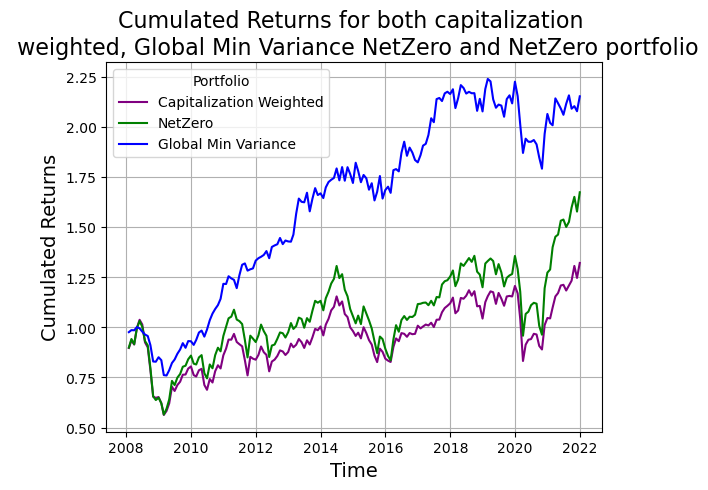

In [271]:
plt.plot(cumulatedReturns["Capitalization Weighted"], label='Capitalization Weighted', color='purple')
plt.plot(cumulatedReturns["NetZero"], label='NetZero', color='green')
plt.plot(cumulatedReturns["GMV"], label='Global Min Variance', color='blue')


#add legend
plt.legend(title='Portfolio')

#add axes labels and a title
plt.ylabel('Cumulated Returns', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Cumulated Returns for both capitalization \n weighted, Global Min Variance NetZero and NetZero portfolio', fontsize=16)

plt.grid()
plt.show()

## Top firms

In [272]:
df_weights

AN8068571086  AT0000746409  AU000000BPT9  AU000000ERA9  AU000000ORG5  \
2008      0.024084  6.898329e-03  3.016283e-03  1.474105e-03  1.998908e-05   
2009      0.025269  1.493509e-02  2.469003e-03  1.440924e-03  6.669665e-03   
2010      0.026774  1.438008e-02  4.365953e-04  2.613670e-03  3.872221e-03   
2011      0.027078  1.307349e-02  3.655944e-03  1.474574e-03  1.960689e-03   
2012      0.023349  4.766001e-03  4.832889e-03  1.721615e-03  2.328352e-03   
2013      0.023314  8.431240e-03  2.608861e-19  6.450534e-04  1.733278e-03   
2014      0.028354  8.427345e-03  8.552095e-04  1.127062e-03  4.367540e-04   
2015      0.019435  1.007584e-02  8.948280e-04  7.085729e-04  6.327336e-19   
2016      0.022357  1.018318e-02  3.538185e-03  0.000000e+00  9.677351e-19   
2017      0.000000  3.772168e-03  1.228399e-02  0.000000e+00  1.118556e-17   
2018      0.000268  0.000000e+00  3.931082e-03  3.239054e-18  0.000000e+00   
2019      0.018633  3.376125e-06  1.031763e-02  0.000000e+00  0.000000e+00   
2020      0.025056  1.166873e-17  1.279900e-02  0.000000e+00  3.418625e-18   
2021      0.036980  9.627715e-17  1.796059e-02  0.000000e+00  0.000000e+00   

      AU0000088338  BMG2108M2182  BMG2178K1009  BMG5320C1082  BMG6359F1370  \
2008  2.895171e-03  1.807566e-03  0.000000e+00  3.369046e-03      0.000000   
2009  3.999204e-04  4.625627e-03  3.049319e-19  4.996608e-03      0.000080   
2010  9.269822e-04  1.863344e-03  1.863472e-20  2.640660e-03      0.001088   
2011  0.000000e+00  3.124337e-03  7.649766e-21  2.113841e-03      0.002986   
2012  3.194330e-04  2.144578e-03  1.360457e-04  4.094266e-04      0.004232   
2013  1.930497e-03  2.744653e-05  1.984958e-04  4.103349e-04      0.003783   
2014  2.013441e-03  8.809143e-20  1.694066e-20  7.660492e-04      0.003962   
2015  1.454536e-03  1.370026e-02  1.168905e-18  4.419161e-04      0.009344   
2016  7.970450e-04  2.329680e-02  0.000000e+00  7.199435e-03      0.015336   
2017  0.000000e+00  8.887583e-03  7.034741e-18  3.523062e-19      0.009540   
2018  4.983661e-03  1.131379e-02  2.046432e-18  8.677598e-03      0.001883   
2019  5.298666e-03  6.393767e-03  7.959569e-18  6.861498e-03      0.000967   
2020  1.500942e-18  1.894743e-02  1.020166e-17  7.336086e-03      0.000000   
2021  2.072432e-03  8.901403e-03  0.000000e+00  5.233471e-03      0.000000   

      ...  US8425871071  US8454671095  US88642R1095  US9026531049  \
2008  ...  1.355253e-20  4.326730e-04  1.689107e-03  2.710505e-20   
2009  ...  4.123830e-05  4.282975e-03  9.084073e-04  5.298496e-05   
2010  ...  3.330003e-05  3.605658e-03  1.061881e-03  1.145648e-03   
2011  ...  1.903539e-05  4.046770e-03  5.613828e-03  7.084548e-04   
2012  ...  3.388132e-21  5.308013e-03  2.772616e-03  3.049319e-20   
2013  ...  3.726945e-20  6.689701e-03  4.649685e-04  4.065758e-20   
2014  ...  0.000000e+00  5.768193e-03  6.555832e-03  8.470329e-20   
2015  ...  4.188578e-19  0.000000e+00  0.000000e+00  1.575673e-04   
2016  ...  0.000000e+00  3.138681e-18  2.049820e-18  1.603866e-03   
2017  ...  6.393527e-18  9.598059e-18  1.529822e-17  5.912035e-03   
2018  ...  6.159624e-18  4.409885e-04  5.177065e-18  2.109855e-02   
2019  ...  0.000000e+00  2.329341e-20  0.000000e+00  1.977505e-02   
2020  ...  3.696452e-18  1.904130e-18  7.724940e-19  3.897295e-02   
2021  ...  0.000000e+00  7.721552e-18  0.000000e+00  6.885377e-02   

      US9026811052  US91913Y1001  US92939U1060  US9694571004  US98389B1008  \
2008      0.000180  1.366737e-02  2.710505e-20  6.715737e-03  2.710505e-20   
2009      0.004074  9.866470e-03  2.032879e-20  4.389762e-03  0.000000e+00   
2010      0.000000  1.133764e-02  2.471024e-04  4.021801e-03  2.815607e-05   
2011      0.003055  7.461452e-03  2.468307e-20  3.770992e-03  4.235165e-22   
2012      0.002128  8.736873e-03  5.929231e-20  2.089525e-04  6.776264e-20   
2013      0.001483  9.464062e-03  3.726945e-20  0.000000e+00  2.371692e-20   
2014      0.004477  7.405470e-03  0.000000e+00  0.000000e+00  0.000000e+00   
2015

In [273]:
AllCarbon_2007.index = AllCarbon_2007.index.year
AllCarbon_2007

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                    
2008   339.962406   666.401141   371.056683   847.367245    527.90725   
2009   324.068369   569.759265   526.002025    590.05426    630.44767   
2010   326.588885   882.336681   449.344901   612.705654   671.510848   
2011   307.375645   995.211962   358.811237    543.17284  1274.011169   
2012   306.074613  1115.728269   423.119059   675.935798   460.039635   
2013   286.260868   979.703083   229.796341   700.632661  1275.786957   
2014   295.109248    816.32388   164.266394   569.549937  1533.191411   
2015   292.850836   926.677325   183.561005   575.835012  2134.594952   
2016      314.452    694.89874   209.724324   628.615191   2488.43565   
2017   347.169447    592.09723    153.96978   649.992275     2269.788   
2018    328.56542   513.978054    644.52776    673.72467  2237.635273   
2019      314.002      396.308      501.548   621.657589     2330.672   
2020      350.491       342.24      651.198       589.74      2468.97   
2021      369.175      162.956       634.12      505.939     2302.201   

     AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  ...  \
Date                                                                   ...   
2008   468.215942   137.197265  3344.917134   371.056683   472.534896  ...   
2009   621.128537   182.972424  2919.146436   514.624643   521.301971  ...   
2010     536.2236   184.817421  3400.324228   462.752416   494.490999  ...   
2011   440.156965   112.752166  2974.156765    394.53528    443.44653  ...   
2012   476.186106    135.55871  3094.332394   417.526524   420.596406  ...   
2013   471.025803   187.878826  3019.044799   420.333284   425.395217  ...   
2014   463.371861   132.668466  2949.136049   435.498801   427.803314  ...   
2015   435.323737   113.544575  1632.420924   417.207948   477.580841  ...   
2016   599.307179    206.15291  1321.908185   536.463531   507.809373  ...   
2017   635.823668   323.307484     2634.465   569.197849   522.358487  ...   
2018   573.208062      344.859  2429.721573   355.835262   492.201343  ...   
2019   499.702739      438.489  2408.552984   375.457032   461.993757  ...   
2020      518.618        96.23      2196.53      400.353      868.902  ...   
2021      646.185      207.724     1543.151      435.866      866.572  ...   

     US8425871071 US8454671095 US88642R1095 US9026531049 US9026811052  \
Date                                                                    
2008  9479.907588   387.482655  1609.310914   102.533507   734.607104   
2009   9103.64032   518.599053  1603.373352   105.006465   815.956857   
2010  9011.994922   456.522106  1573.961989   103.167622  1161.380801   
2011  7422.717457   379.041387  1533.323504    98.307606   823.889754   
2012  6432.307974  1181.836741  1392.917116    97.104515   476.911404   
2013  6422.339889  1014.155859   1372.02336    95.647948   491.279471   
2014  6518.027152   935.706504  1409.460528   104.744333   525.026522   
2015   6200.56035  1222.405227  1434.515406   101.731469   519.027312   
2016  5429.856571  1818.707978  1395.582655   105.099785   620.708186   
2017   4791.31958   1196.80115  1425.444927   111.170487   712.342108   
2018  4838.490046      499.972  1369.580936   108.676321   553.826764   
2019   4674.93512      468.257  1298.853345      100.482   557.776537   
2020     3928.488      677.794     1940.064       98.589      495.792   
2021     3851.815      356.837     1677.734       68.841      481.481   

     US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  
Date                                                                   
2008   566.750937  5207.738249  1503.092318  5690.578957  4731.819461  
2009   706.165808  5002.879893   2159.53014  6181.233028  4513.192825  
2010   601.006618  5188.523206  2009.540796  5844.008838  4739.470012  
2011   582.685503  5819.599358  1763.326116  5665.190294  

In [274]:
WACI_graph = AllCarbon_2007 * df_weights
WACI_graph

AN8068571086 AT0000746409 AU000000BPT9 AU000000ERA9 AU000000ORG5  \
Date                                                                    
2008     8.187811     4.597054     1.119212     1.249108     0.010552   
2009     8.188769     8.509405     1.298701     0.850223     4.204874   
2010     8.744243    12.688068     0.196182      1.60141     2.600238   
2011     8.323239    13.010894     1.311794     0.800949      2.49794   
2012     7.146415     5.317562     2.044887     1.163701     1.071134   
2013     6.673974     8.260112          0.0     0.451945     2.211293   
2014     8.367543     6.879443     0.140482     0.641918     0.669627   
2015       5.6917      9.33705     0.164256     0.408021          0.0   
2016      7.03036      7.07628     0.742044          0.0          0.0   
2017          0.0      2.23349     1.891363          0.0          0.0   
2018     0.087948          0.0     2.533691          0.0          0.0   
2019     5.850754     0.001338     5.174784          0.0          0.0   
2020     8.781944          0.0      8.33468          0.0          0.0   
2021    13.652101          0.0    11.389169          0.0          0.0   

     AU0000088338 BMG2108M2182 BMG2178K1009 BMG5320C1082 BMG6359F1370  ...  \
Date                                                                   ...   
2008     1.355565     0.247993          0.0     1.250107          0.0  ...   
2009     0.248402     0.846362          0.0     2.571378     0.041915  ...   
2010      0.49707     0.344378          0.0     1.221972     0.537994  ...   
2011          0.0     0.352276          0.0     0.833985     1.324177  ...   
2012      0.15211     0.290716     0.420971     0.170946     1.779899  ...   
2013     0.909314     0.005157     0.599268     0.172477       1.6092  ...   
2014     0.932972          0.0          0.0     0.333614     1.695038  ...   
2015     0.633194      1.55559          0.0     0.184371     4.462419  ...   
2016     0.477675     4.802704          0.0     3.862234     7.787594  ...   
2017          0.0     2.873422          0.0          0.0     4.983163  ...   
2018     2.856675     3.901661          0.0     3.087795     0.926785  ...   
2019     2.647758     2.803597          0.0     2.576198      0.44692  ...   
2020          0.0     1.823312          0.0     2.937024          0.0  ...   
2021     1.339175     1.849035          0.0     2.281092          0.0  ...   

     US8425871071 US8454671095 US88642R1095 US9026531049 US9026811052  \
Date                                                                    
2008          0.0     0.167653     2.718298          0.0     0.132004   
2009     0.375419     2.221147     1.456516     0.005564     3.323852   
2010       0.3001     1.646063     1.671361     0.118194          0.0   
2011     0.141294     1.533893     8.607815     0.069646     2.517014   
2012          0.0     6.273205     3.862025          0.0     1.014836   
2013          0.0     6.784399     0.637948          0.0     0.728767   
2014          0.0     5.397335     9.240186          0.0     2.350779   
2015          0.0          0.0          0.0      0.01603     1.934614   
2016          0.0          0.0          0.0     0.168566          0.0   
2017          0.0          0.0          0.0     0.657244          0.0   
2018          0.0     0.220482          0.0     2.292913     0.340293   
2019          0.0          0.0          0.0     1.987036     2.556931   
2020          0.0          0.0          0.0     3.842304     0.314411   
2021          0.0          0.0          0.0     4.739962     2.034357   

     US91913Y1001 US92939U1060 US9694571004 US98389B1008 ZAE000006896  
Date                                                                   
2008     7.745993          0.0    10.094373          0.0    84.777568  
2009     6.967364          0.0     9.479824          0.0     38.09292  
2010     6.813998     1.282096     8.081973     0.164544    35.326203  
2011      4.34768          0.0     6.649488          0.0  

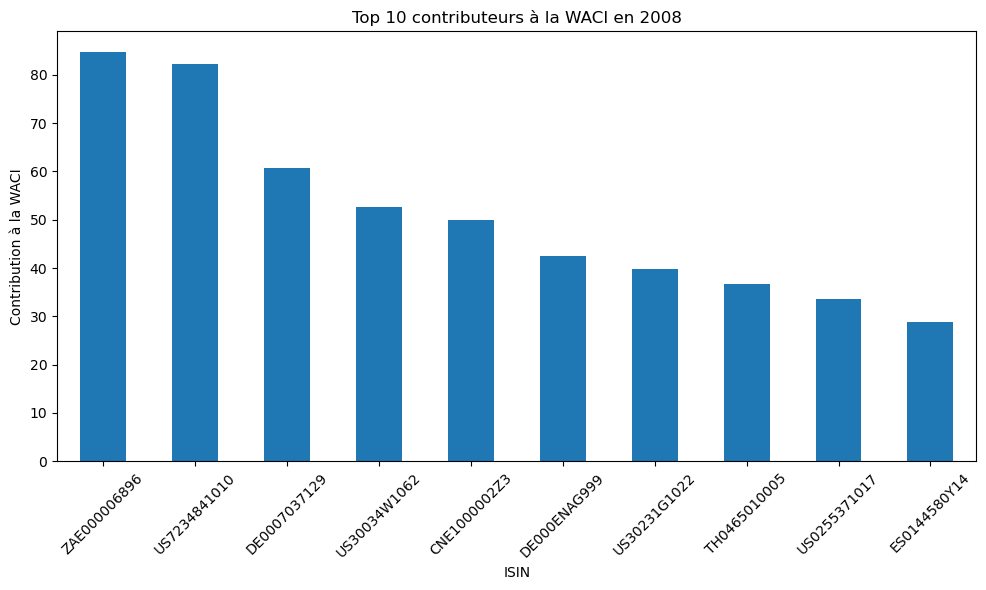

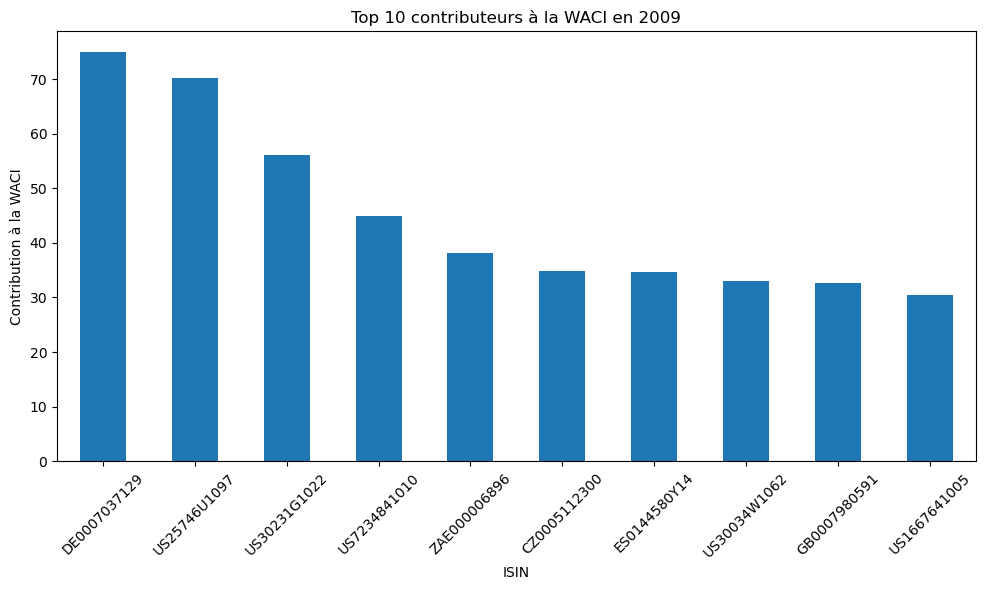

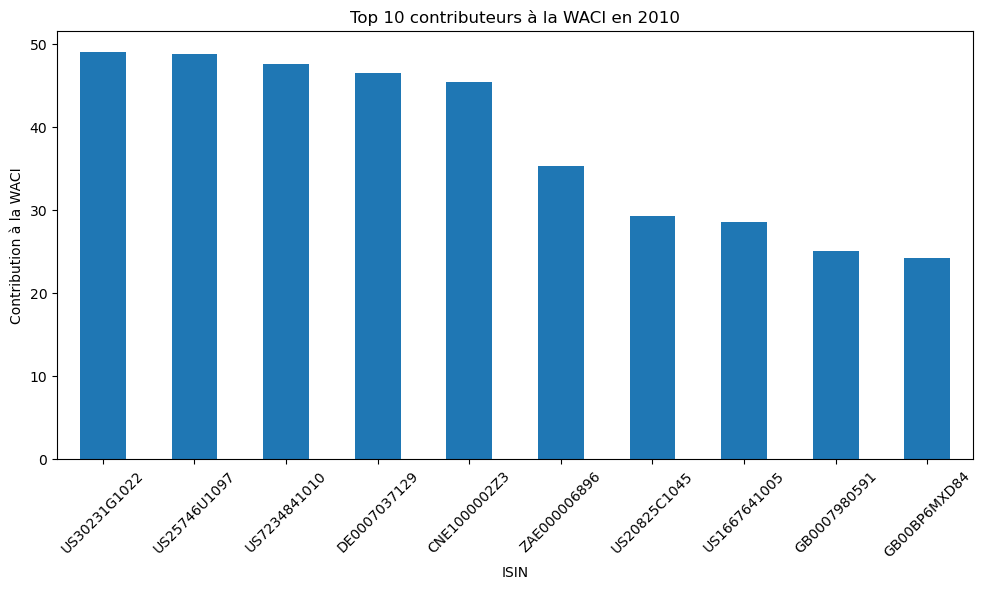

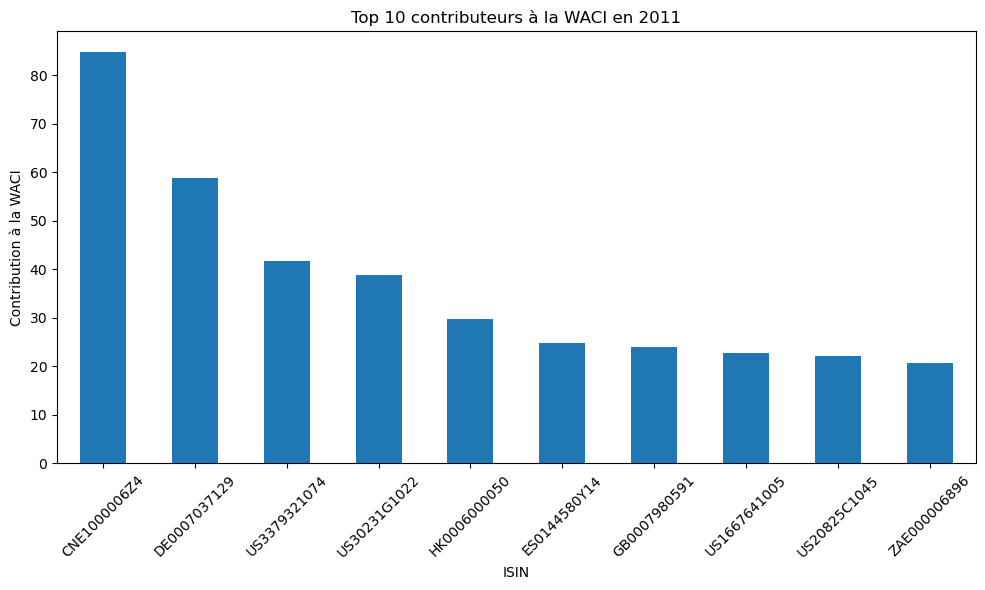

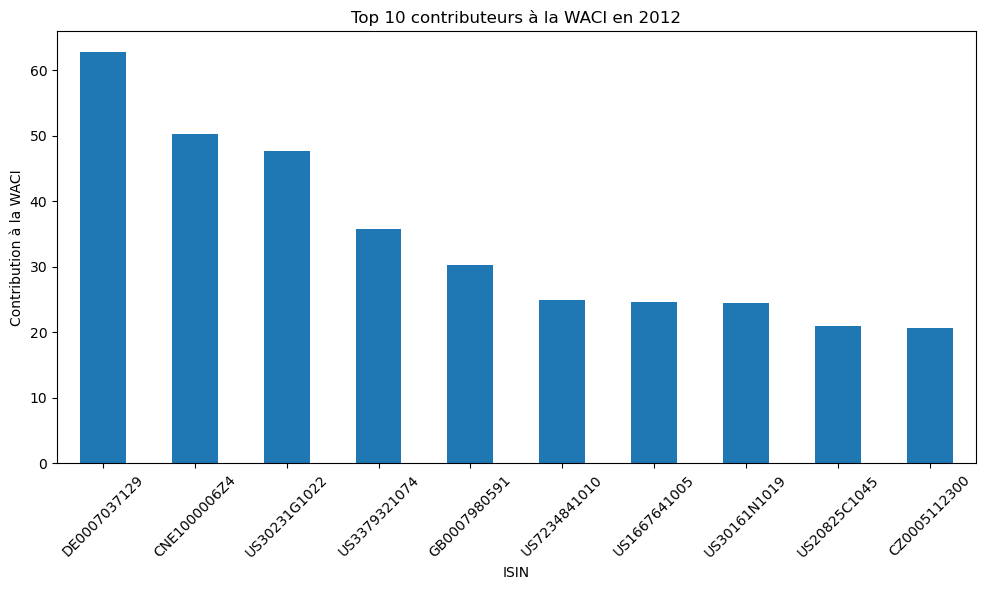

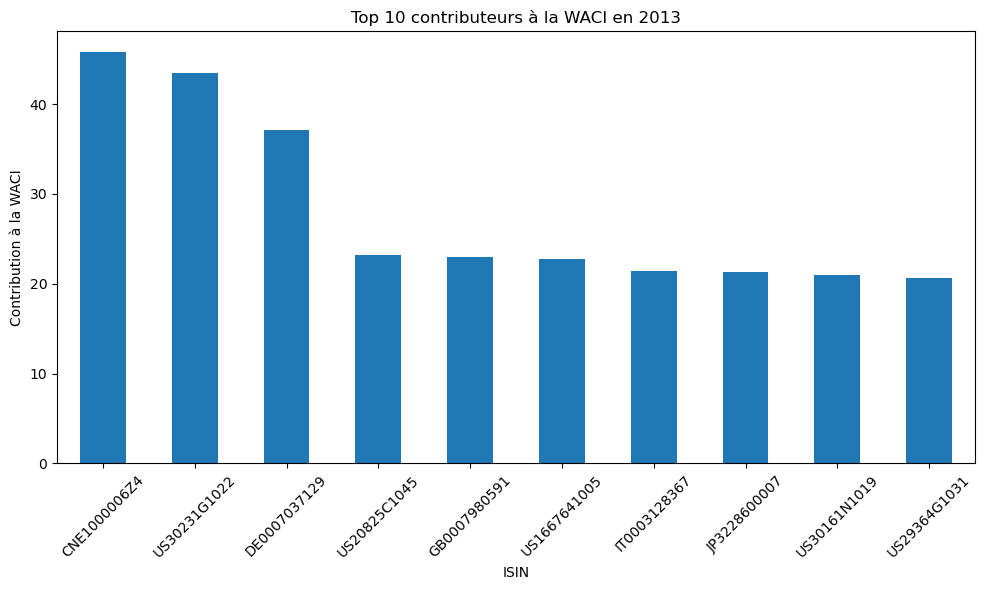

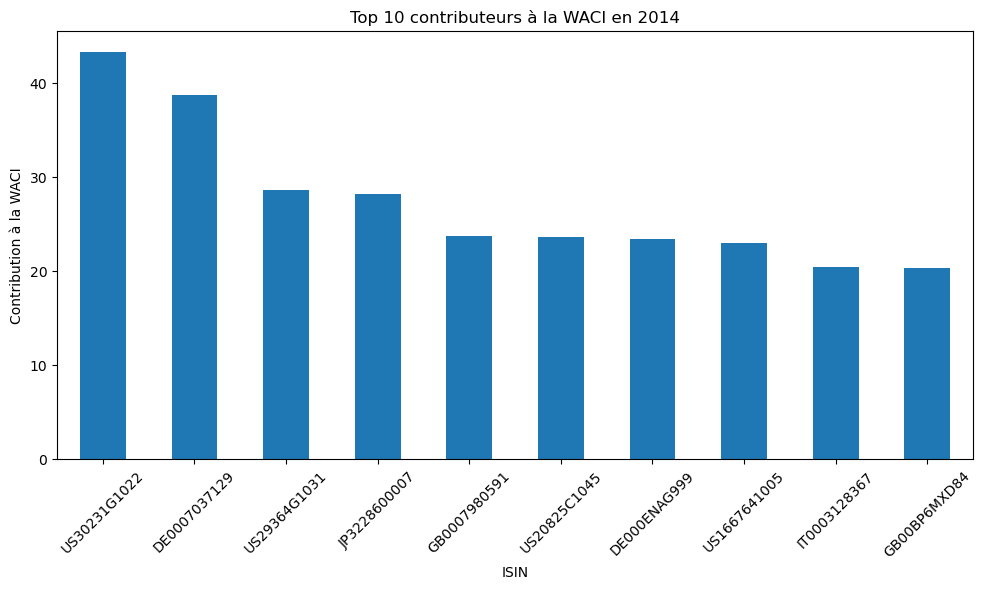

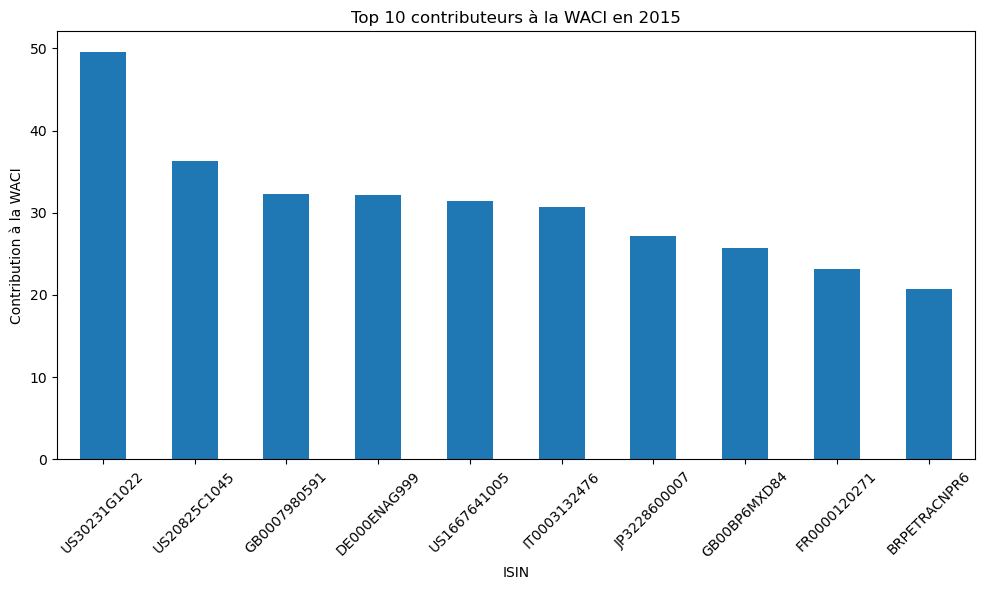

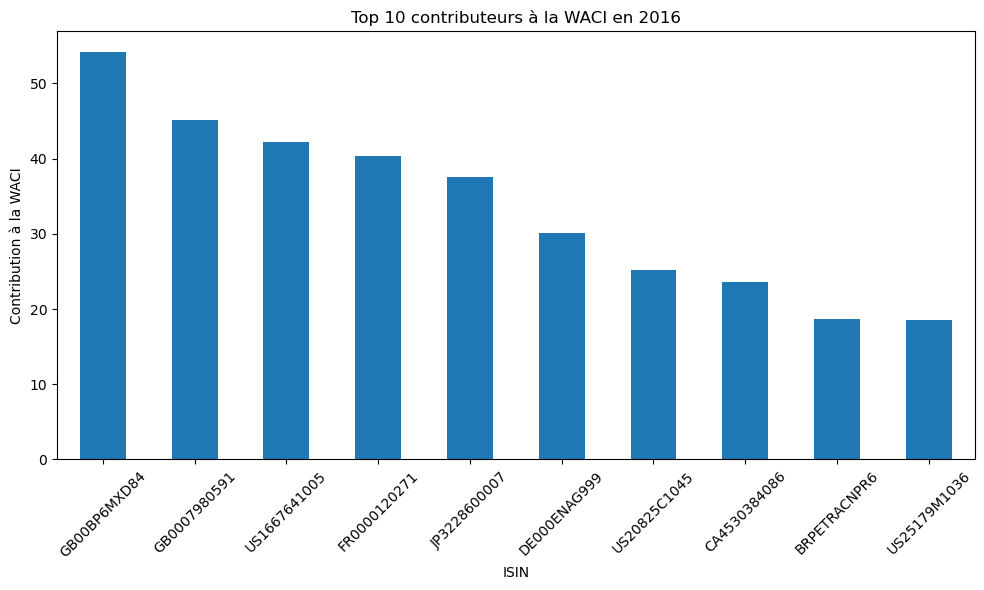

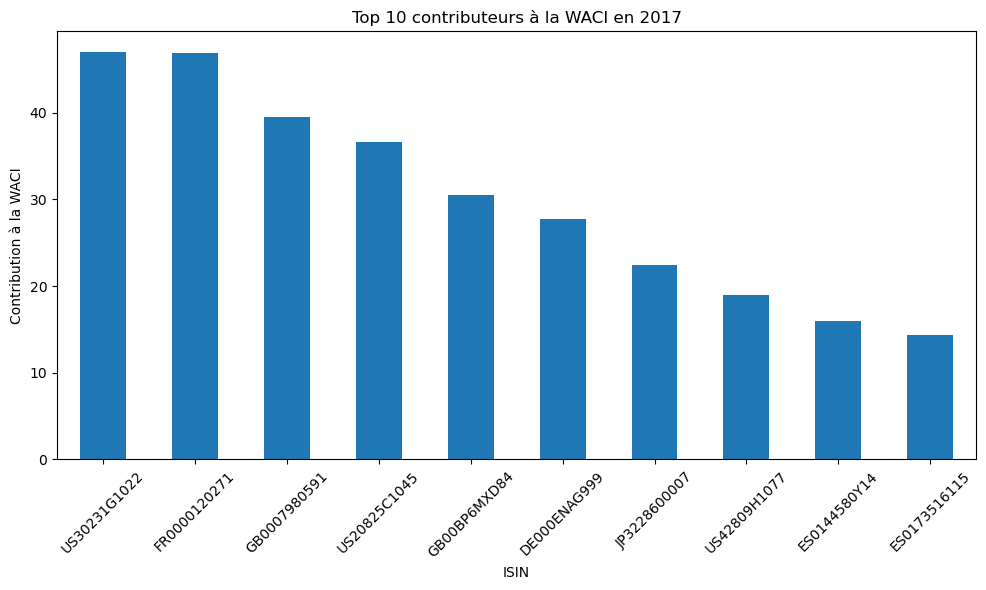

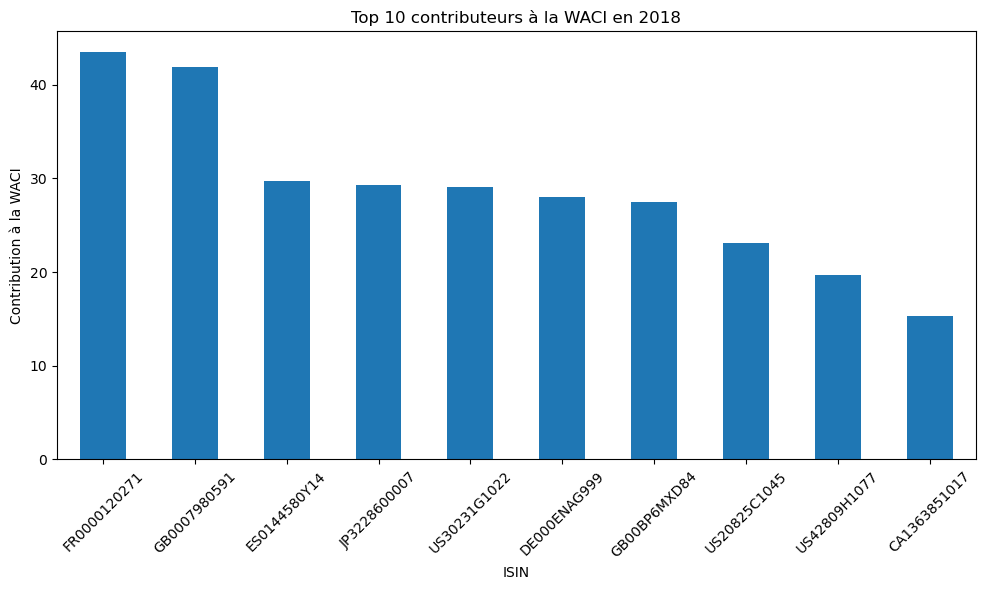

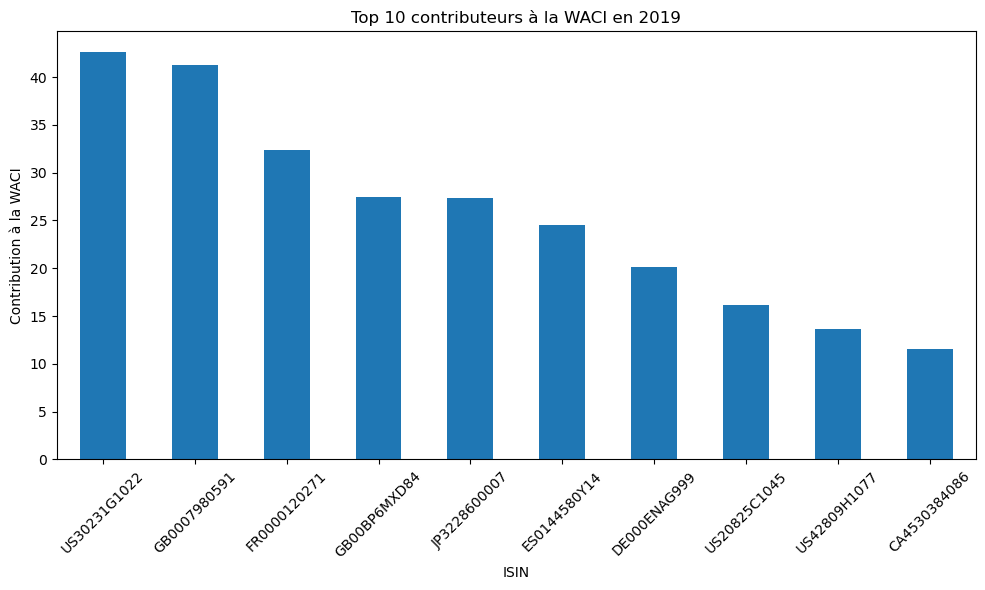

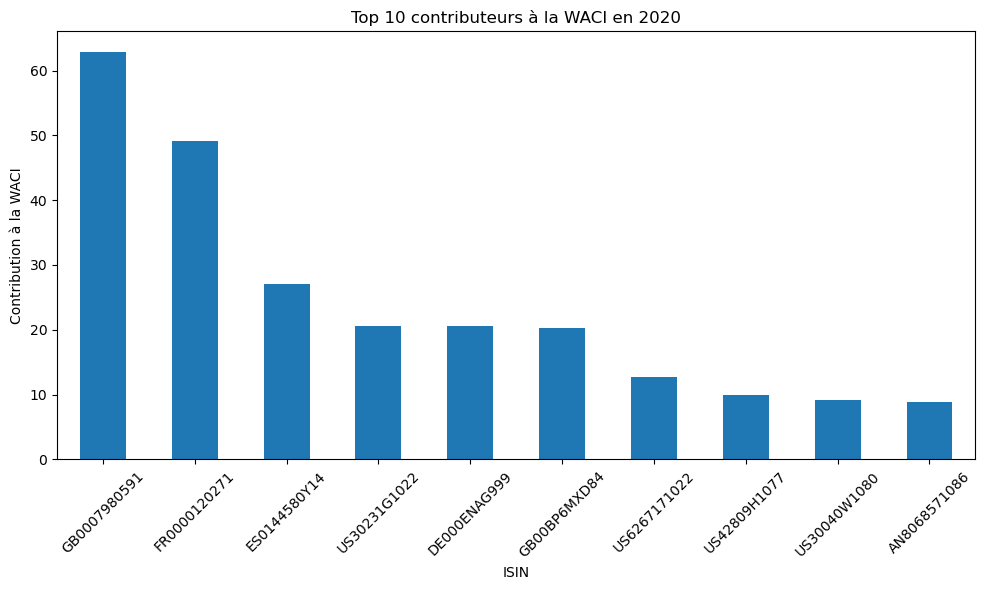

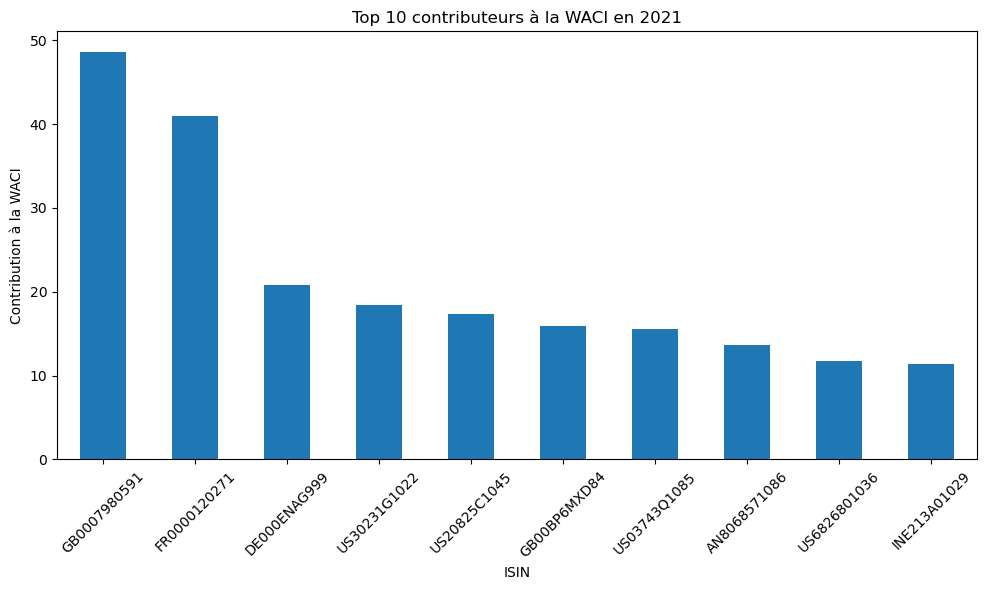

In [275]:


# Pour chaque année, trouvez les 10 plus grands contributeurs à la WACI et générez un graphique
for year in range(2008, 2022):
    # Sélectionner les données pour l'année en cours
    year_data = WACI_graph.loc[year].sort_values(ascending=False).head(10)

    # Générer le graphique
    plt.figure(figsize=(10, 6))
    year_data.plot(kind='bar')
    plt.title(f'Top 10 contributeurs à la WACI en {year}')
    plt.ylabel('Contribution à la WACI')
    plt.xlabel('ISIN')

    # Ajouter les noms des entreprises dans une légende ou en tant que labels sur l'axe x
    # Ici, nous utilisons simplement les ISIN comme labels, remplacez-les par les noms si disponible
    plt.xticks(ticks=range(10), labels=year_data.index, rotation=45)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

In [276]:
WACI_graph = WACI_graph.astype(float)

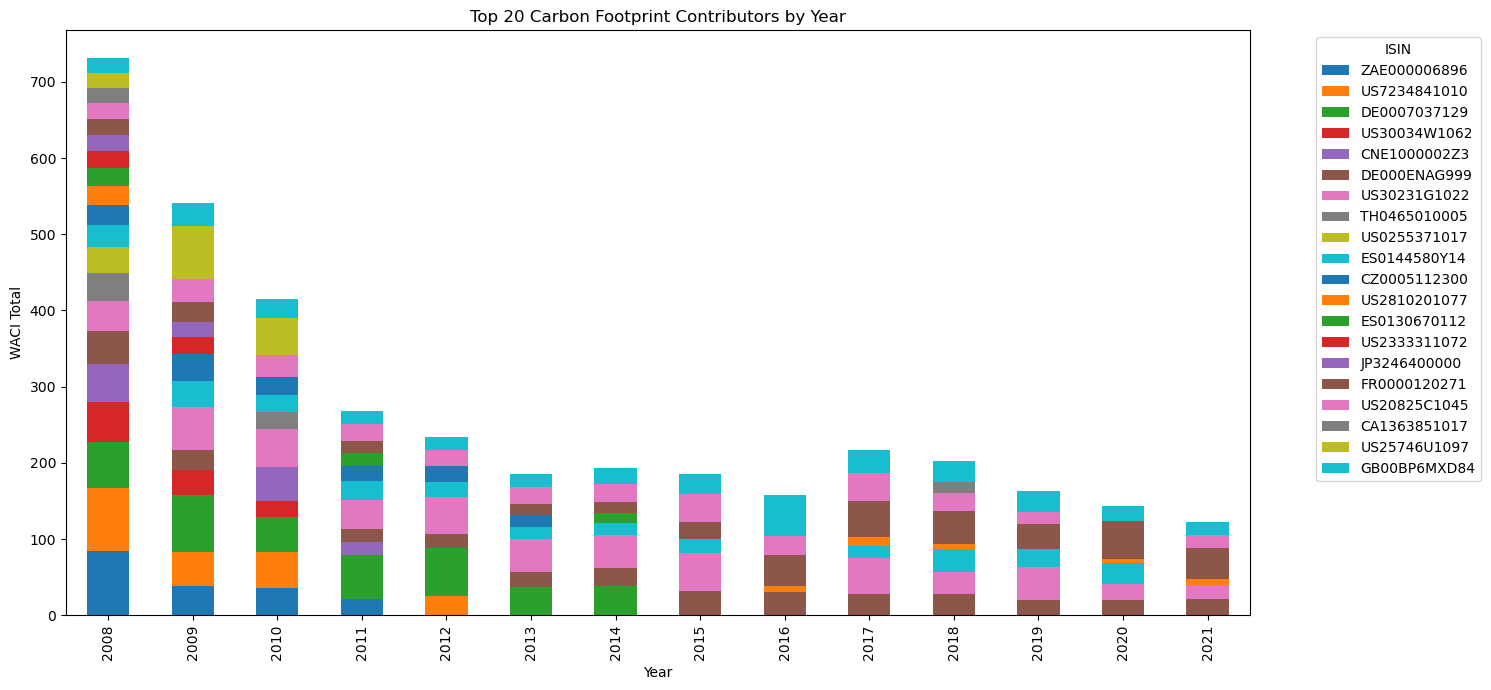

In [277]:
# Initialiser un DataFrame pour stocker les 10 plus grands contributeurs pour chaque année
top_contributors_by_year = pd.DataFrame()

# Calculer les 10 plus grands contributeurs pour chaque année
for year in range(2008, 2022):
    # Obtenez la contribution WACI totale pour cette année, triez-la et prenez les 10 premières
    top_contributors = WACI_graph.loc[year].nlargest(20)
    top_contributors_by_year[year] = top_contributors

# Transpose le DataFrame pour que les années soient sur l'axe des x
top_contributors_by_year = top_contributors_by_year.transpose()

# Créer un graphique empilé
top_contributors_by_year.plot(kind='bar', stacked=True, figsize=(15, 7))

# Titre et labels
plt.title('Top 20 Carbon Footprint Contributors by Year')
plt.xlabel('Year')
plt.ylabel('WACI Total')

# Afficher la légende (vous pourriez vouloir l'adapter ou la déplacer pour une meilleure lisibilité)
plt.legend(title='ISIN', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [278]:
# Créer un dictionnaire pour stocker les DataFrames des 10 plus gros émetteurs pour chaque année
top_emitters_by_year = {}

# Calculer les 10 plus gros émetteurs pour chaque année
for year in WACI_graph.index.unique():
    # Sélectionner les données pour l'année courante
    yearly_data = WACI_graph.loc[[year]] if isinstance(year, int) else WACI_graph.loc[year]

    # S'assurer que yearly_data est un DataFrame
    if isinstance(yearly_data, pd.Series):
        yearly_data = yearly_data.to_frame().T

    # Obtenir les 10 plus grandes valeurs (les plus gros émetteurs)
    top_emitters = yearly_data.apply(lambda x: x.nlargest(10)).sum().nlargest(10)

    # Ajouter le résultat au dictionnaire avec l'année comme clé
    top_emitters_by_year[year] = top_emitters

# Accéder au tableau pour une année spécifique, par exemple pour l'année 2020
top_emitters_2021 = top_emitters_by_year[2021]
print(f"Top 10 émetteurs pour l'année 2021:")
print(top_emitters_2021)



Top 10 émetteurs pour l'année 2021:

GB0007980591    48.627974
FR0000120271    40.976470
DE000ENAG999    20.841964
US30231G1022    18.430403
US20825C1045    17.392915
GB00BP6MXD84    15.878862
US03743Q1085    15.539838
AN8068571086    13.652101
US6826801036    11.684262
INE213A01029    11.436881
dtype: float64


In [279]:
# Accéder au tableau pour l'année 2020
top_emitters_2008 = top_emitters_by_year[2008]

top_emitters_2008


ZAE000006896    84.777568
US7234841010    82.246021
DE0007037129    60.684584
US30034W1062    52.685852
CNE1000002Z3    50.028749
DE000ENAG999    42.455133
US30231G1022    39.899191
TH0465010005    36.766510
US0255371017    33.497802
ES0144580Y14    28.810326
dtype: float64

## Graphs ex3 and 4 combined

### Variables

#### Variables ex3

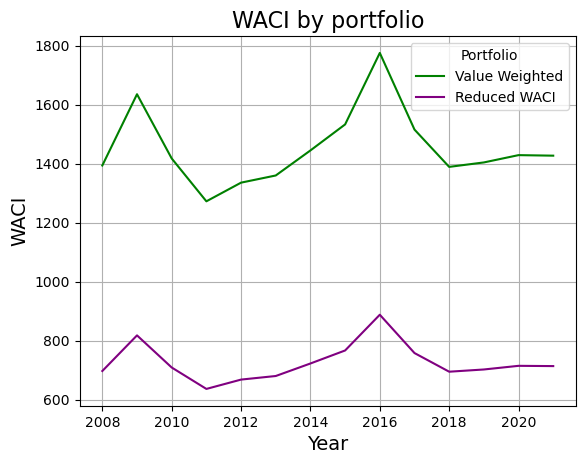

In [280]:
# Modify the code to use the duplicated dataframes
plt.plot(combined_ex3_AllWACIs["WACI"], label='Value Weighted', color='green')
plt.plot(combined_ex3_AllWACIs["optimized WACI"], label='Reduced WACI', color='purple')

# Add legend
plt.legend(title='Portfolio')

# Add axes labels and a title
plt.ylabel('WACI', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('WACI by portfolio', fontsize=16)

plt.grid()

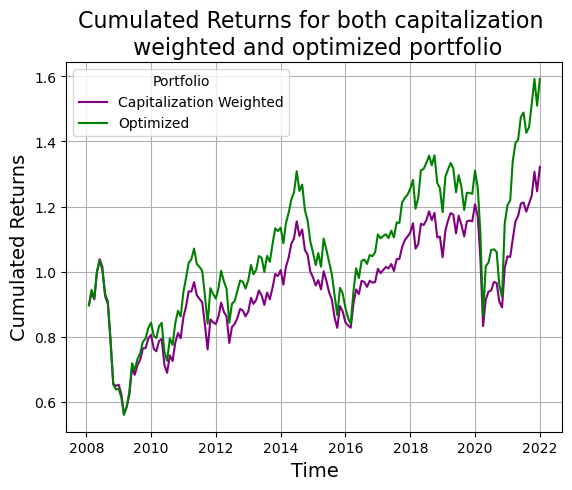

In [281]:
# Plotting
plt.plot(combined_ex3_2["Capitalization Weighted"], label='Capitalization Weighted', color='purple')
plt.plot(combined_ex3_2["Optimized"], label='Optimized', color='green')

# Add legend
plt.legend(title='Portfolio')

# Add axes labels and a title
plt.ylabel('Cumulated Returns', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Cumulated Returns for both capitalization \n weighted and optimized portfolio', fontsize=16)

plt.grid()
plt.show()

#### Variables ex4

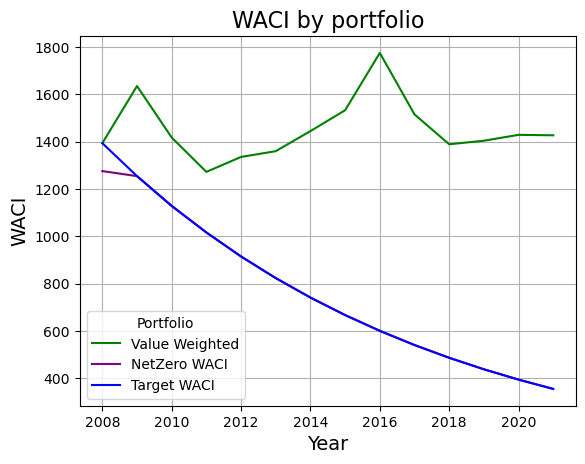

In [282]:
# Plotting
plt.plot(combined_ex4["WACI"], label='Value Weighted', color='green')
plt.plot(combined_ex4["NetZero WACI"], label='NetZero WACI', color='purple')
plt.plot(combined_ex4["Target WACI"], label='Target WACI', color='blue')

# Add legend
plt.legend(title='Portfolio')

# Add axes labels and a title
plt.ylabel('WACI', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('WACI by portfolio', fontsize=16)

plt.grid()
plt.show()

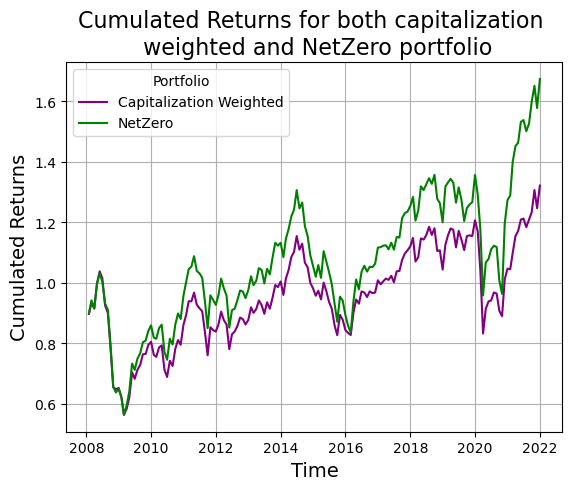

In [283]:
# Plotting
plt.plot(combined_ex4_2["Capitalization Weighted"], label='Capitalization Weighted', color='purple')
plt.plot(combined_ex4_2["NetZero"], label='NetZero', color='green')

# Add legend
plt.legend(title='Portfolio')

# Add axes labels and a title
plt.ylabel('Cumulated Returns', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Cumulated Returns for both capitalization \n weighted and NetZero portfolio', fontsize=16)

plt.grid()
plt.show()

### WACI

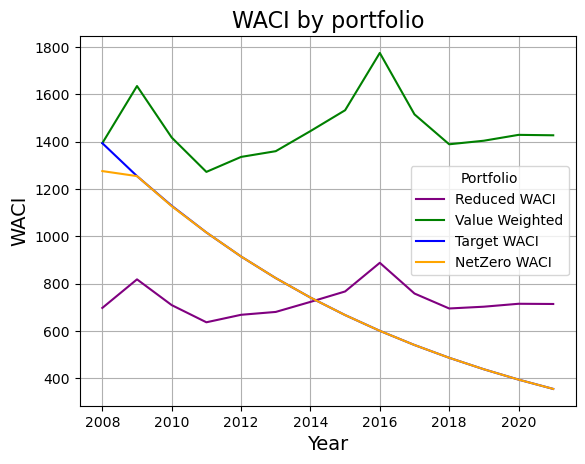

In [284]:
# Plotting
plt.plot(combined_ex3_AllWACIs["optimized WACI"], label='Reduced WACI', color='purple')
plt.plot(combined_ex4["WACI"], label='Value Weighted', color='green')
plt.plot(combined_ex4["Target WACI"], label='Target WACI', color='blue')
plt.plot(combined_ex4["NetZero WACI"], label='NetZero WACI', color='orange') # Adjust color as needed

# Add legend
plt.legend(title='Portfolio')

# Add axes labels and a title
plt.ylabel('WACI', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('WACI by portfolio', fontsize=16)

plt.grid()
plt.show()

### Cumulated Returns

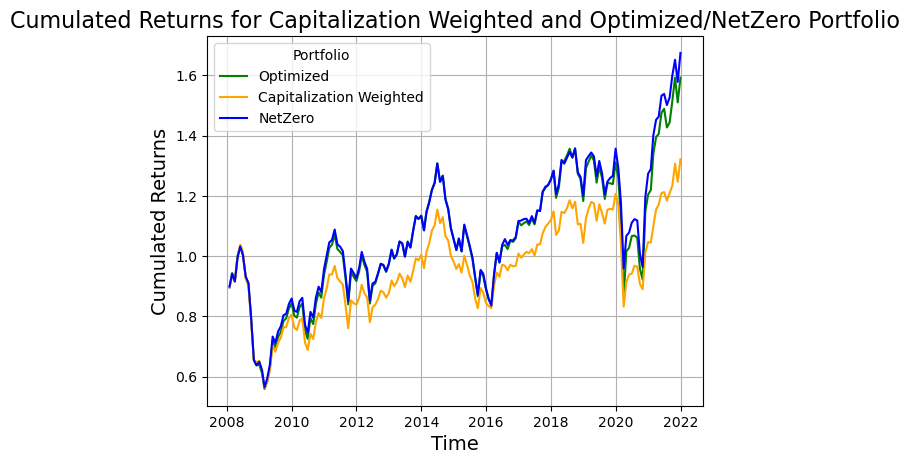

In [285]:
# Plotting
plt.plot(combined_ex3_2["Optimized"], label='Optimized', color='green')
plt.plot(combined_ex4_2["Capitalization Weighted"], label='Capitalization Weighted', color='orange')
plt.plot(combined_ex4_2["NetZero"], label='NetZero', color='blue')

# Add legend
plt.legend(title='Portfolio')

# Add axes labels and a title
plt.ylabel('Cumulated Returns', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Cumulated Returns for Capitalization Weighted and Optimized/NetZero Portfolio', fontsize=16)

plt.grid()
plt.savefig('Conclusion.png')
plt.show()